In [1]:
import pandas as pd
import numpy as np
import math
import pylab
from pylab import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from IPython.display import display
import os

In [2]:
save_folder = './Supplimentary/'

# raw score

In [3]:
excel_path = '~/Downloads/All_metrics_15_Sep.xlsx' 
sheet_name =  'all_metrics_revision'
# pd.options.mode.use_inf_as_na = True

In [4]:
cloumns_to_plot = ["NMI cluster/label","ARI cluster/label","ASW label","ASW label/batch","PCR batch","isolated f1 score","isolated silhouette coefficient","graph connectivity","kBET"]#,"iLISI","cLISI"]
method_color_dct = {'scVI' : '#28DDED', 'Harmony': '#ED7A28','Seurat' : '#994363', 
       'BBKNN': '#B626D3', 'Scanorama': '#EDBF28', 
       'INSCT' : '#286CED', 'LIGER' : '#90EE90','fastMNN':  "#FFB6C1", "iMAP" : "#964B00",
       'scDREAMER': '#086E28', 'scANVI': '#c5b0d5',
'scGEN': '#d62829',
'scDREAMER-Sup': '#113f0a'
       }
methods_to_plot = [ 'scVI' , 'Harmony','Seurat', 'BBKNN', 'Scanorama','INSCT' ,'LIGER' , "iMAP" ,'scDREAMER']#,'scDREAMER-Sup','scANVI','scGEN']

In [5]:
 #directly downloaded from our sheet

In [6]:
import os
def plot_bar(df_, col_name,save_folder = False):#save_name dataset
    
    rc('axes', linewidth = 2)

#     if (dataset == 'Human_Mouse' and col_name == 'kBET'):
#         df_ = df_[df_.index != 'BBKNN']#.reset_index(drop = True)
#     if (dataset =='Human_Mouse' and col_name in ["isolated f1 score","isolated silhouette coefficient"]):
#         return
#     if (col_name == 'PCR batch'): # or col_name == 'ASW label' or col_name == 'ASW label/batch' or  col_name == 'isolated silhouette coefficient'
#         df_ = df_[df_.index != 'BBKNN']#.reset_index(drop = True)
    
    df_ = df_.loc[df_[col_name].notna(),:]

    fig = plt.figure(figsize = (6, 4))
    ax = df_[col_name].plot(kind="bar", color = df_['color'])

   
    rects = ax.patches
    ax.set_xticklabels(df_.index, rotation = 75, fontname='Arial', fontsize = 10)
  
    for rect, label in zip(rects, df_[col_name]):
        height = rect.get_height()
        ax.text(
        rect.get_x() + rect.get_width() / 2, height, round(label, 2), ha="center", va="bottom"
        )
    
    
    mi = df_[col_name].min()
    mx = df_[col_name].max()
    ylim(max(mi - 0.01,0), min(mx*1.05, 1.0))
    
    
    
    plt.ylabel(col_name, fontsize = 15, fontname='Arial', fontweight = 'bold')
    plt.xlabel(None)#, fontsize = 15, fontname='Arial', fontweight = 'bold')
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
        
    plt.subplot(111).spines['right'].set_visible(False)
    plt.subplot(111).spines['top'].set_visible(False)
   
    plt.tight_layout()
#     plt.gcf().subplots_adjust(bottom = 0.3)
    #plt.gcf().subplots_adjust(top = 3)
    #plt.gcf().subplots_adjust(top=5)
    
    if save_folder:
        if not os.path.exists(save_folder):
            print(save_folder)
            os.makedirs(save_folder)
        plt.savefig(save_folder+'/'+col_name.replace('/','_')+'.png', transparent=True, bbox_inches='tight')

    plt.show()

NMI cluster/label  ARI cluster/label  ASW label  ASW label/batch  \
Method                                                                        
scVI                    0.91               0.95       0.59             0.87   
Harmony                 0.92               0.95       0.67             0.87   
Seurat                  0.89               0.92       0.65             0.92   
BBKNN                   0.90               0.95        NaN              NaN   
Scanorama               0.92               0.95       0.59             0.93   
INSCT                   0.77               0.66       0.64             0.64   
LIGER                   0.83               0.86       0.69             0.82   
iMAP                    0.90               0.94       0.57             0.93   
scDREAMER               0.92               0.95       0.68             0.86   

           PCR batch  isolated f1 score  isolated silhouette coefficient  \
Method                                                                     
scVI            0.74               0.10                             0.66   
Harmony         0.72               0.09                             0.54   
Seurat          0.83               0.10                             0.60   
BBKNN            NaN               0.02                              NaN   
Scanorama       0.11               0.11                             0.55   
INSCT           0.73               0.04                             0.45   
LIGER           0.87               0.10                             0.69   
iMAP            0.73               0.10                             0.50   
scDREAMER       0.92               0.09                             0.71   

           graph connectivity  kBET    color  
Method                                        
scVI                     0.90  0.29  #28DDED  
Harmony                  0.85  0.52  #ED7A28  
Seurat                   0.98  0.39  #994363  
BBKNN                    0.85  0.40  #B626D3  
Scanorama                0.84  0.38  #EDBF28  
INSCT                    0.61  0.36  #286CED  
LIGER                    0.78  0.62  #90EE90  
iMAP                     0.90  0.59  #964B00  
scDREAMER                0.91  0.55  #086E28

NMI cluster/label Pancreas


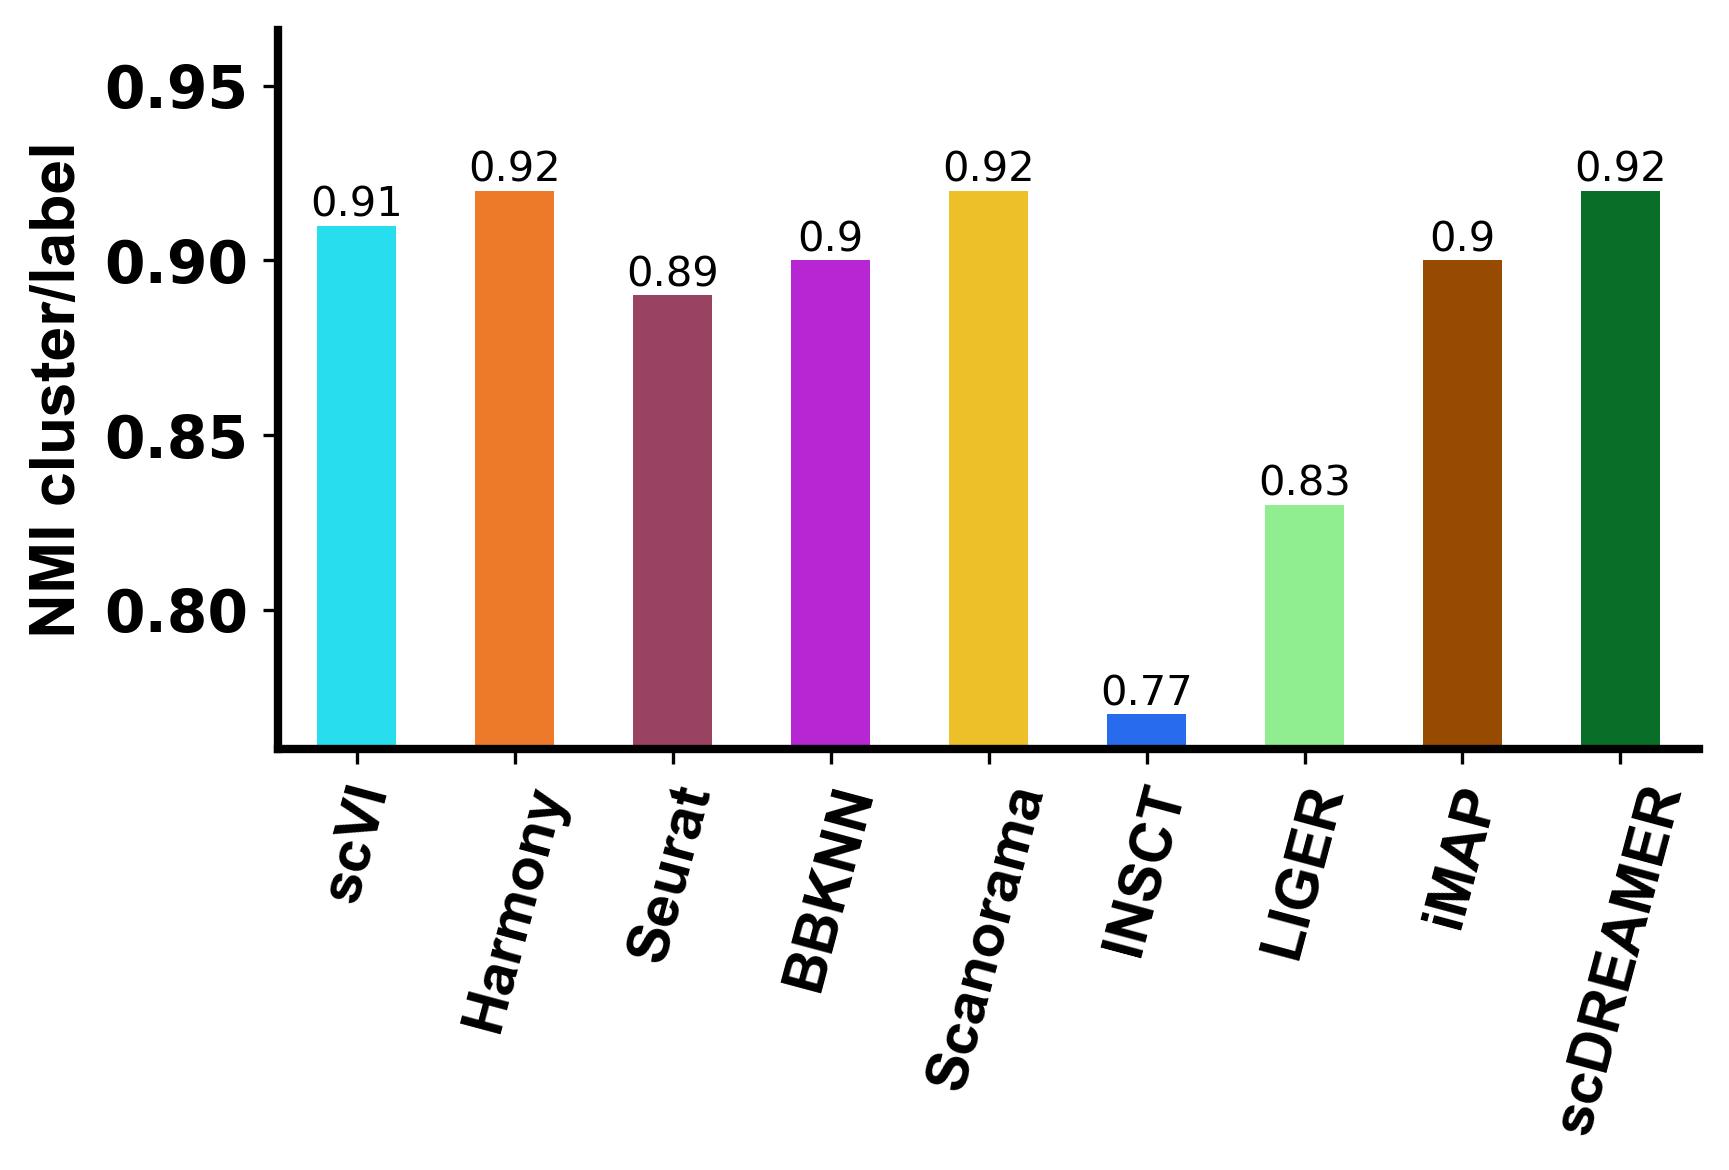

In [7]:
dataset = 'Pancreas'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = False)
    break

# dataset = 'Pancreas'

NMI cluster/label  ARI cluster/label  ASW label  ASW label/batch  \
Method                                                                        
scVI                    0.91               0.95       0.59             0.87   
Harmony                 0.92               0.95       0.67             0.87   
Seurat                  0.89               0.92       0.65             0.92   
BBKNN                   0.90               0.95        NaN              NaN   
Scanorama               0.92               0.95       0.59             0.93   
INSCT                   0.77               0.66       0.64             0.64   
LIGER                   0.83               0.86       0.69             0.82   
iMAP                    0.90               0.94       0.57             0.93   
scDREAMER               0.92               0.95       0.68             0.86   

           PCR batch  isolated f1 score  isolated silhouette coefficient  \
Method                                                                     
scVI            0.74               0.10                             0.66   
Harmony         0.72               0.09                             0.54   
Seurat          0.83               0.10                             0.60   
BBKNN            NaN               0.02                              NaN   
Scanorama       0.11               0.11                             0.55   
INSCT           0.73               0.04                             0.45   
LIGER           0.87               0.10                             0.69   
iMAP            0.73               0.10                             0.50   
scDREAMER       0.92               0.09                             0.71   

           graph connectivity  kBET    color  
Method                                        
scVI                     0.90  0.29  #28DDED  
Harmony                  0.85  0.52  #ED7A28  
Seurat                   0.98  0.39  #994363  
BBKNN                    0.85  0.40  #B626D3  
Scanorama                0.84  0.38  #EDBF28  
INSCT                    0.61  0.36  #286CED  
LIGER                    0.78  0.62  #90EE90  
iMAP                     0.90  0.59  #964B00  
scDREAMER                0.91  0.55  #086E28

NMI cluster/label Pancreas


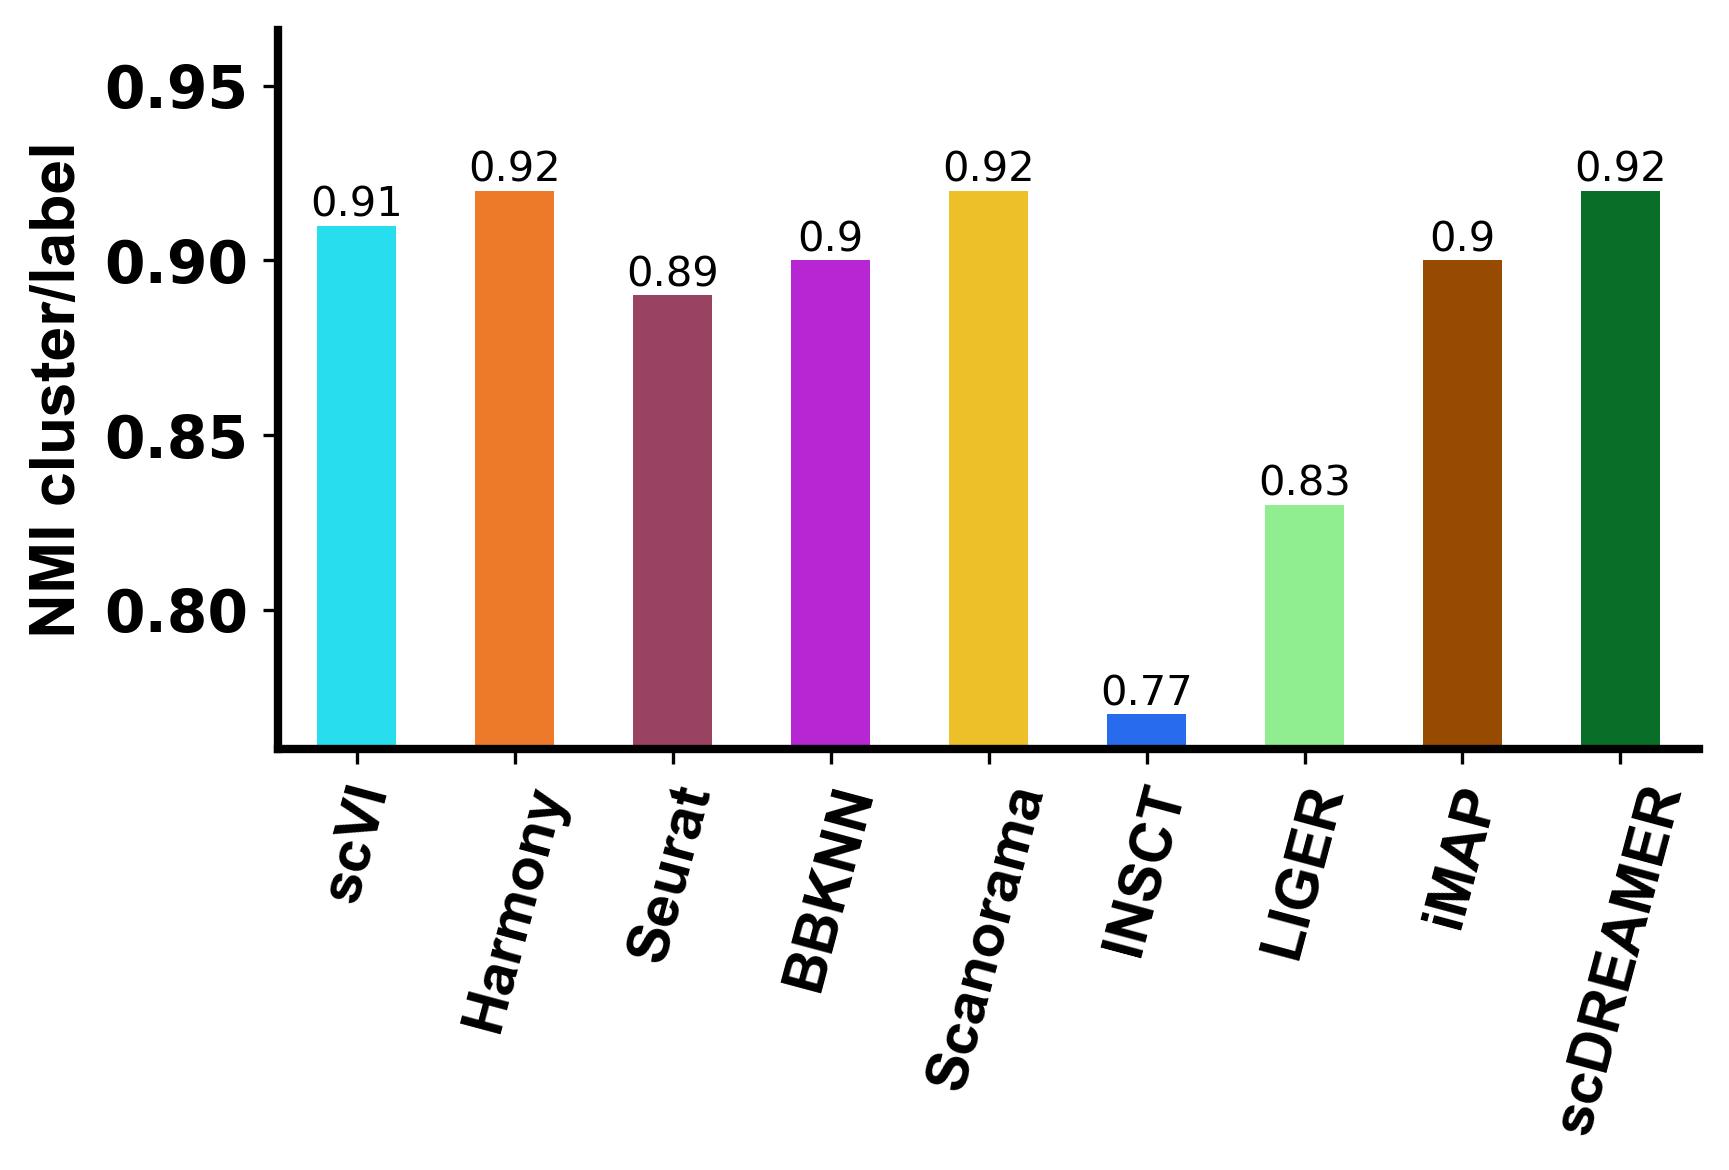

ARI cluster/label Pancreas


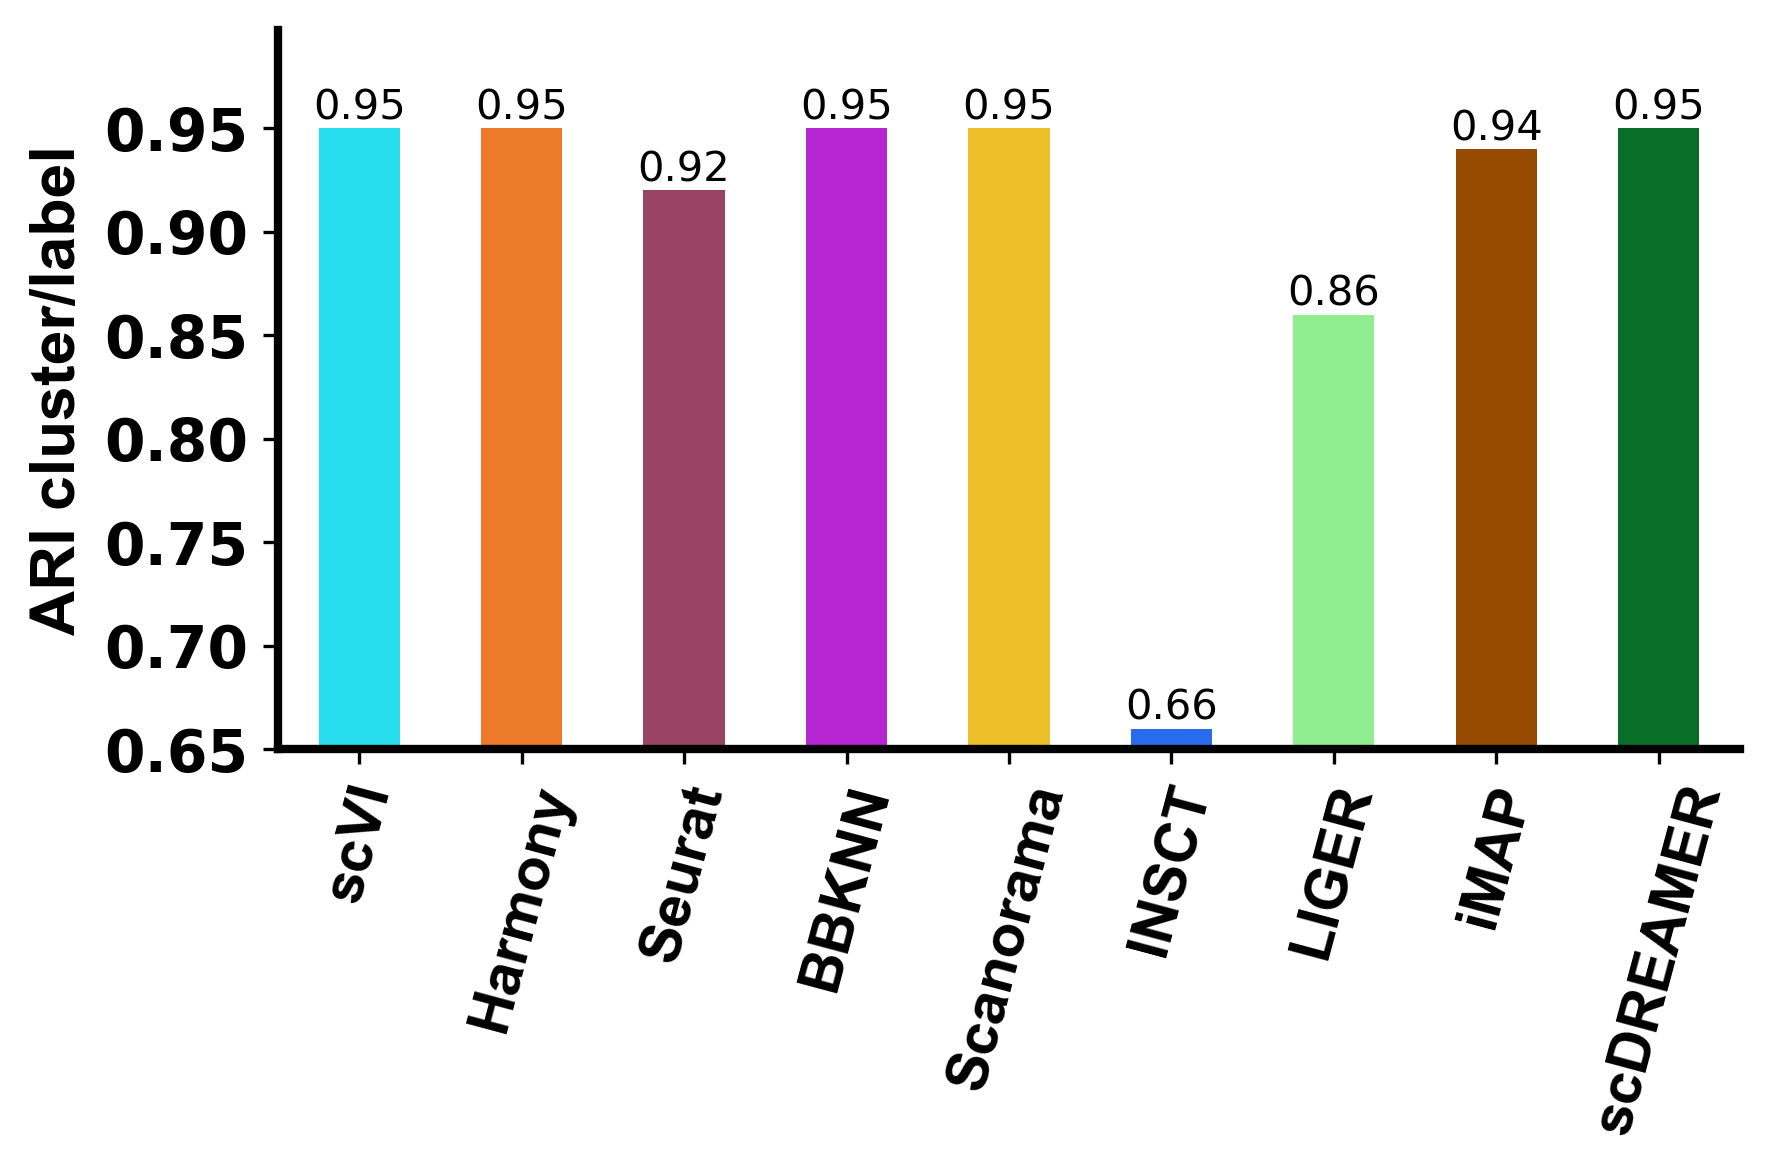

ASW label Pancreas


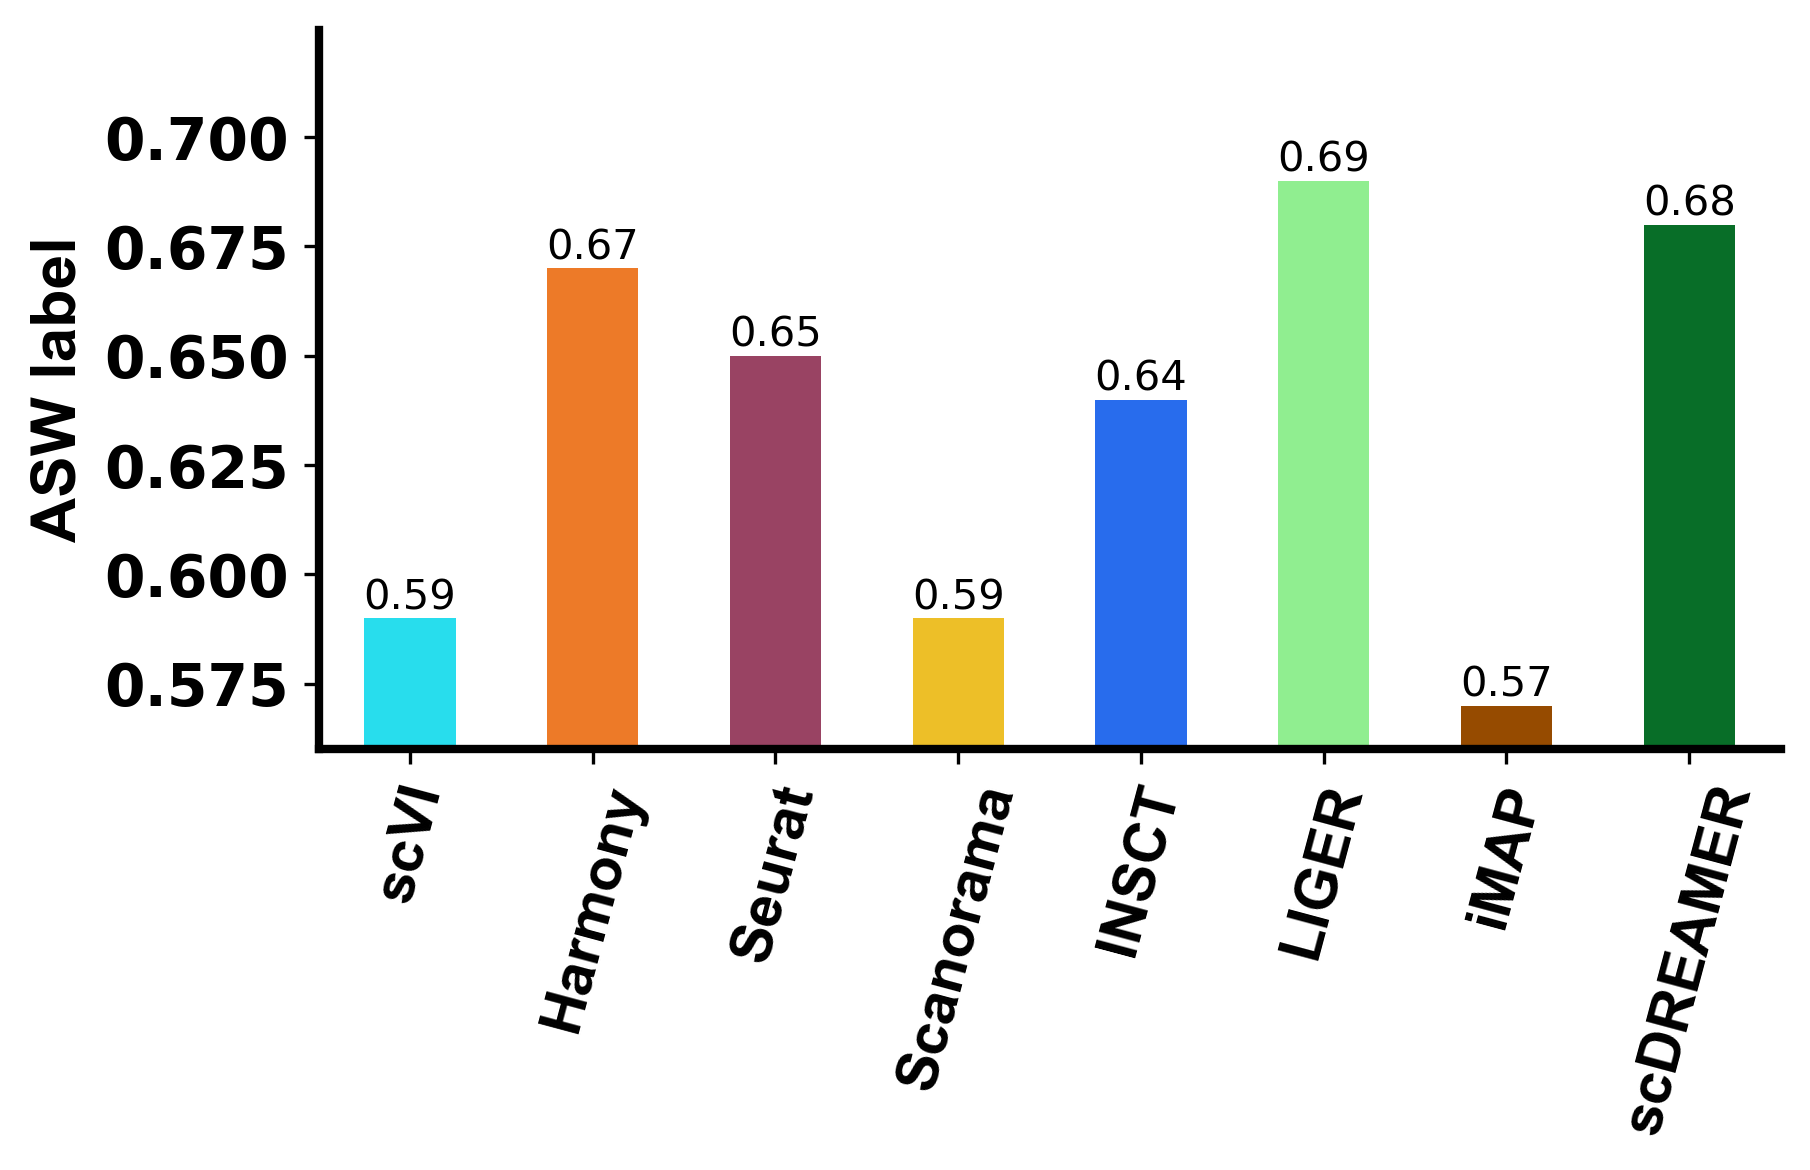

ASW label/batch Pancreas


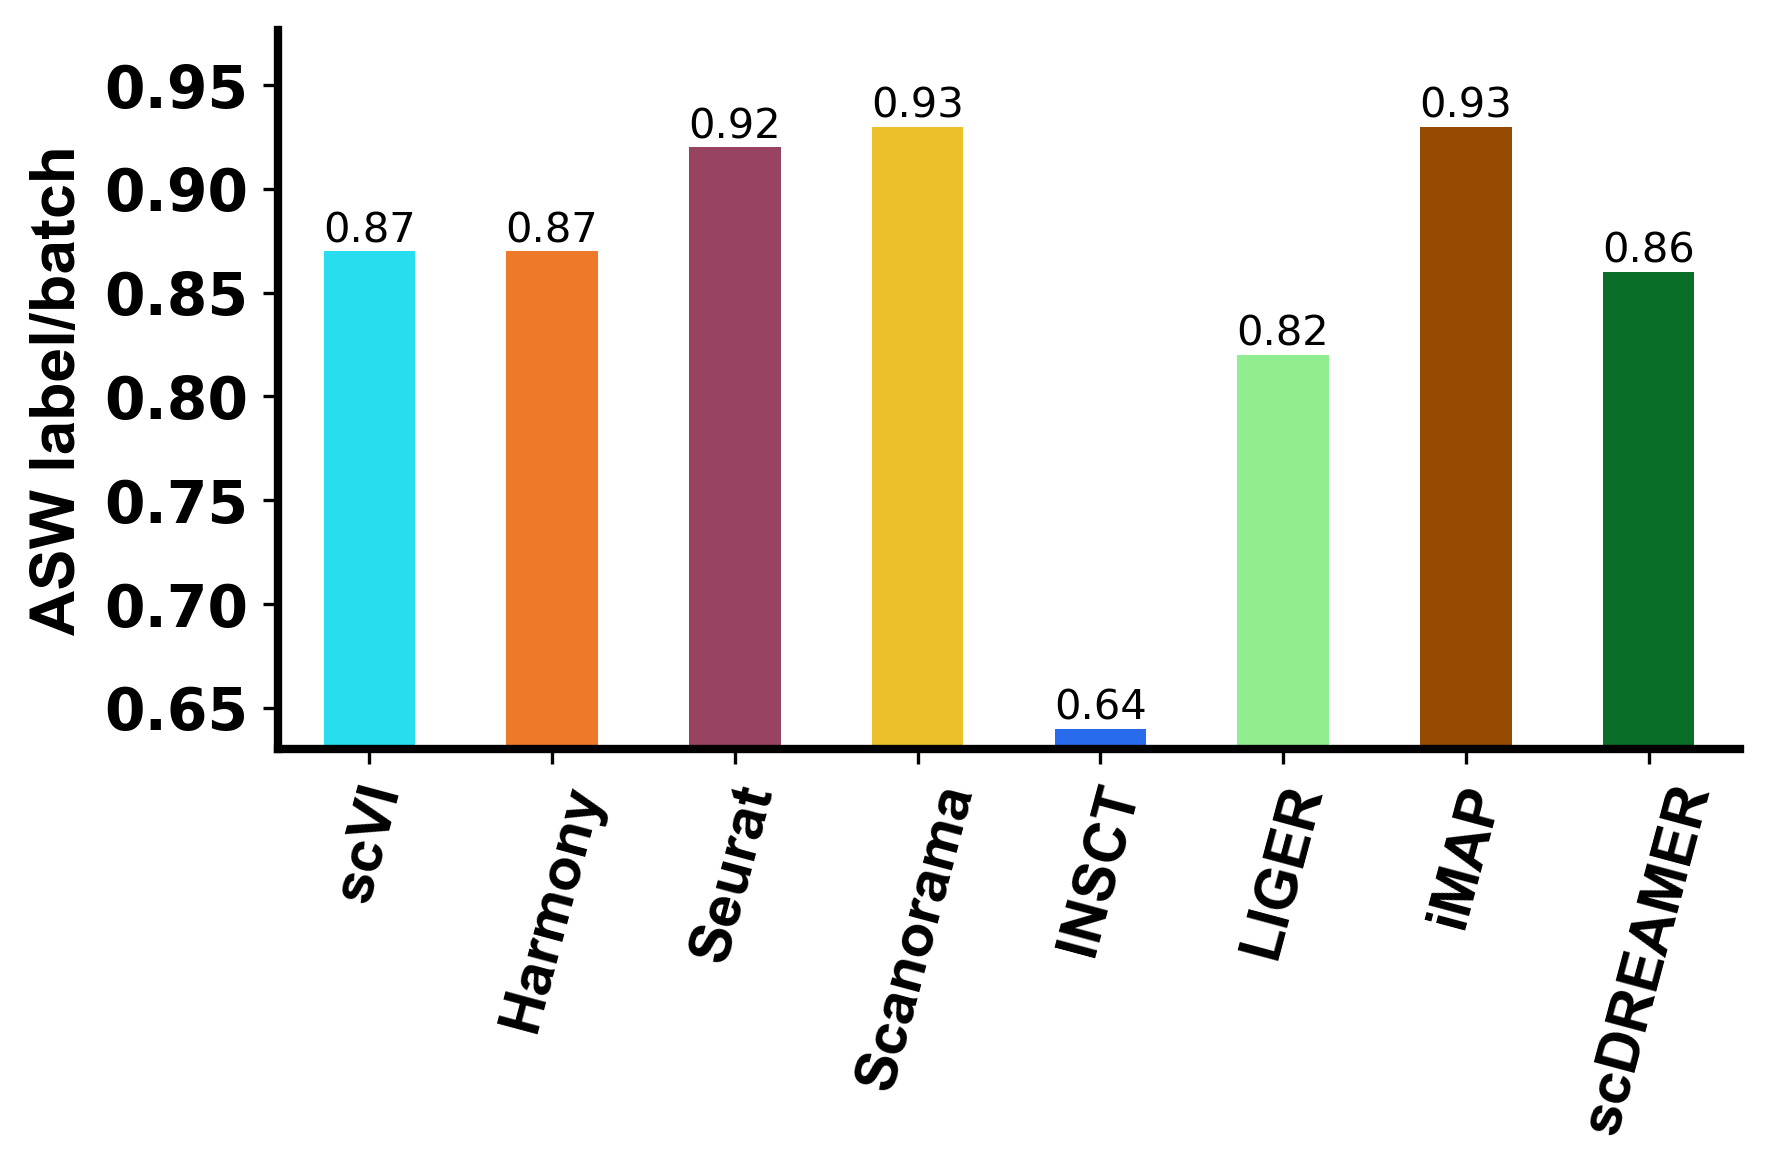

PCR batch Pancreas


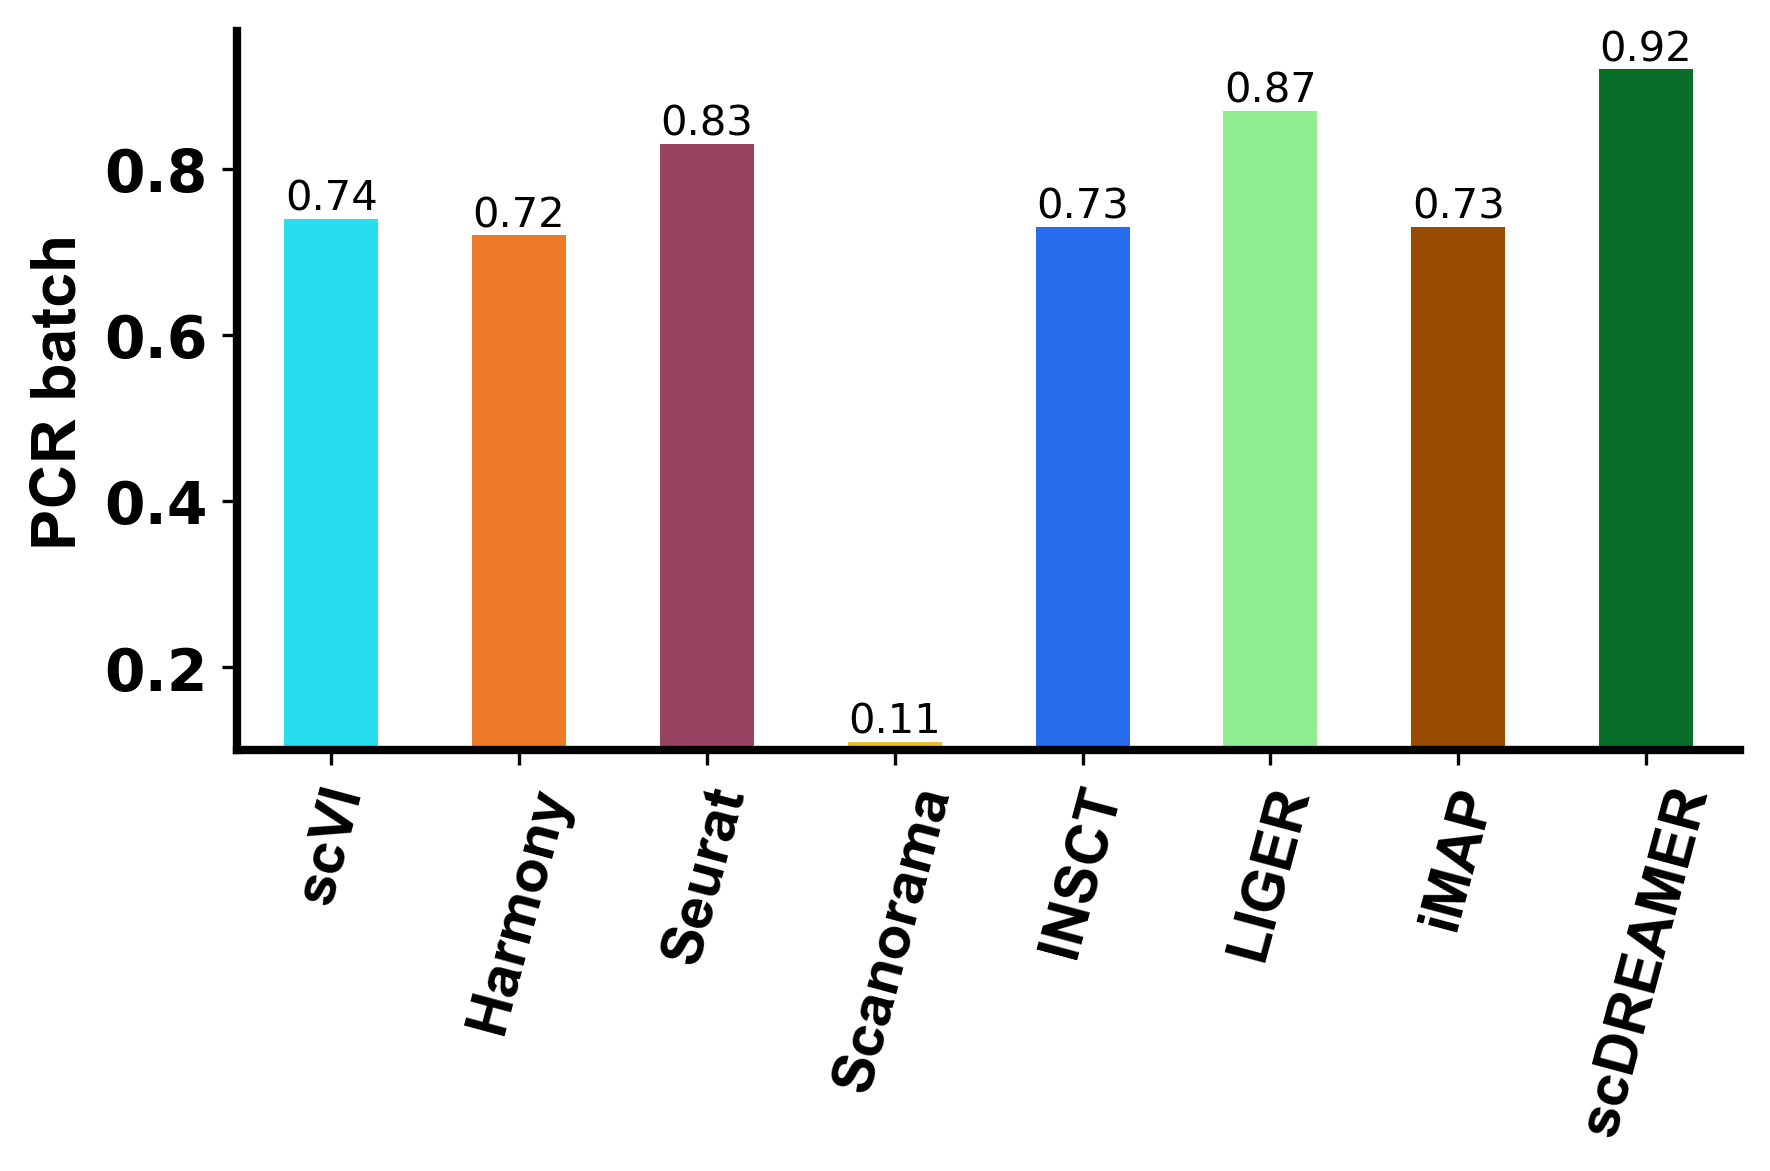

isolated f1 score Pancreas


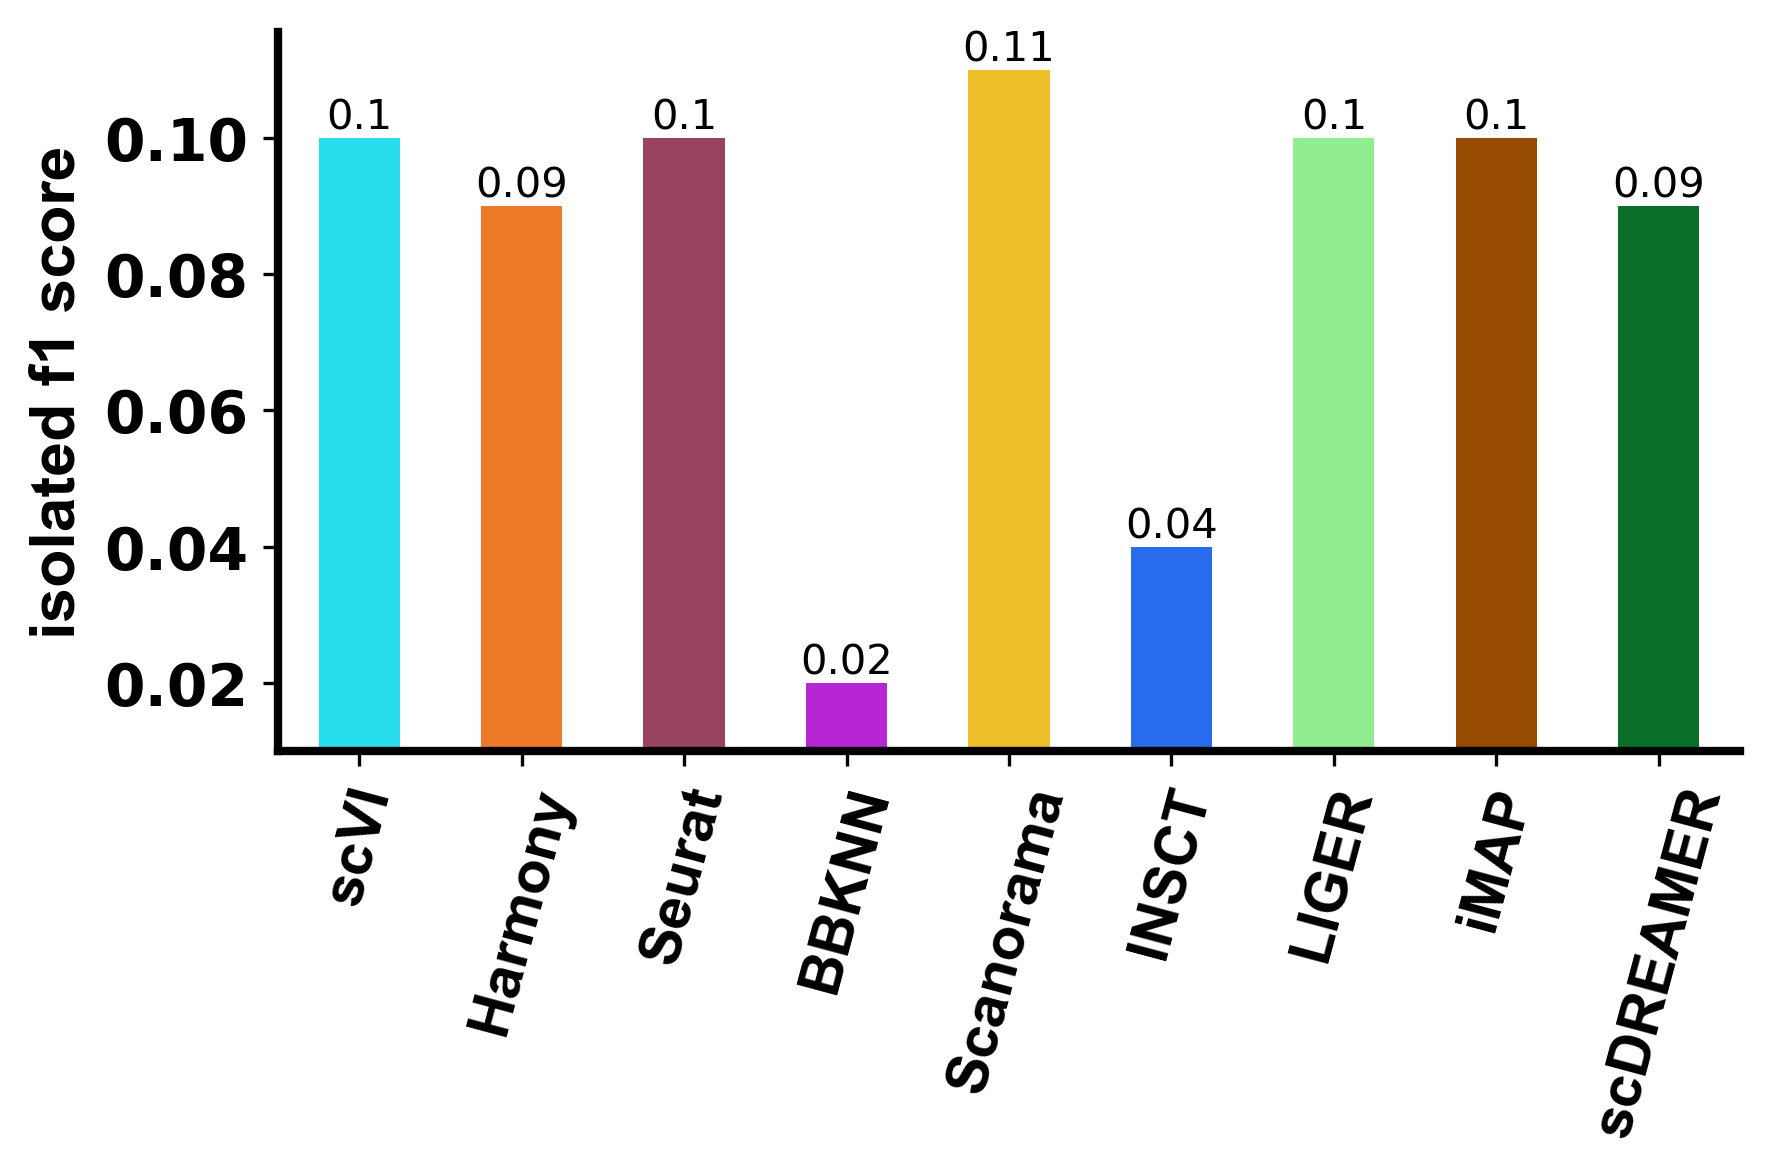

isolated silhouette coefficient Pancreas


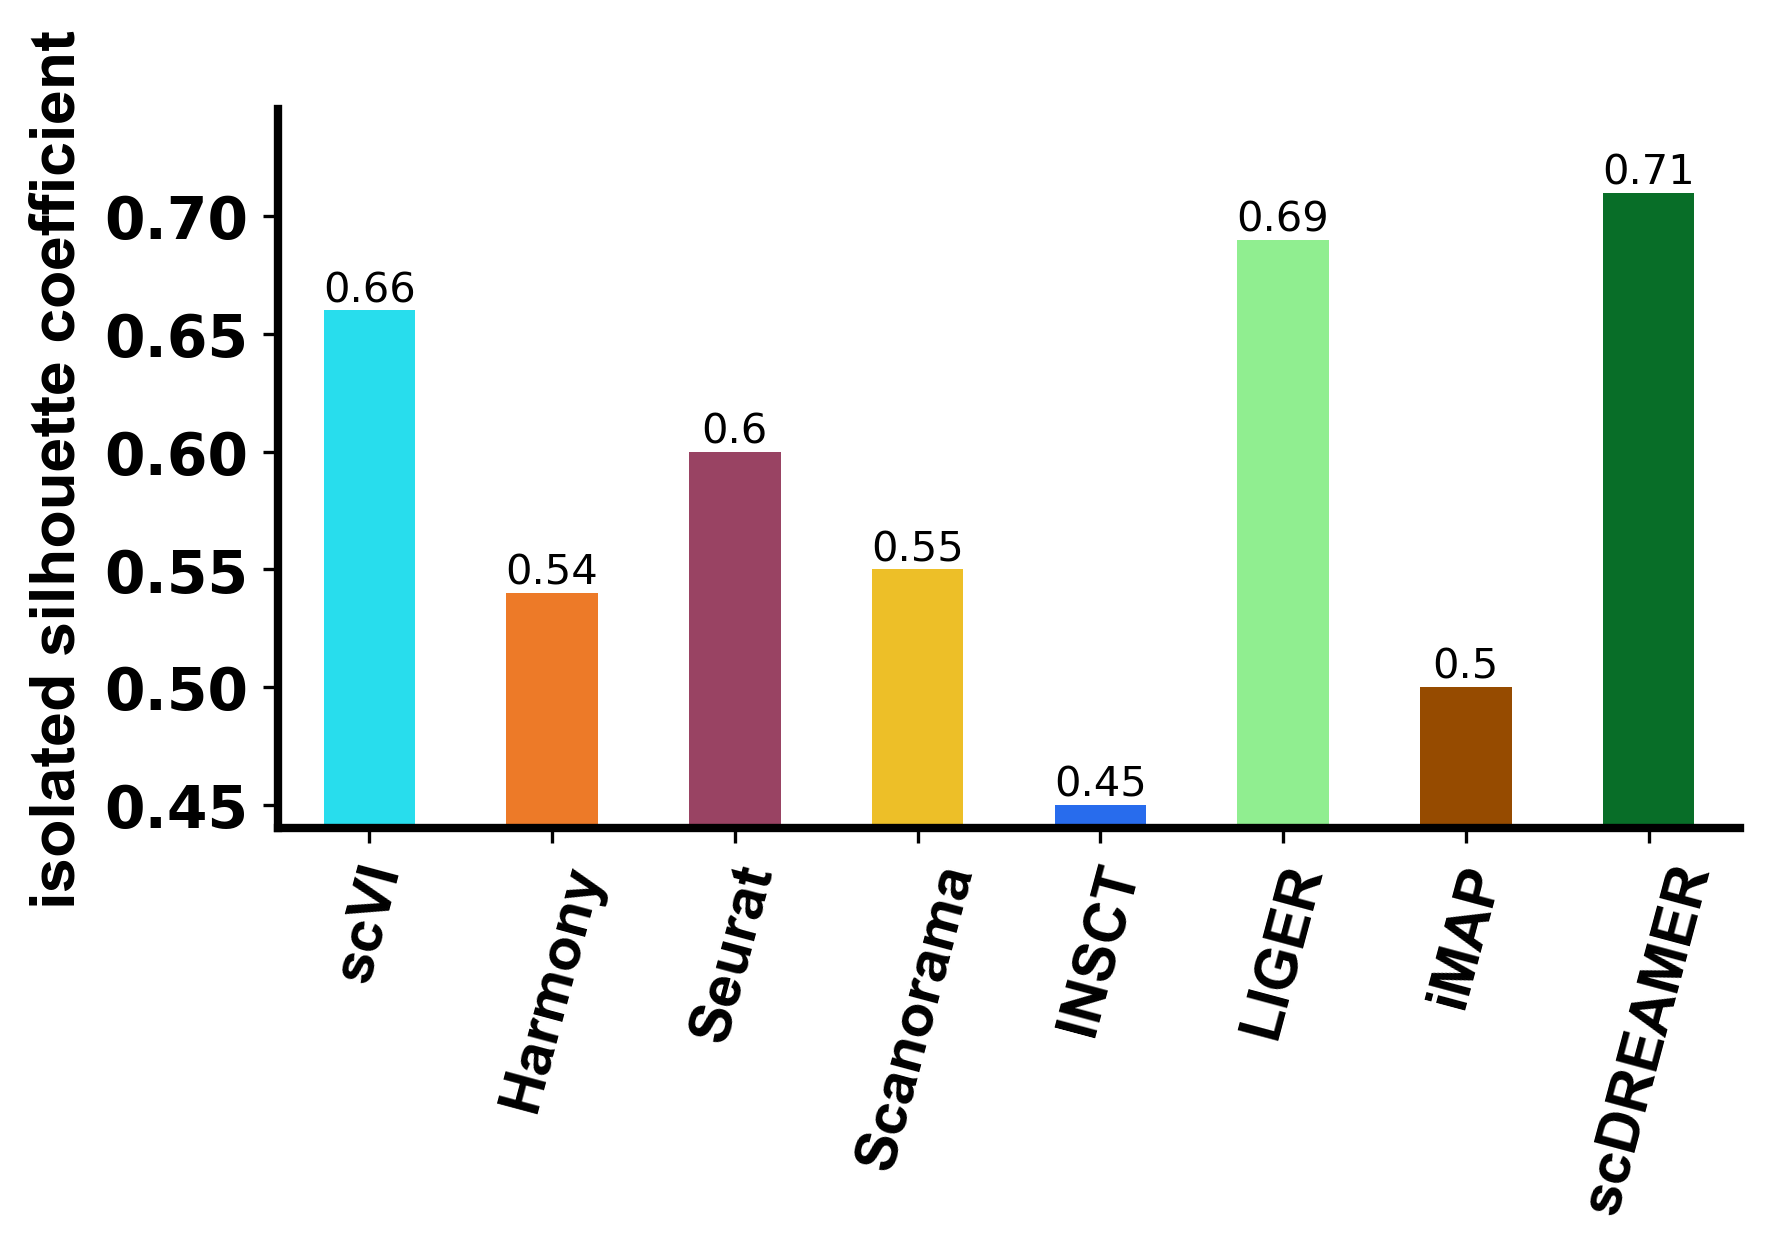

graph connectivity Pancreas


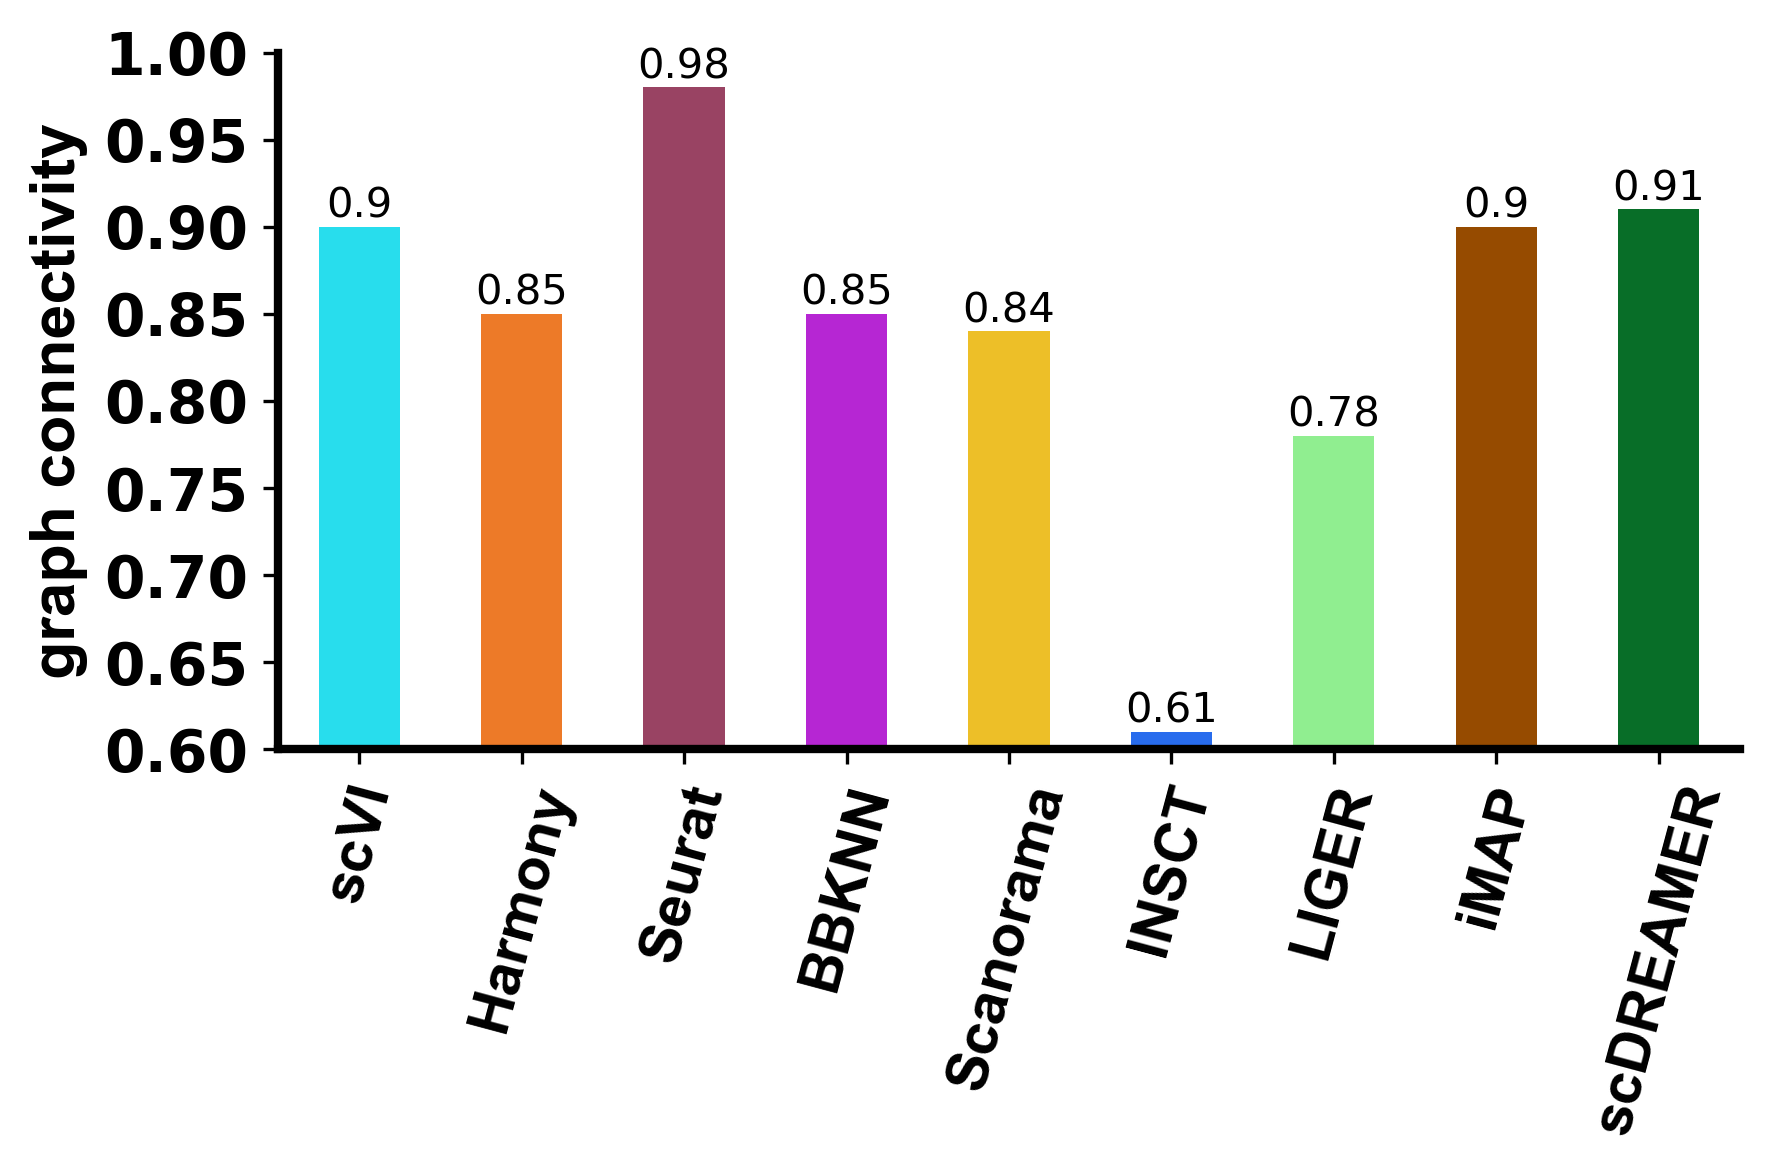

kBET Pancreas


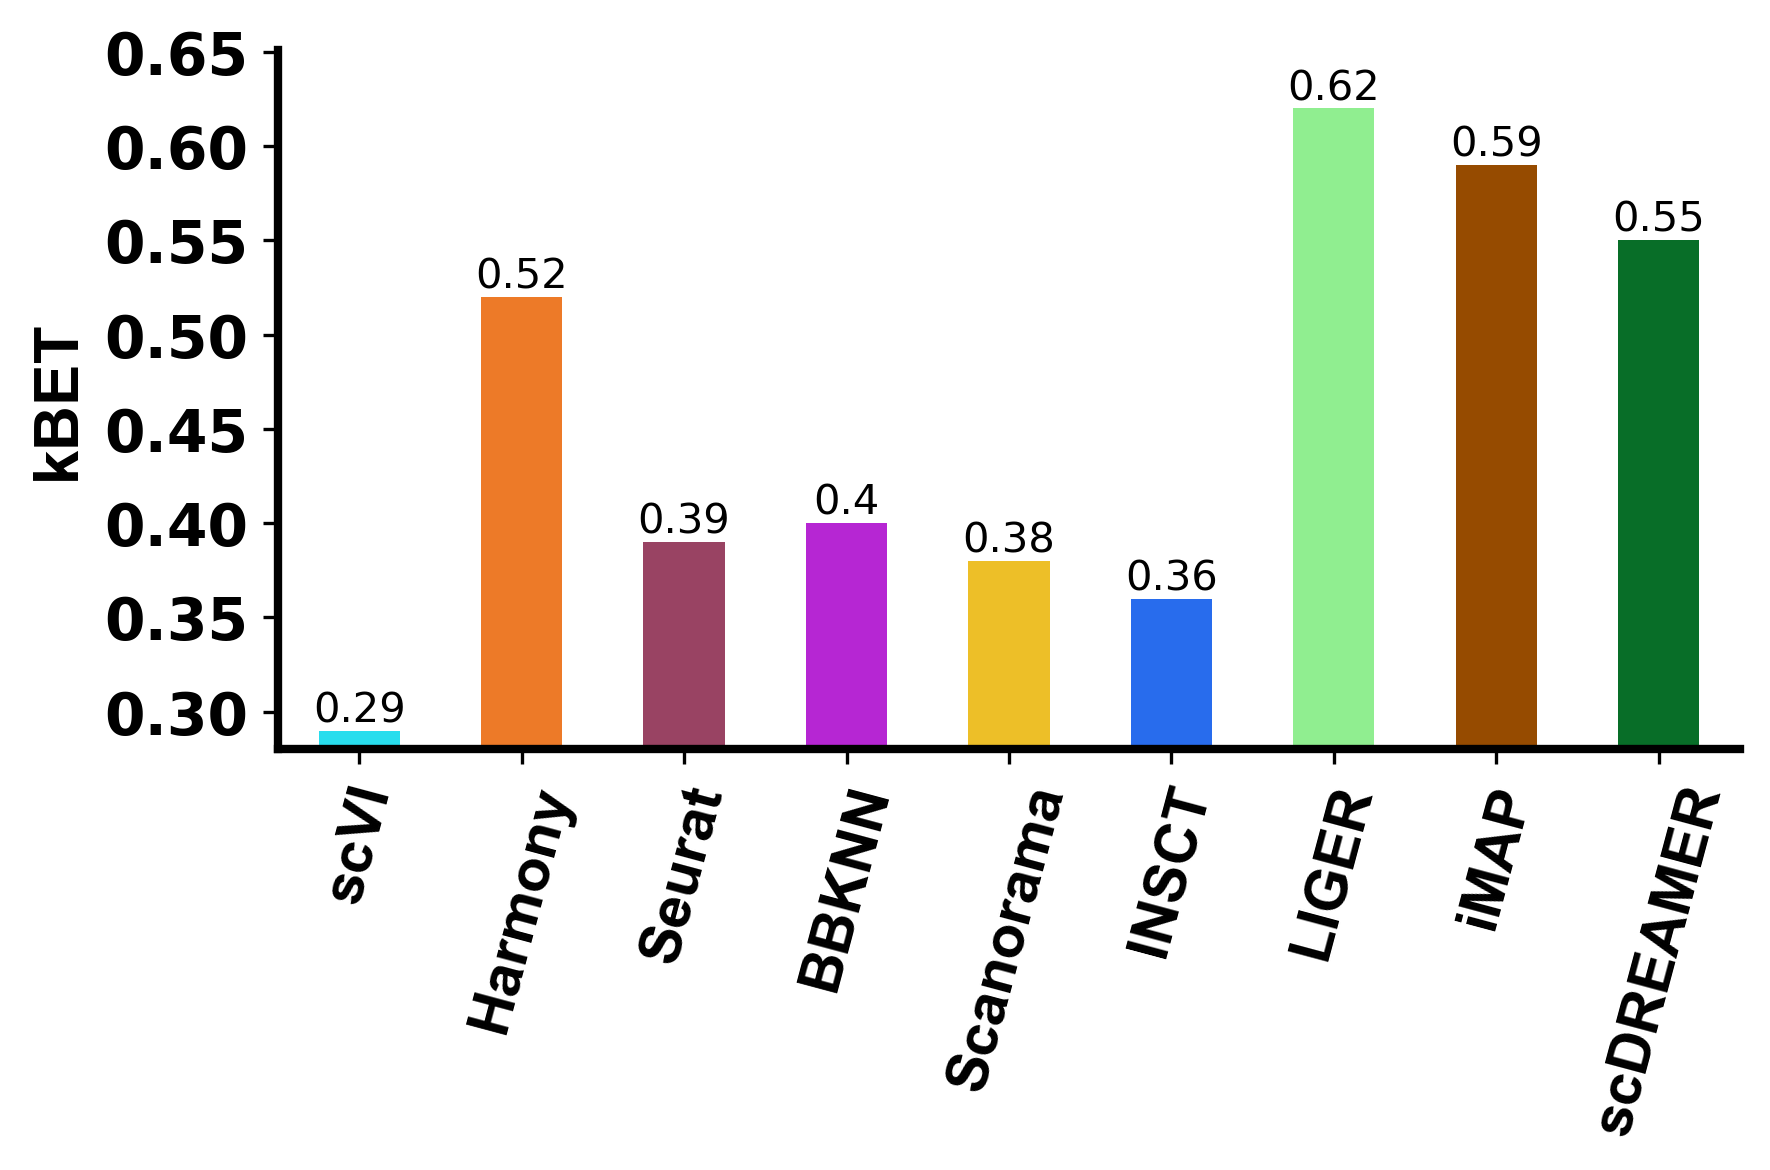

In [7]:
dataset = 'Pancreas'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  ASW label/batch  \
Method                                                                        
scVI                    0.73               0.57       0.57             0.87   
Harmony                 0.70               0.54       0.57             0.85   
Seurat                  0.63               0.50       0.51             0.84   
BBKNN                   0.71               0.54        NaN              NaN   
Scanorama               0.73               0.49       0.55             0.94   
INSCT                   0.63               0.44       0.52             0.66   
LIGER                   0.62               0.44       0.54             0.83   
iMAP                    0.74               0.46       0.57             0.90   
scDREAMER               0.75               0.59       0.59             0.86   

           PCR batch  isolated f1 score  isolated silhouette coefficient  \
Method                                                                     
scVI            0.91               0.85                             0.55   
Harmony         0.41               0.20                             0.49   
Seurat          0.79               0.66                             0.60   
BBKNN            NaN               0.36                              NaN   
Scanorama       0.00               0.67                             0.51   
INSCT           0.51               0.31                             0.41   
LIGER           0.80               0.24                             0.41   
iMAP            0.00               0.62                             0.52   
scDREAMER       0.80               0.86                             0.52   

           graph connectivity  kBET    color  
Method                                        
scVI                     0.80  0.36  #28DDED  
Harmony                  0.57  0.49  #ED7A28  
Seurat                   0.61  0.28  #994363  
BBKNN                    0.93  0.29  #B626D3  
Scanorama                0.59  0.31  #EDBF28  
INSCT                    0.19  0.52  #286CED  
LIGER                    0.29  0.54  #90EE90  
iMAP                     0.58  0.25  #964B00  
scDREAMER                0.73  0.50  #086E28

NMI cluster/label Lung


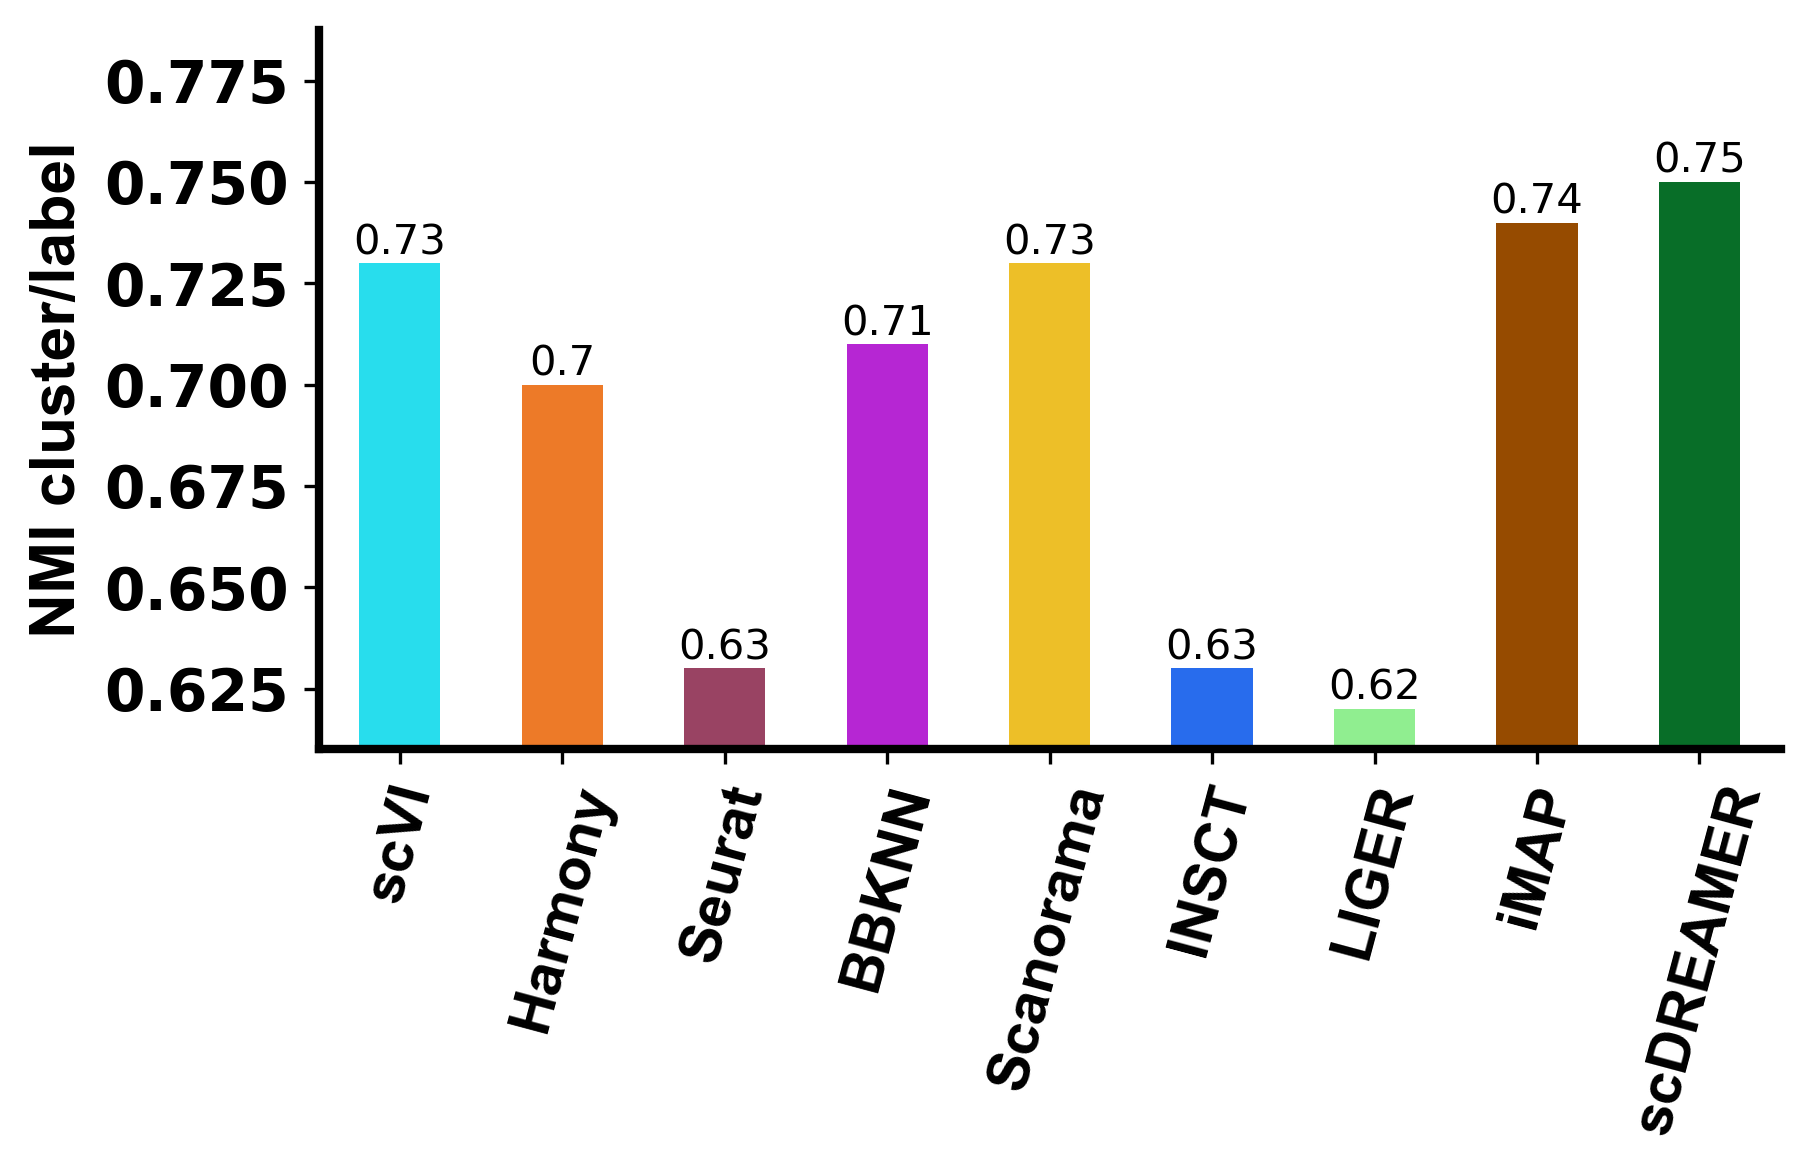

ARI cluster/label Lung


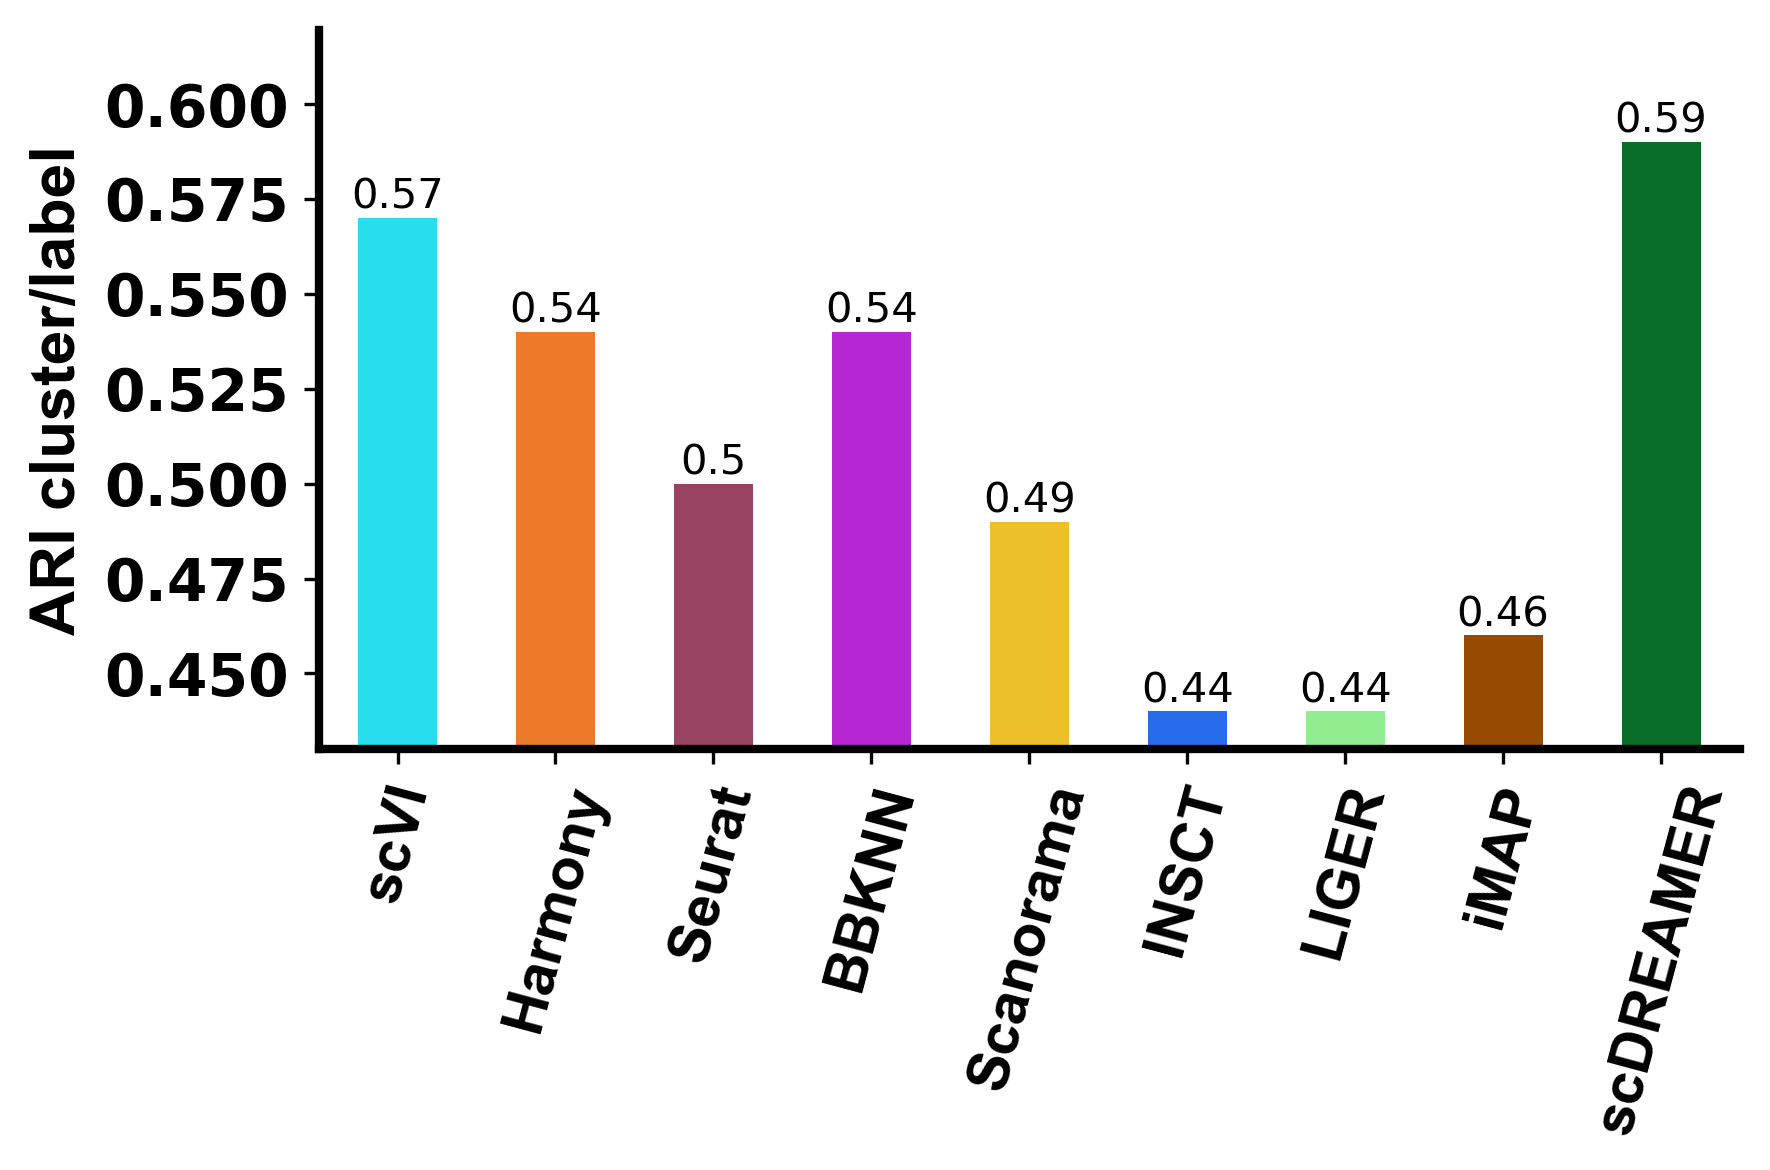

ASW label Lung


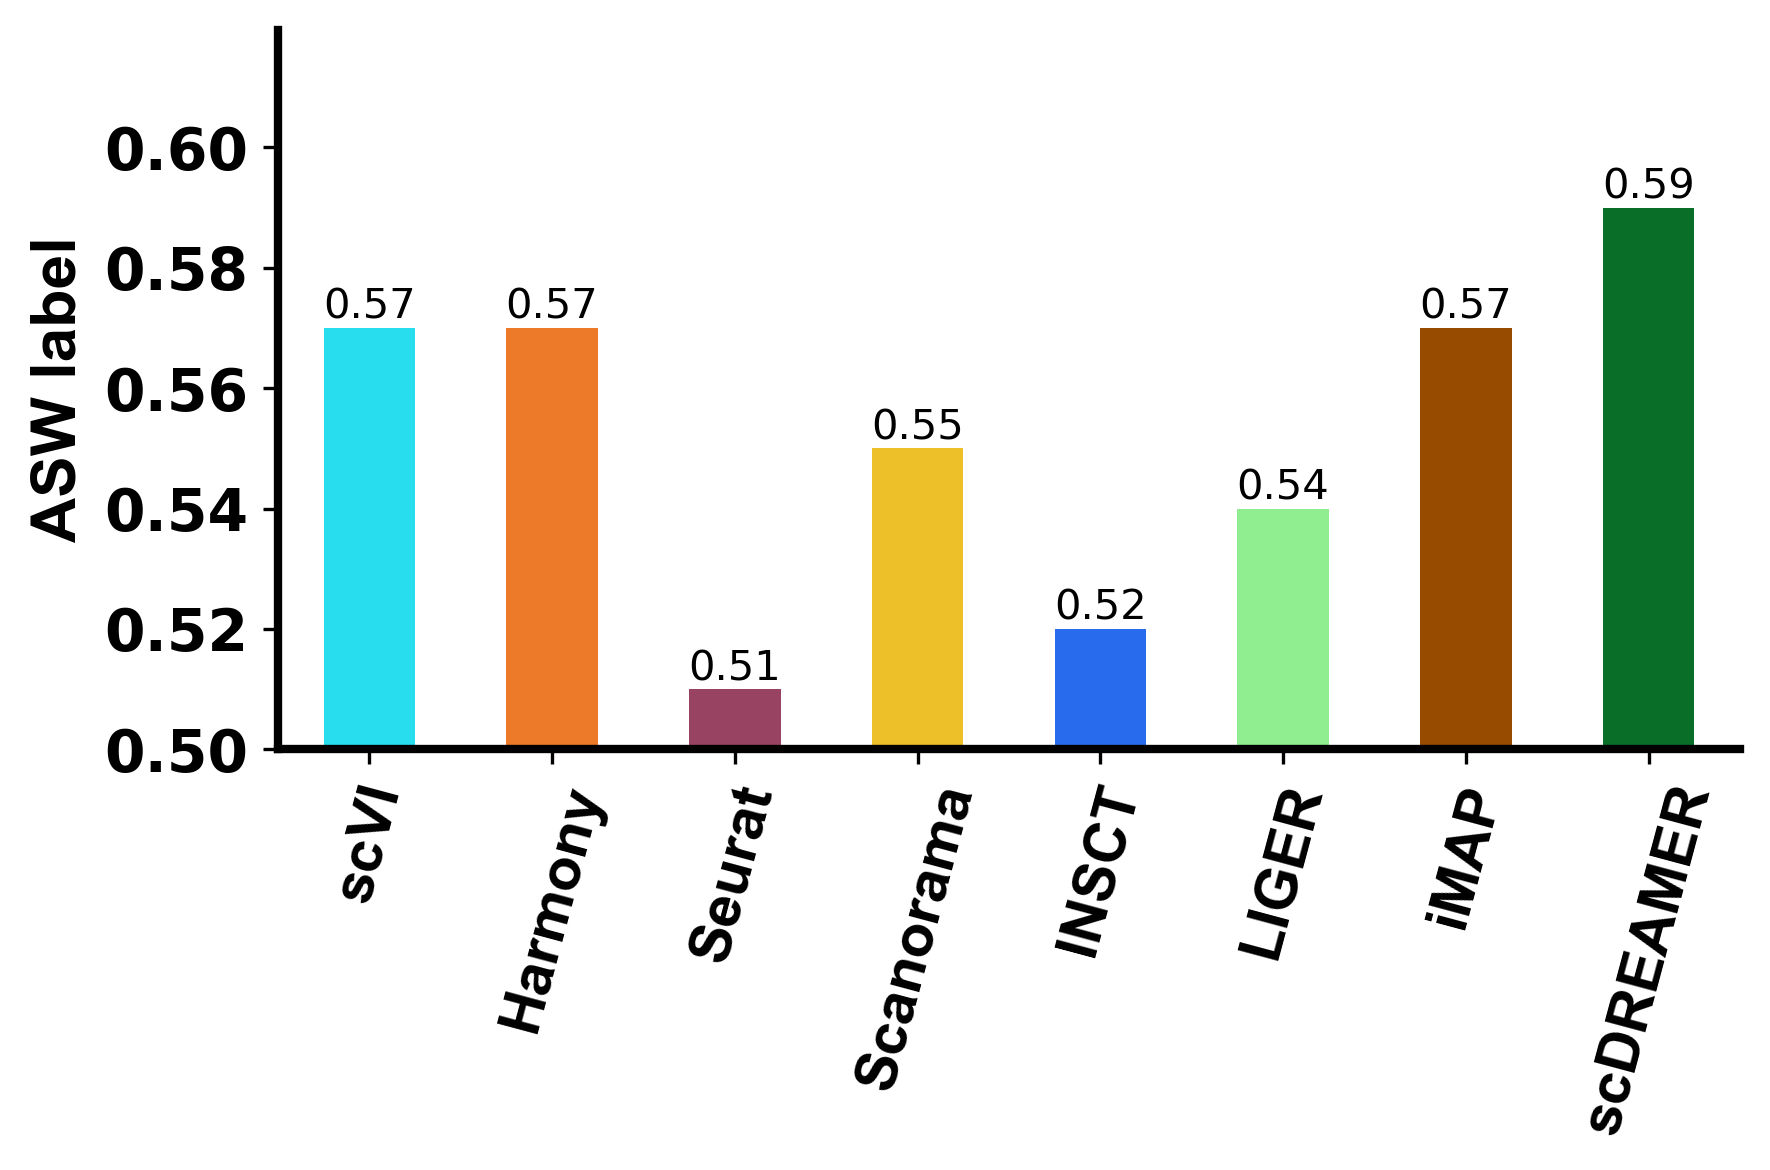

ASW label/batch Lung


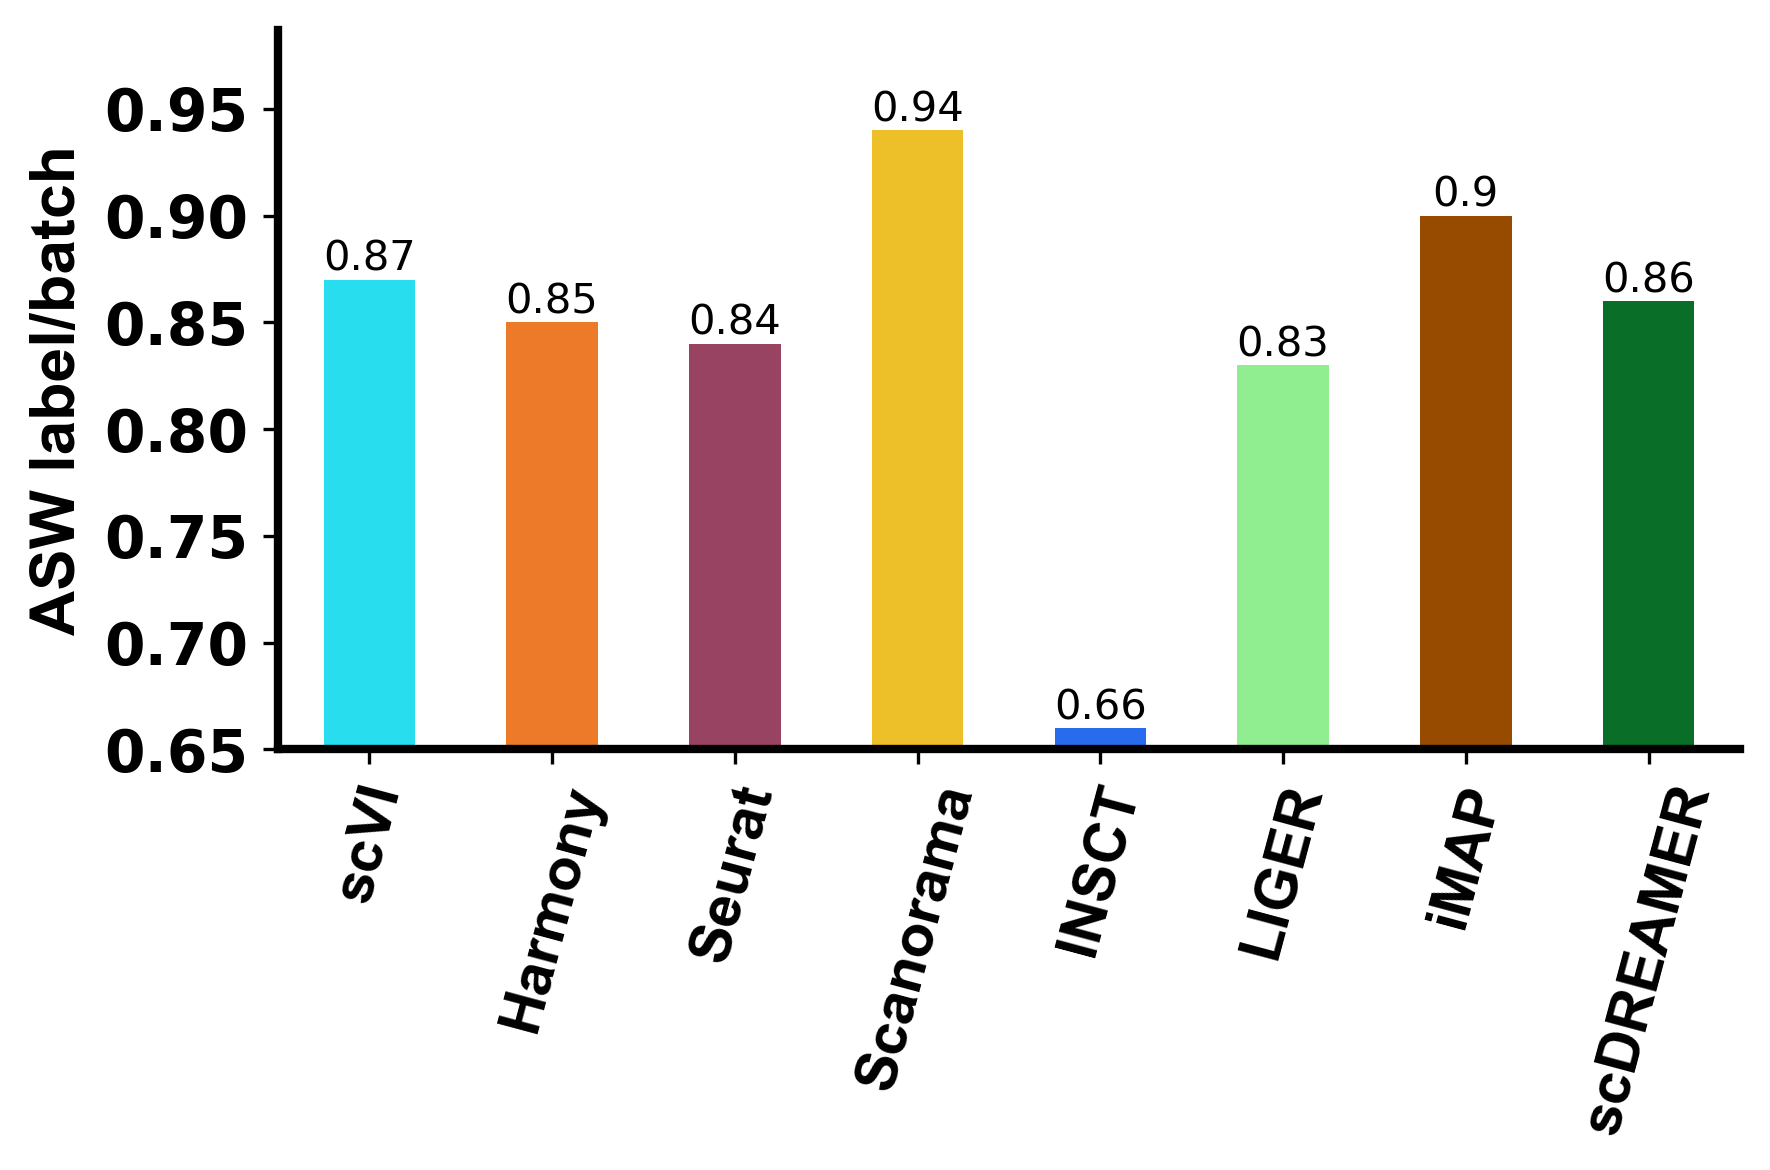

PCR batch Lung


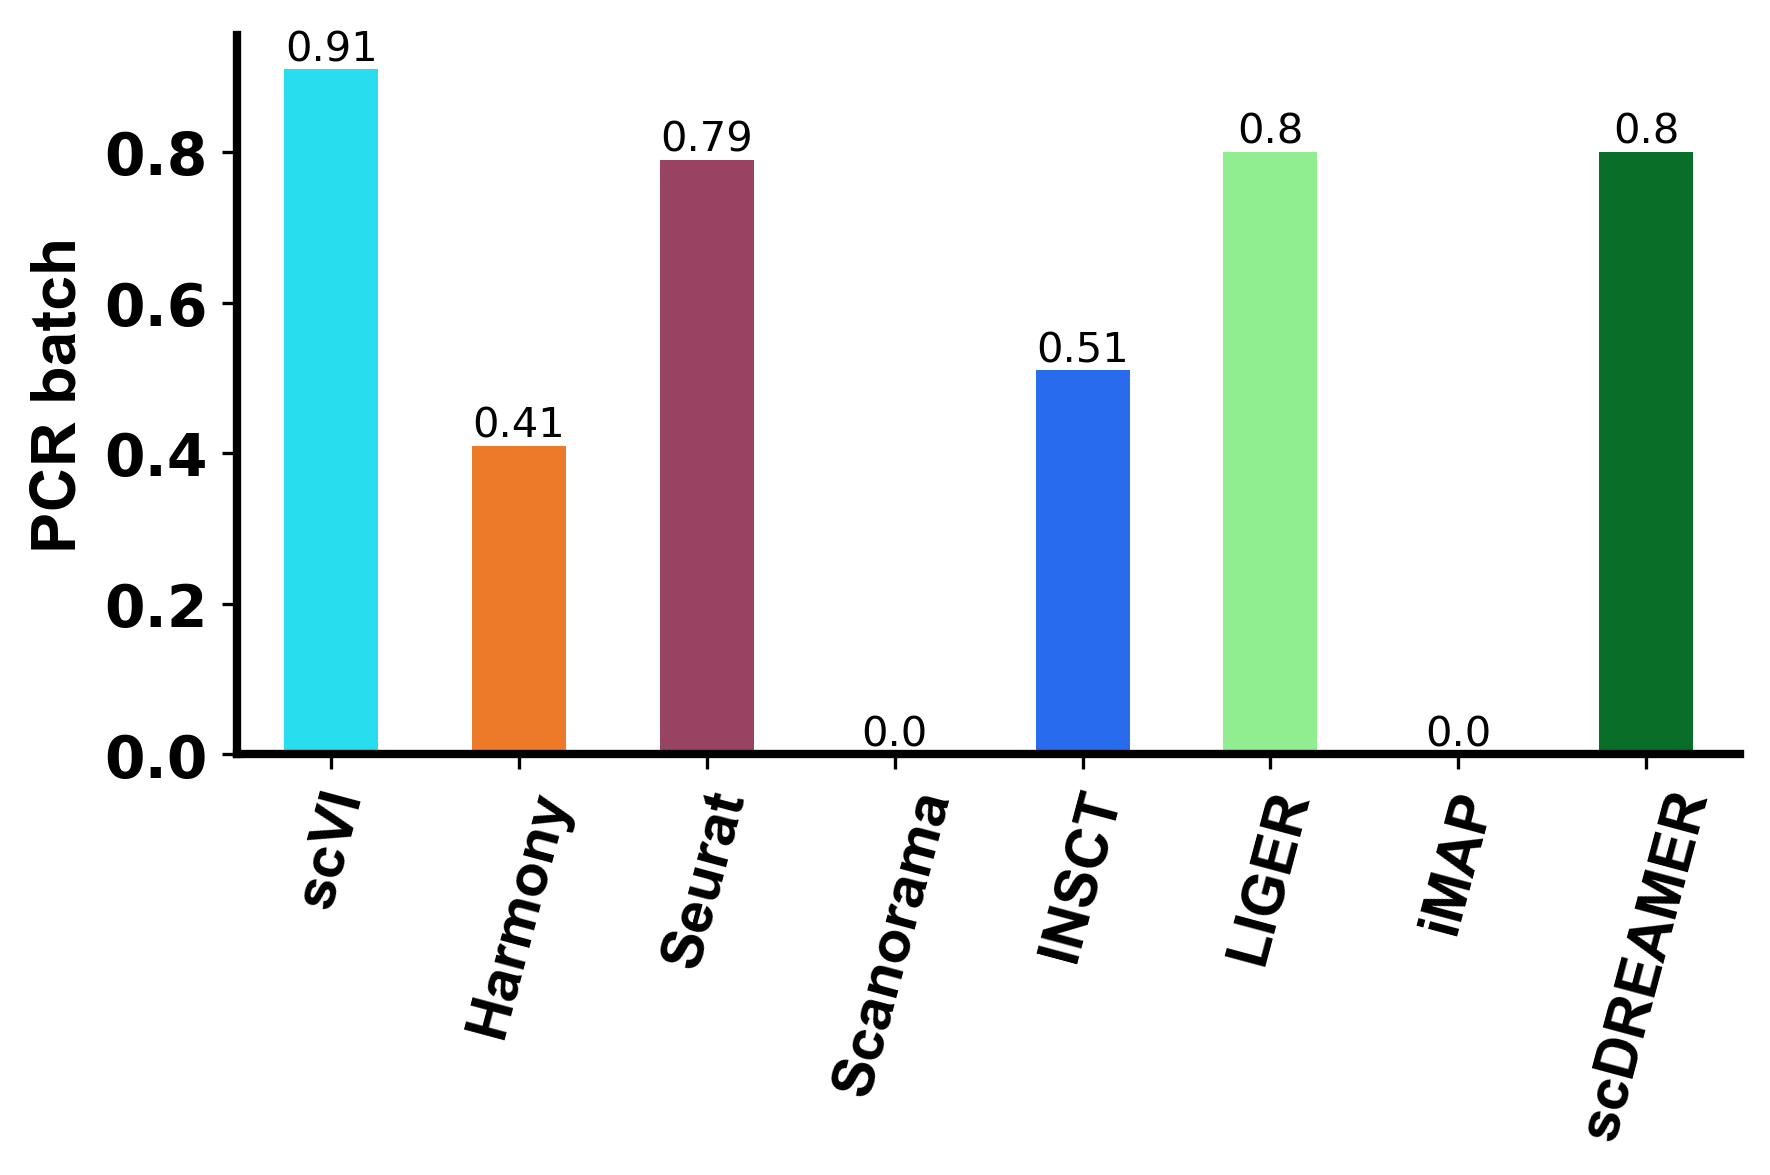

isolated f1 score Lung


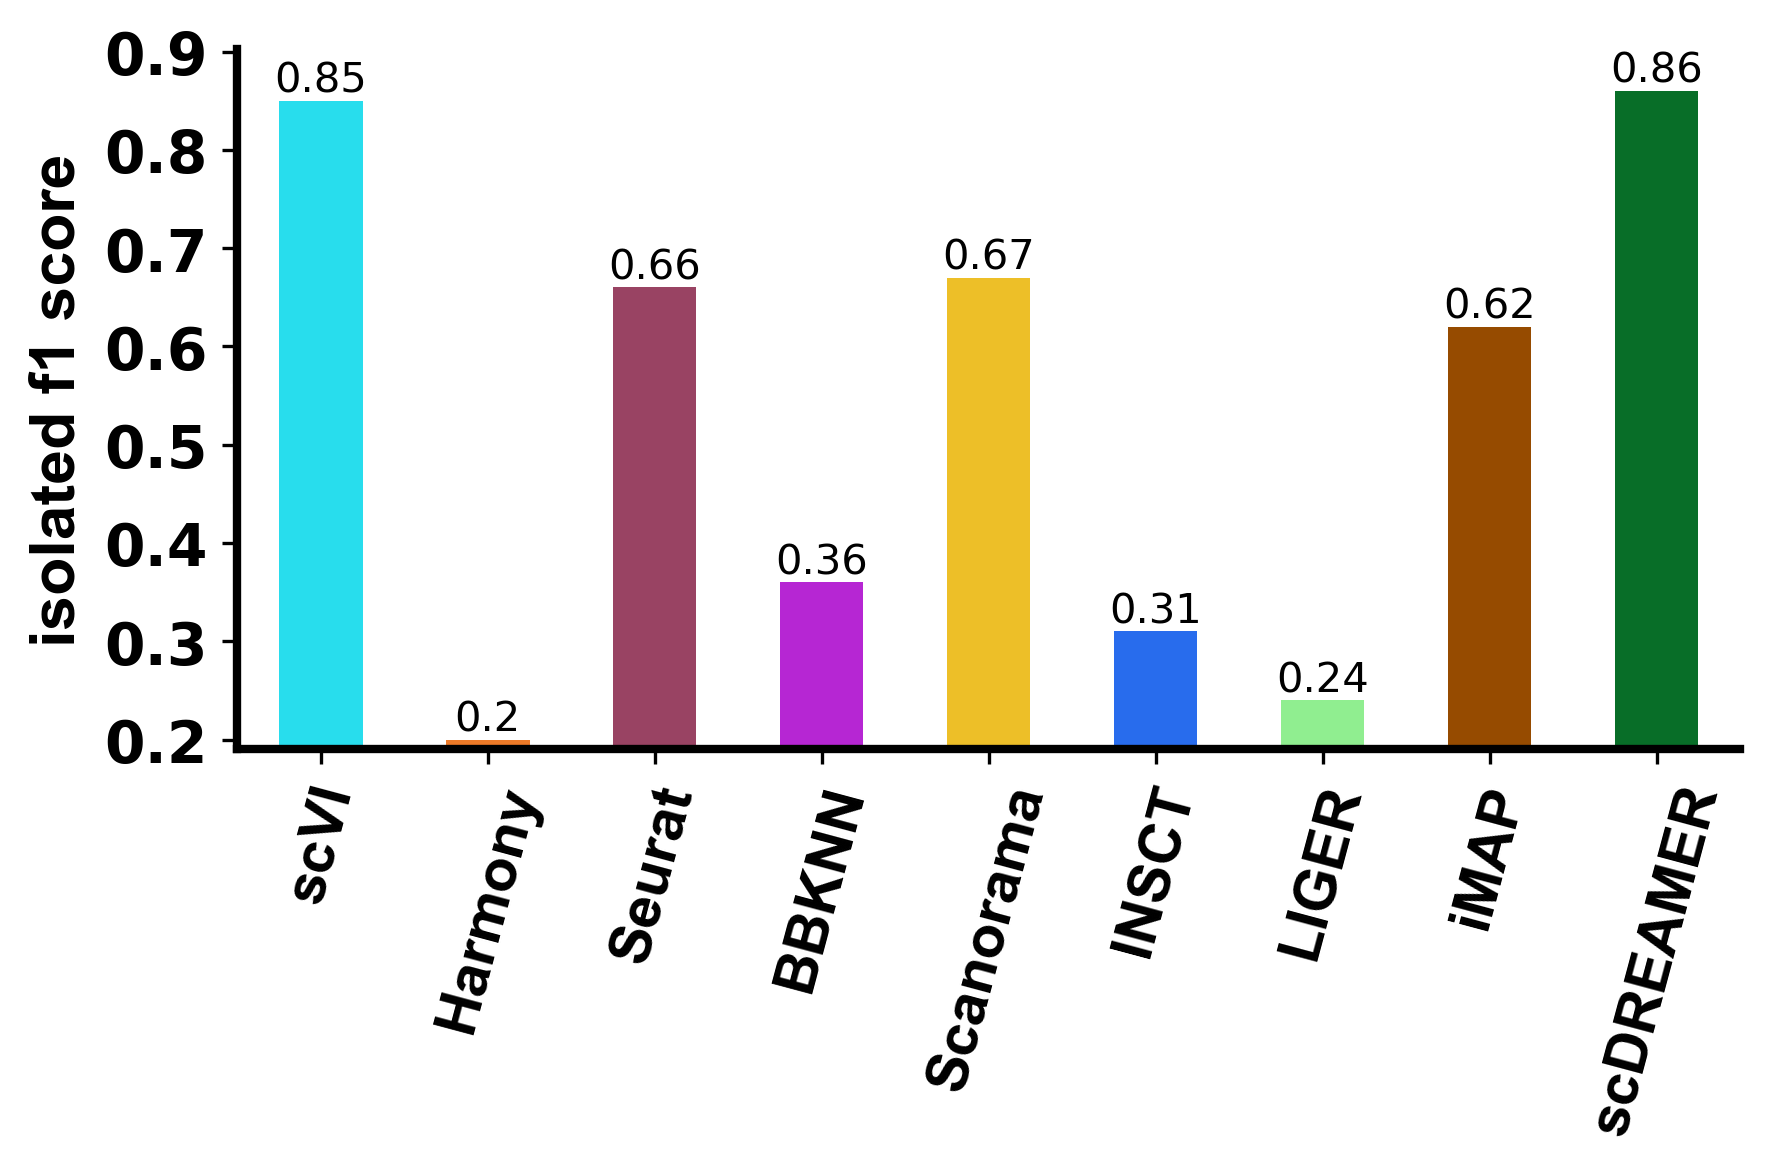

isolated silhouette coefficient Lung


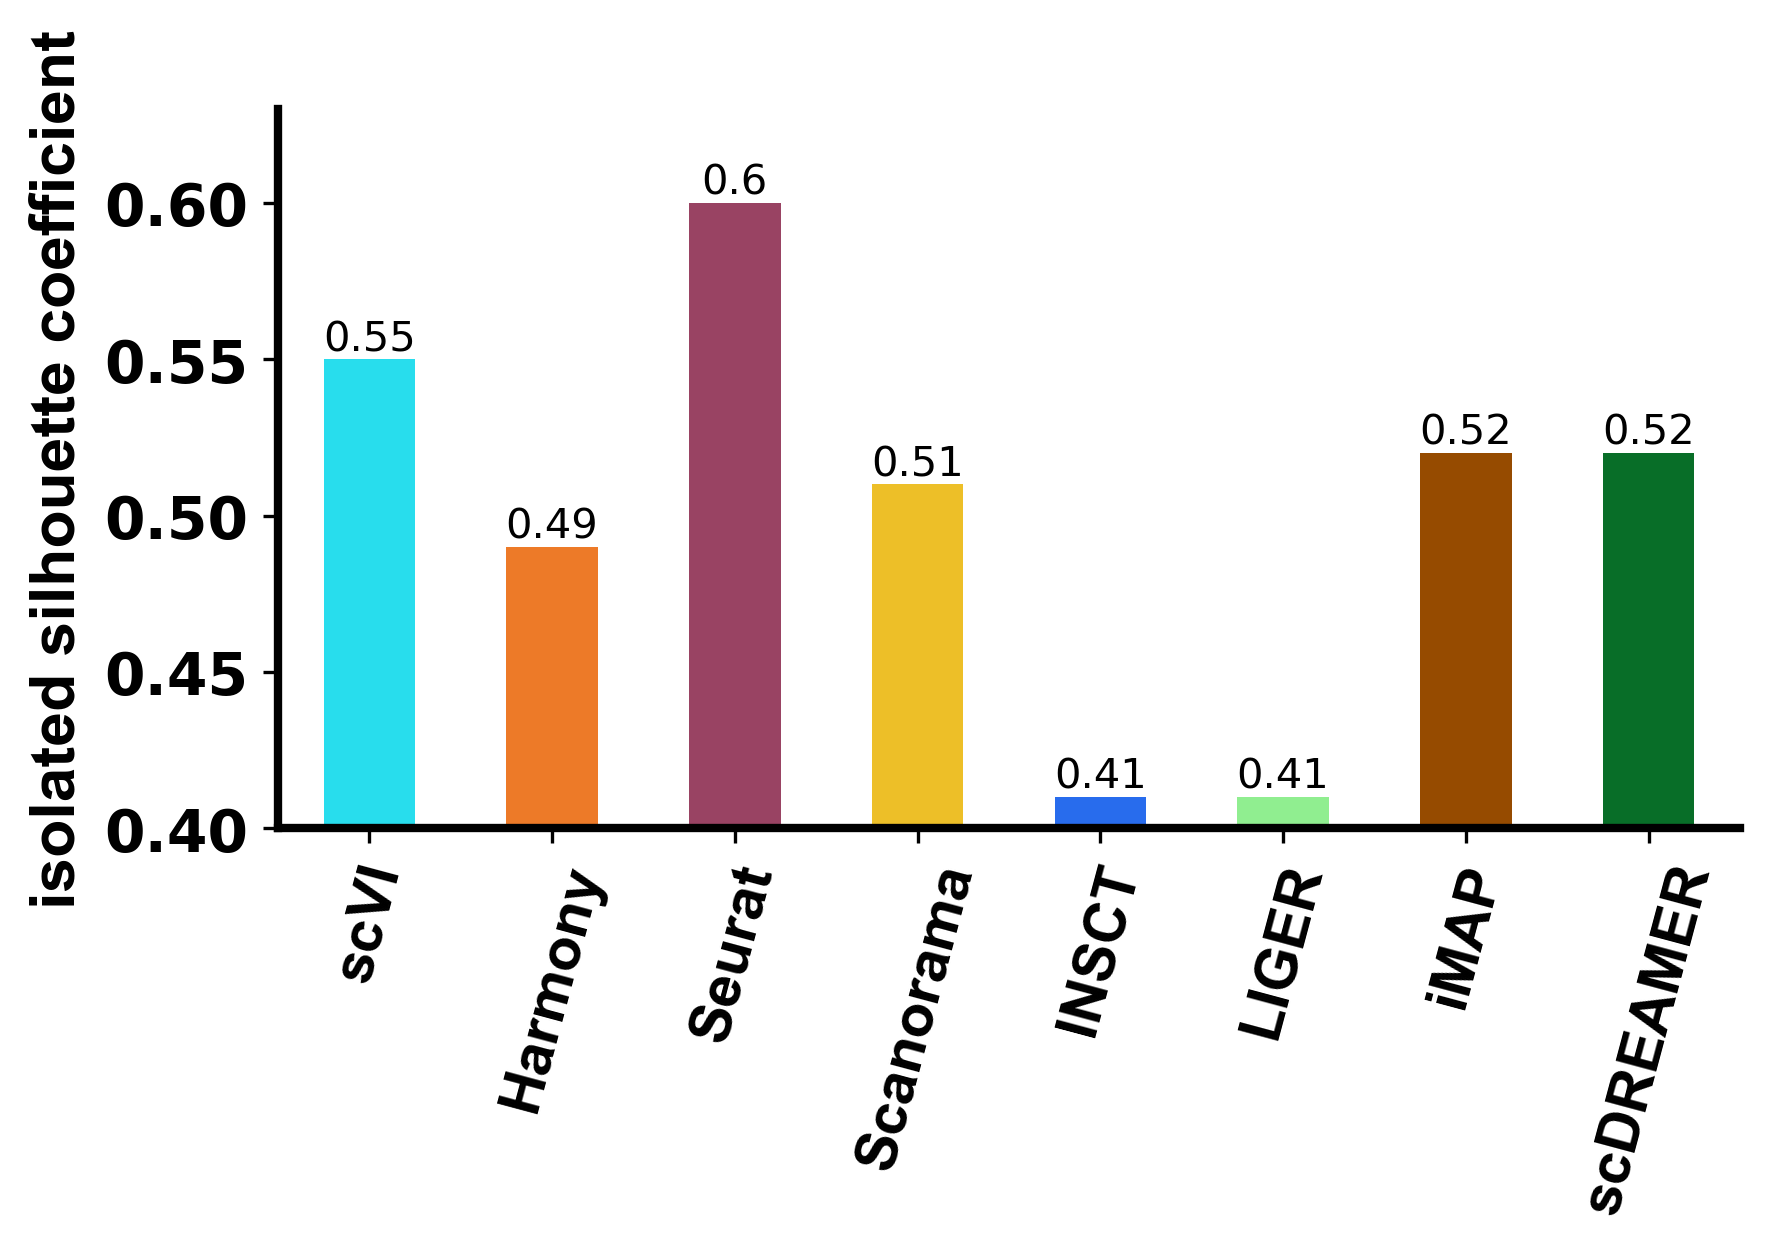

graph connectivity Lung


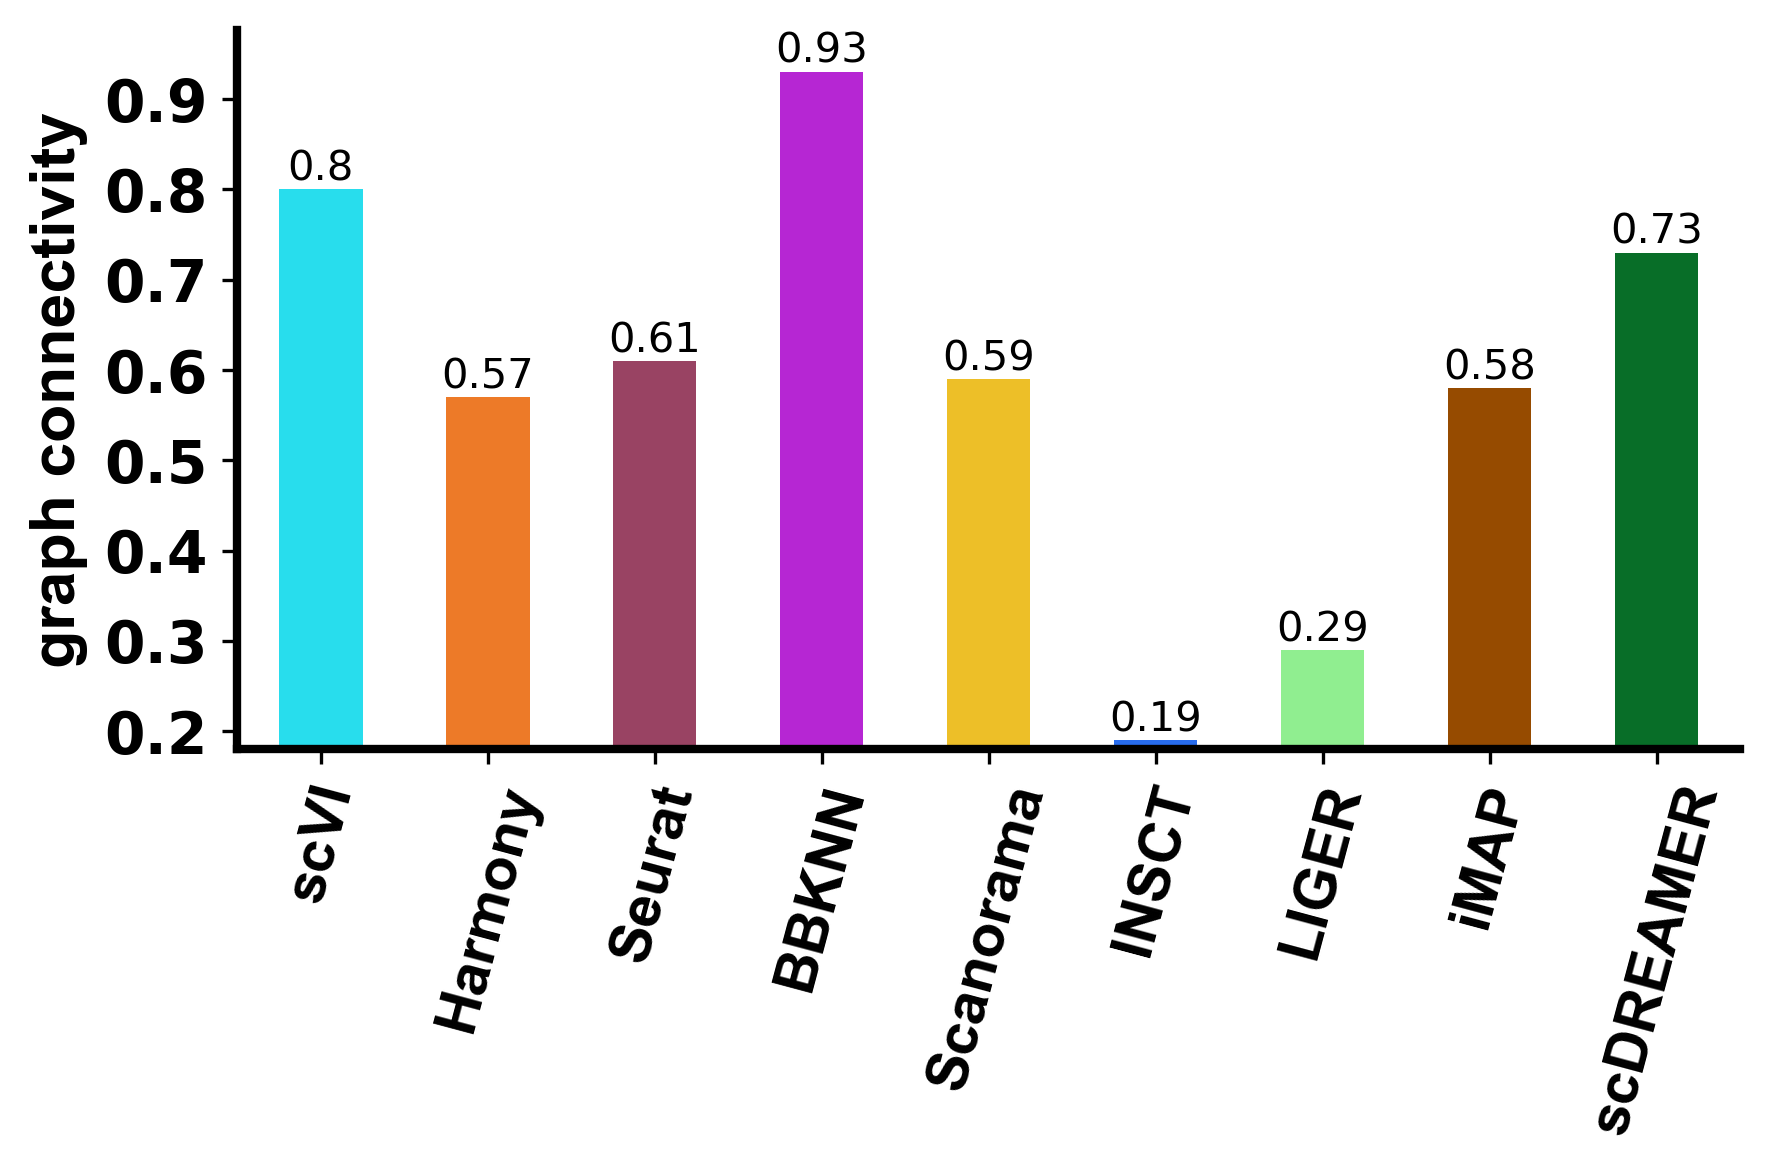

kBET Lung


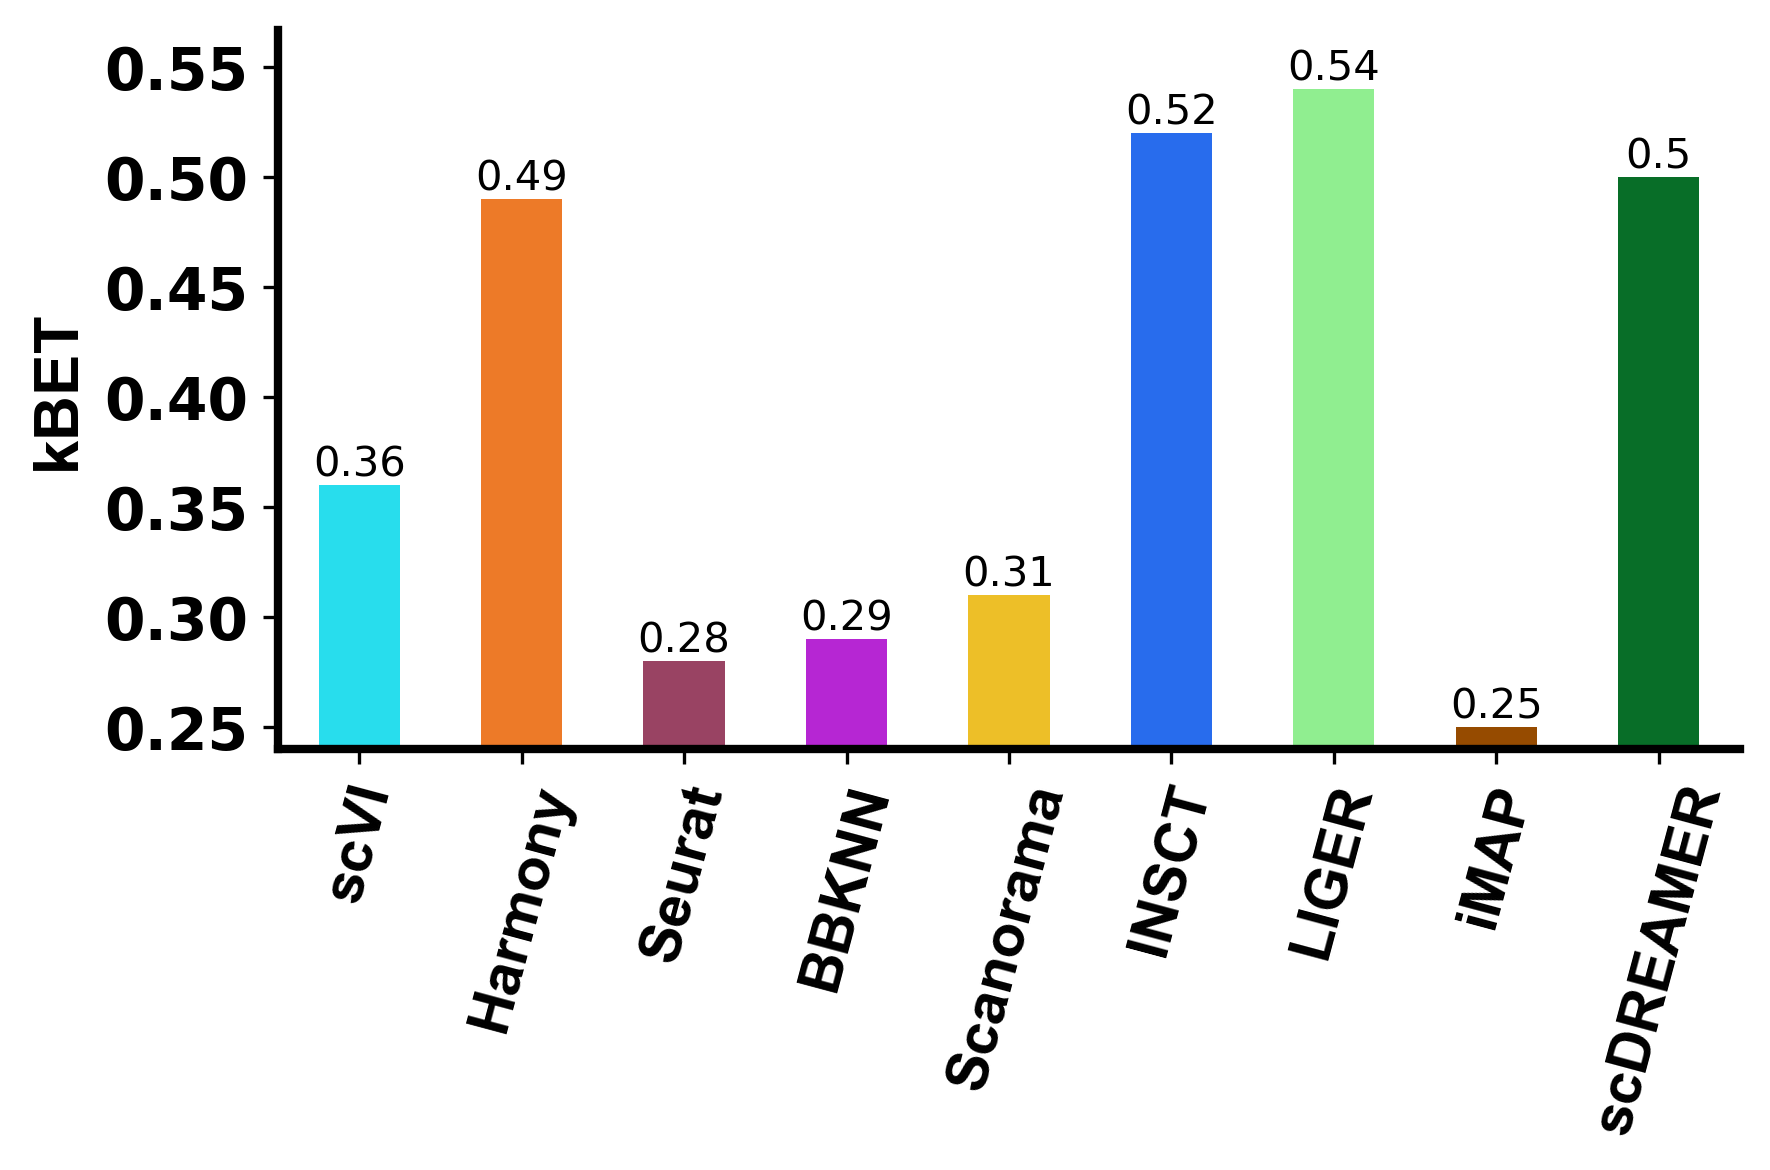

In [8]:
dataset = 'Lung'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  ASW label/batch  \
Method                                                                        
scVI                    0.78               0.81       0.58             0.87   
Harmony                 0.79               0.73       0.58             0.88   
Seurat                  0.72               0.59       0.51             0.90   
BBKNN                   0.76               0.63        NaN              NaN   
Scanorama               0.81               0.76       0.56             0.94   
INSCT                   0.67               0.47       0.56             0.72   
LIGER                   0.74               0.77       0.62             0.83   
iMAP                    0.79               0.75       0.55             0.90   
scDREAMER               0.81               0.82       0.59             0.89   

           PCR batch  isolated f1 score  isolated silhouette coefficient  \
Method                                                                     
scVI            0.90               0.81                             0.57   
Harmony         0.55               0.69                             0.56   
Seurat          0.88               0.31                             0.46   
BBKNN            NaN               0.33                              NaN   
Scanorama       0.03               0.75                             0.53   
INSCT           0.87               0.50                             0.51   
LIGER           0.80               0.46                             0.60   
iMAP            0.69               0.64                             0.52   
scDREAMER       0.93               0.74                             0.56   

           graph connectivity  kBET    color  
Method                                        
scVI                     0.97  0.21  #28DDED  
Harmony                  0.97  0.35  #ED7A28  
Seurat                   0.95  0.31  #994363  
BBKNN                    0.99  0.27  #B626D3  
Scanorama                0.98  0.22  #EDBF28  
INSCT                    0.69  0.27  #286CED  
LIGER                    0.75  0.44  #90EE90  
iMAP                     0.98  0.20  #964B00  
scDREAMER                0.97  0.41  #086E28

NMI cluster/label Immune_Human


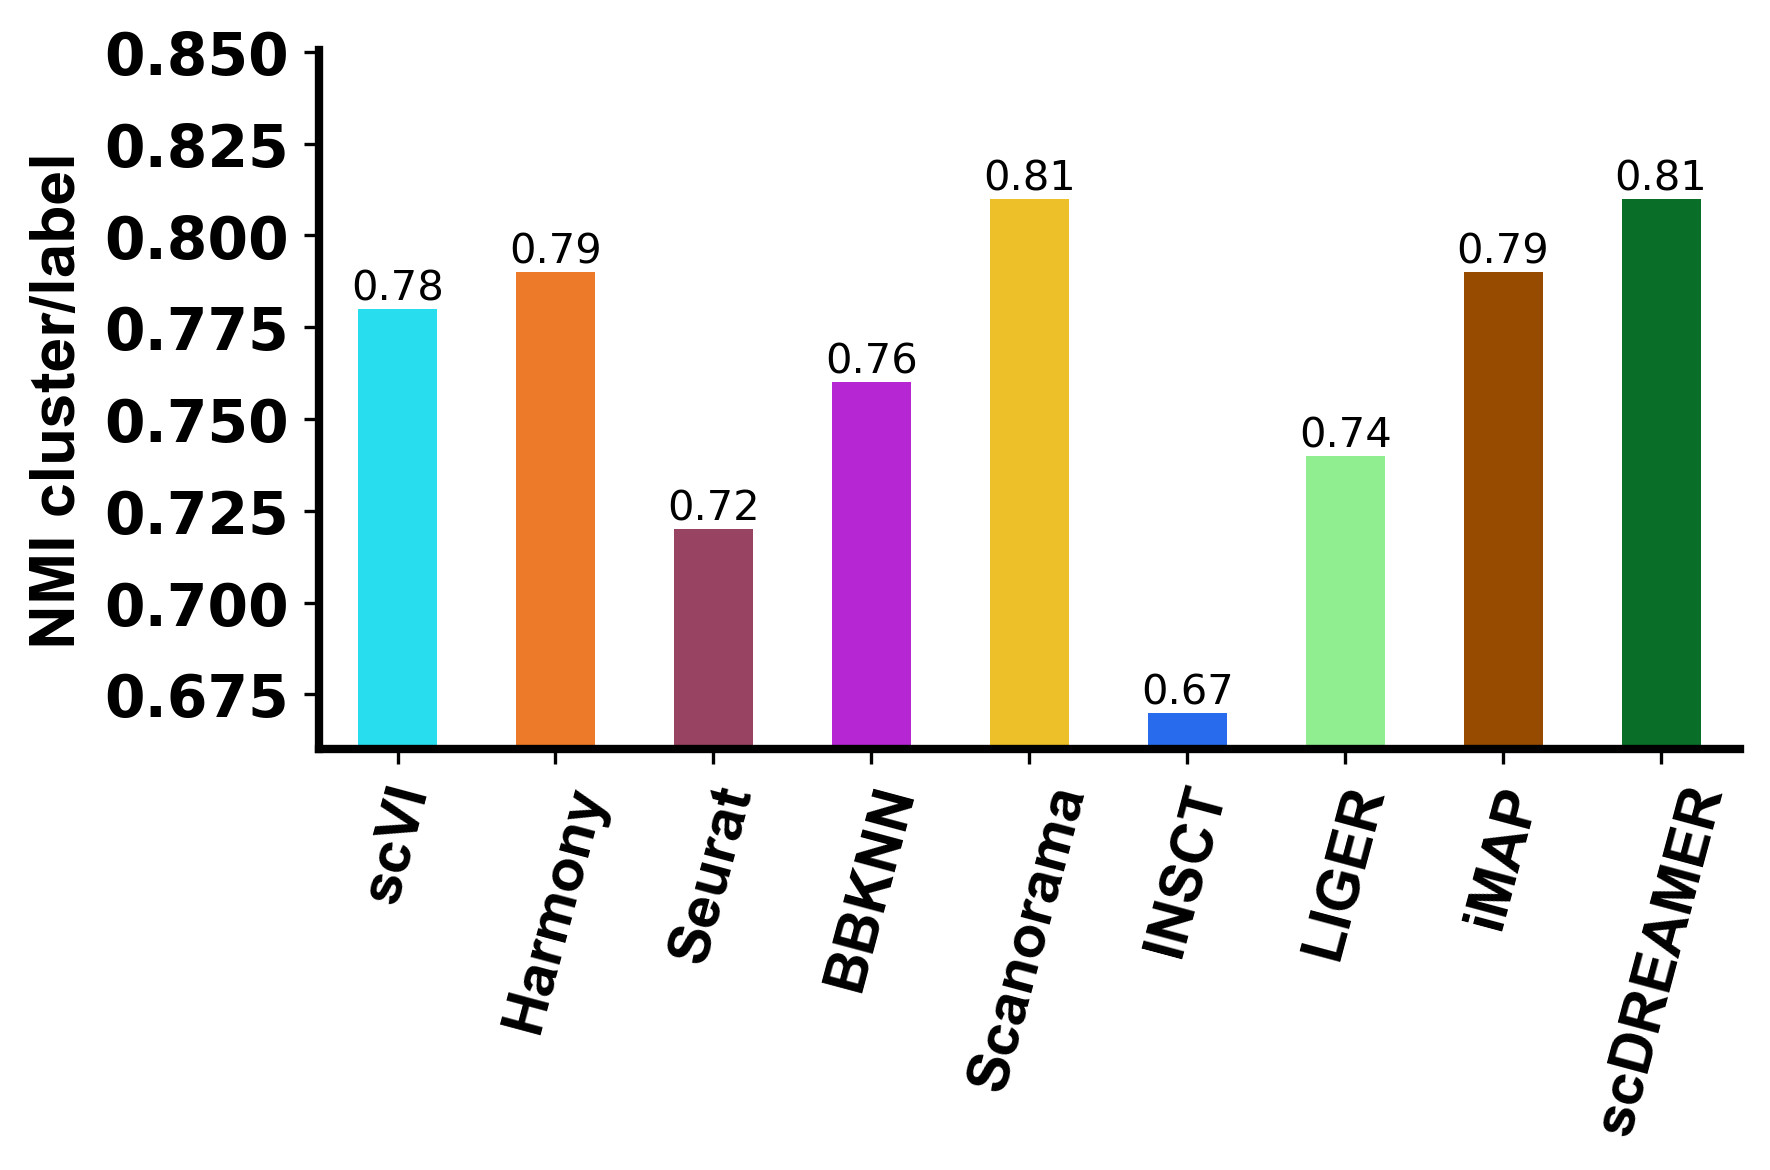

ARI cluster/label Immune_Human


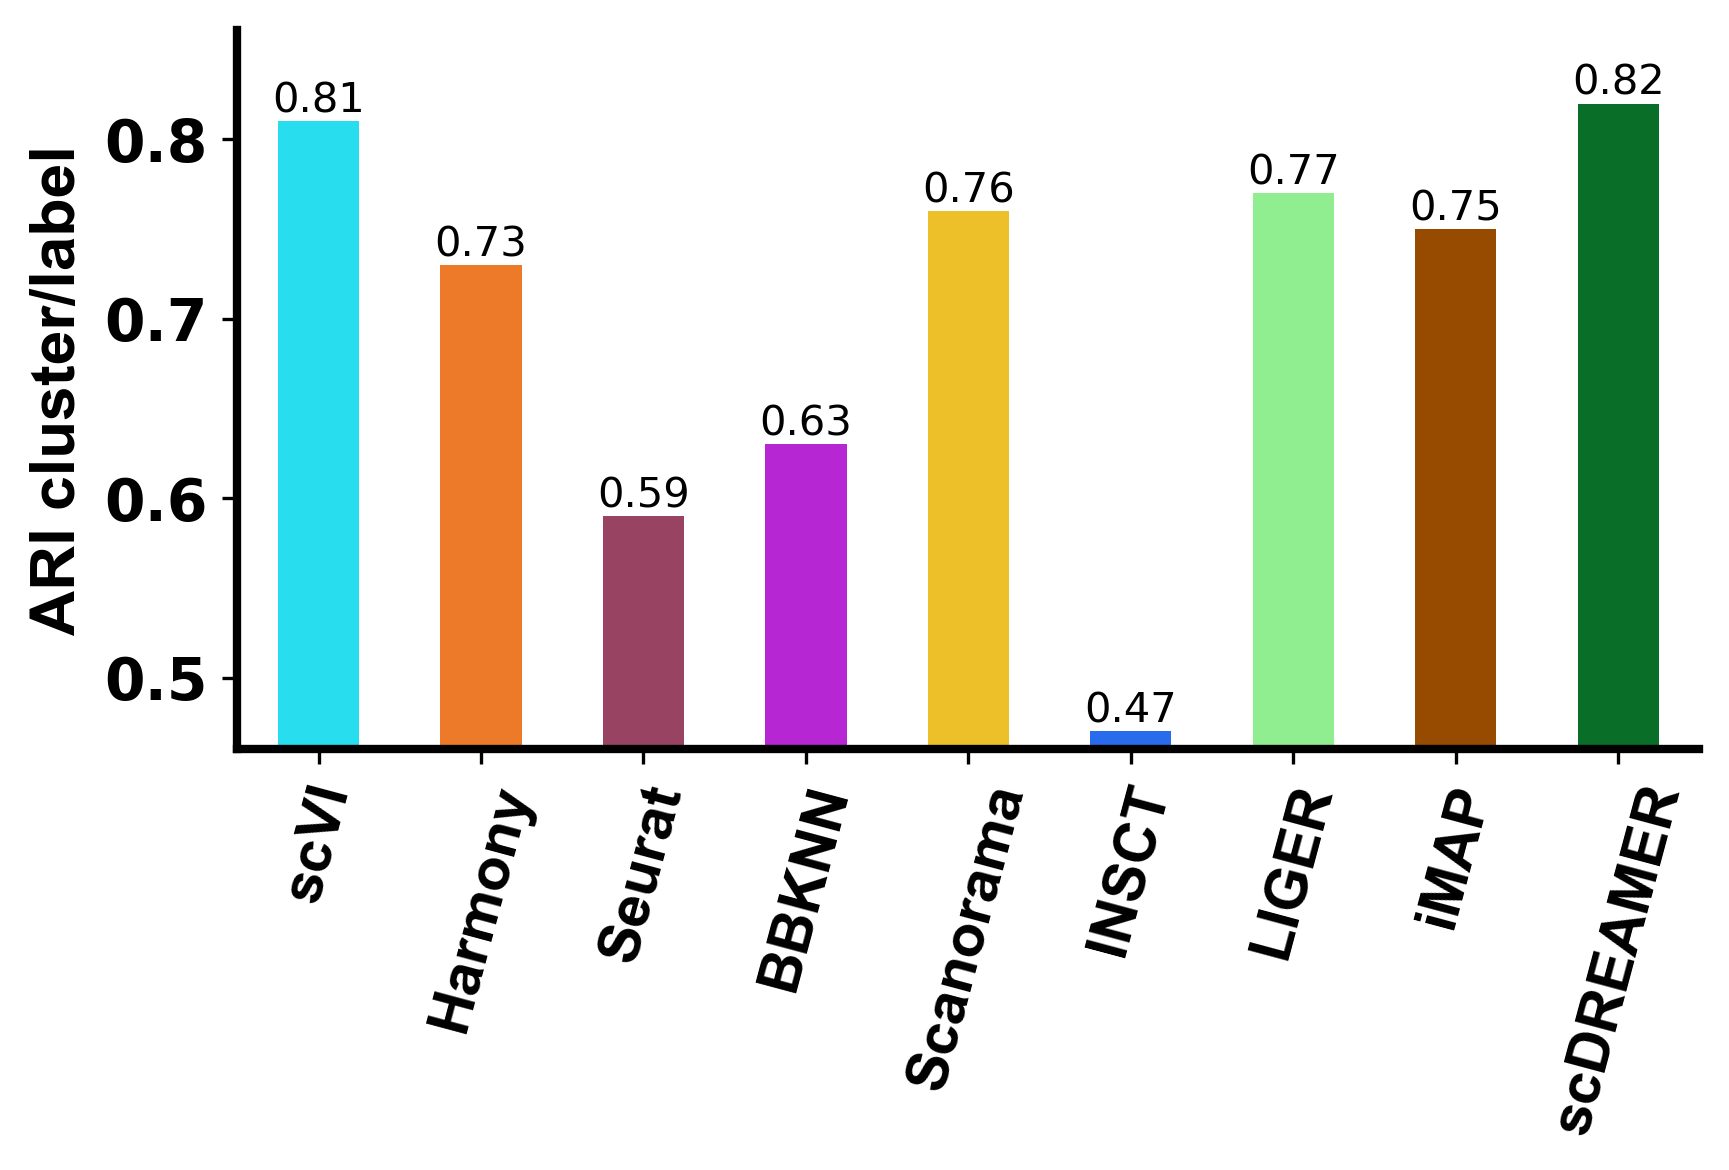

ASW label Immune_Human


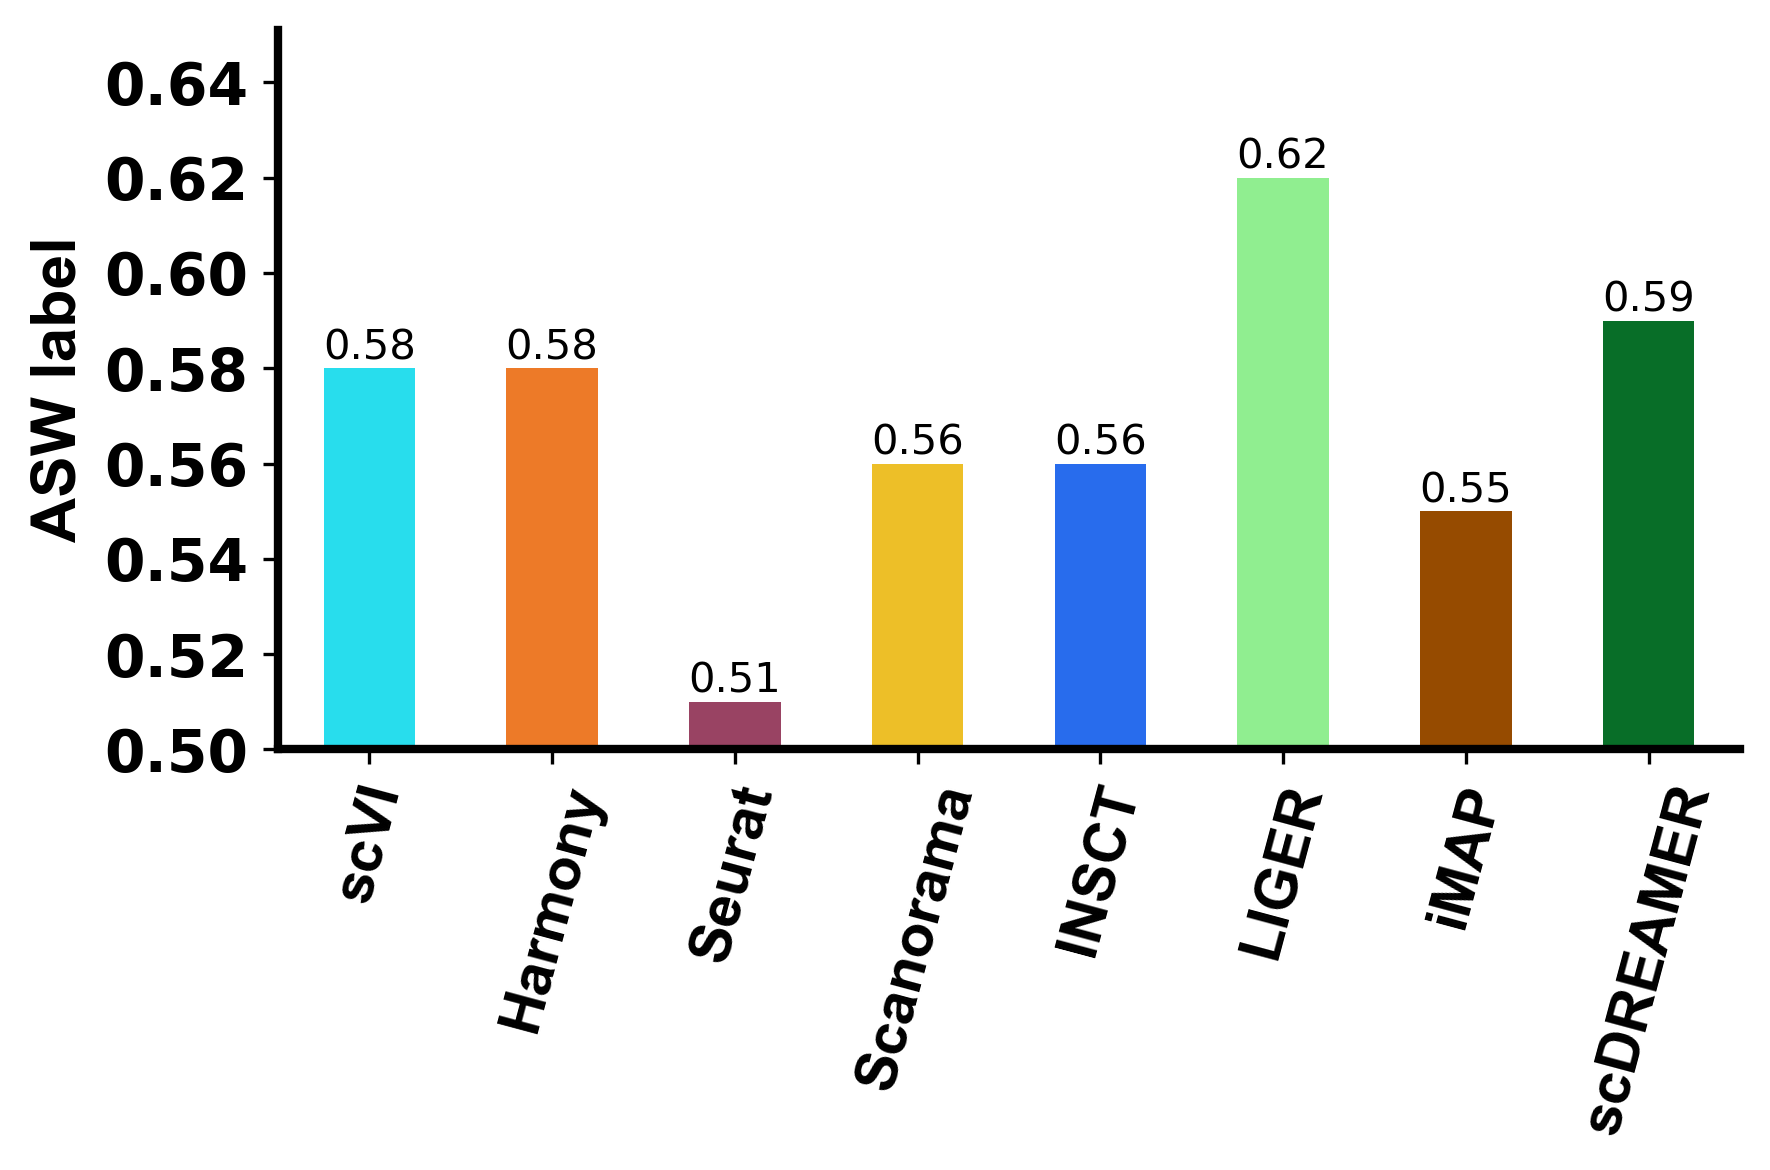

ASW label/batch Immune_Human


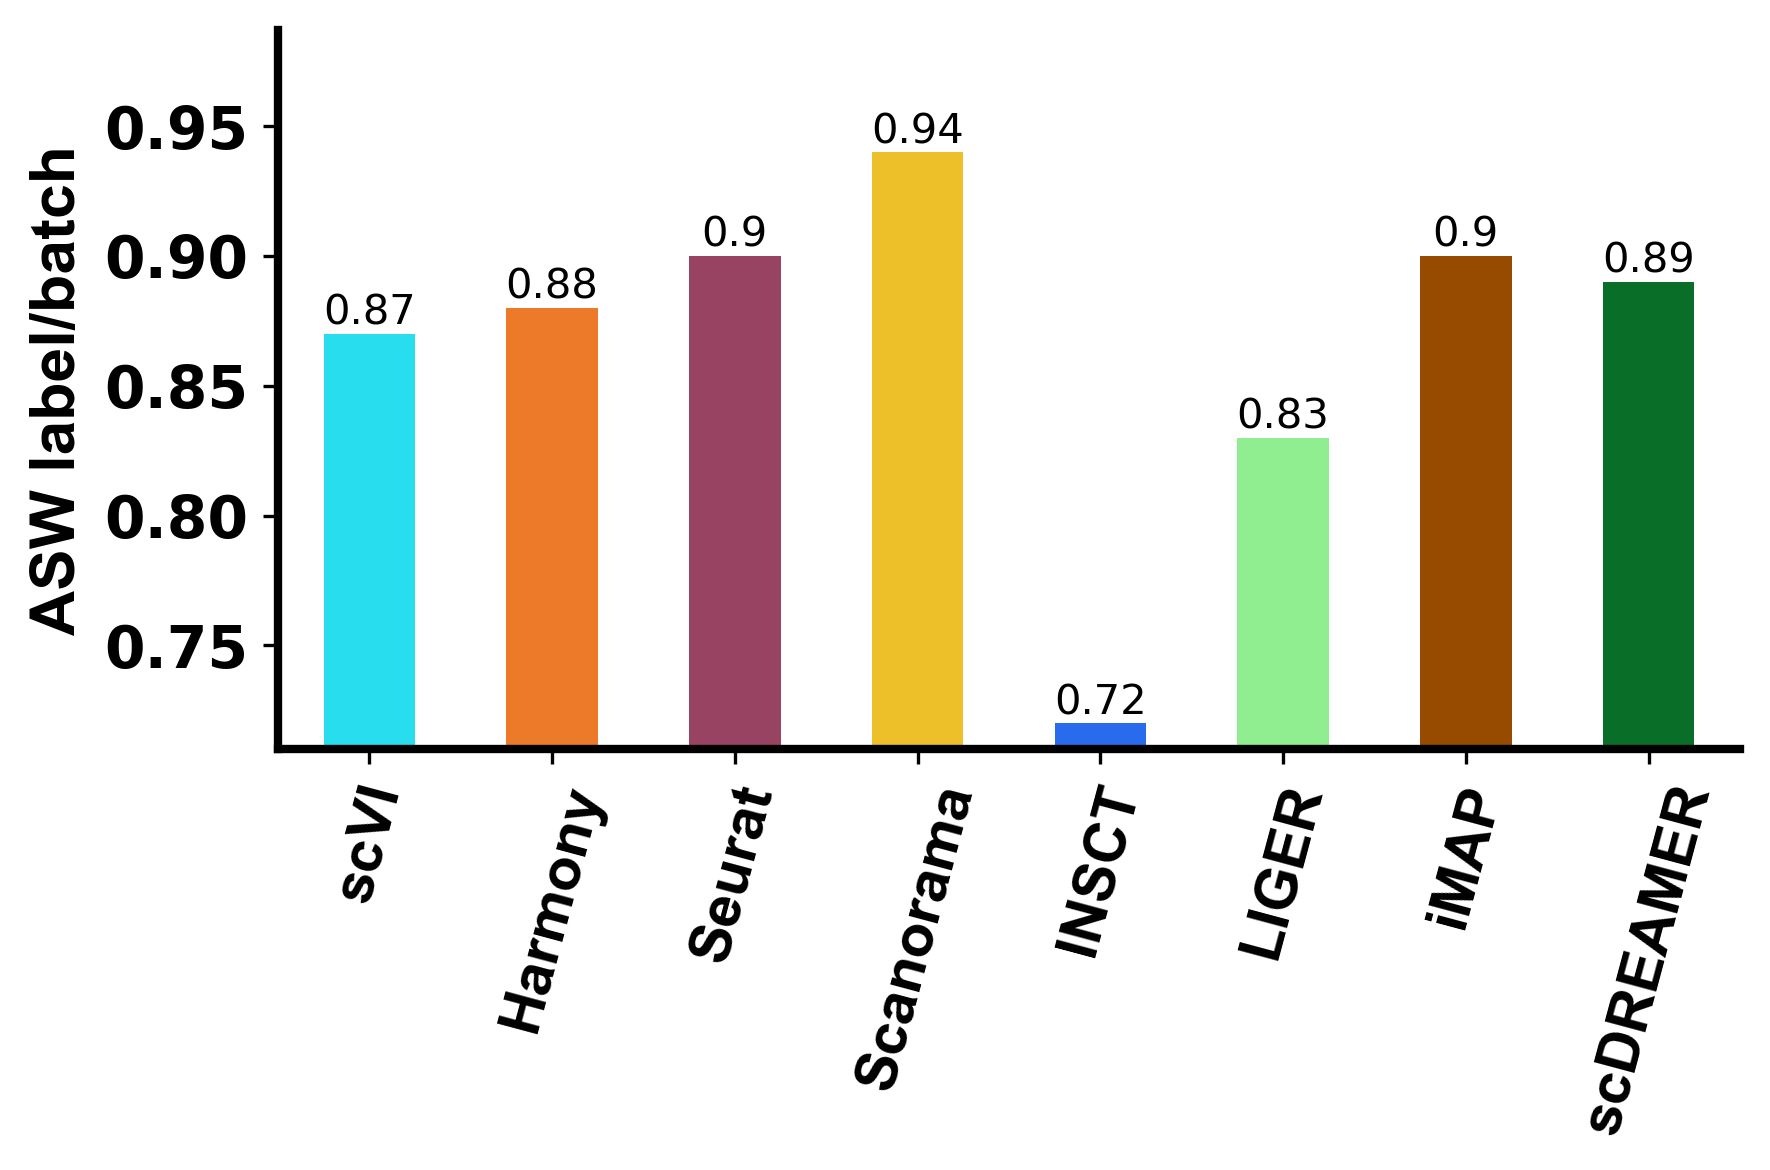

PCR batch Immune_Human


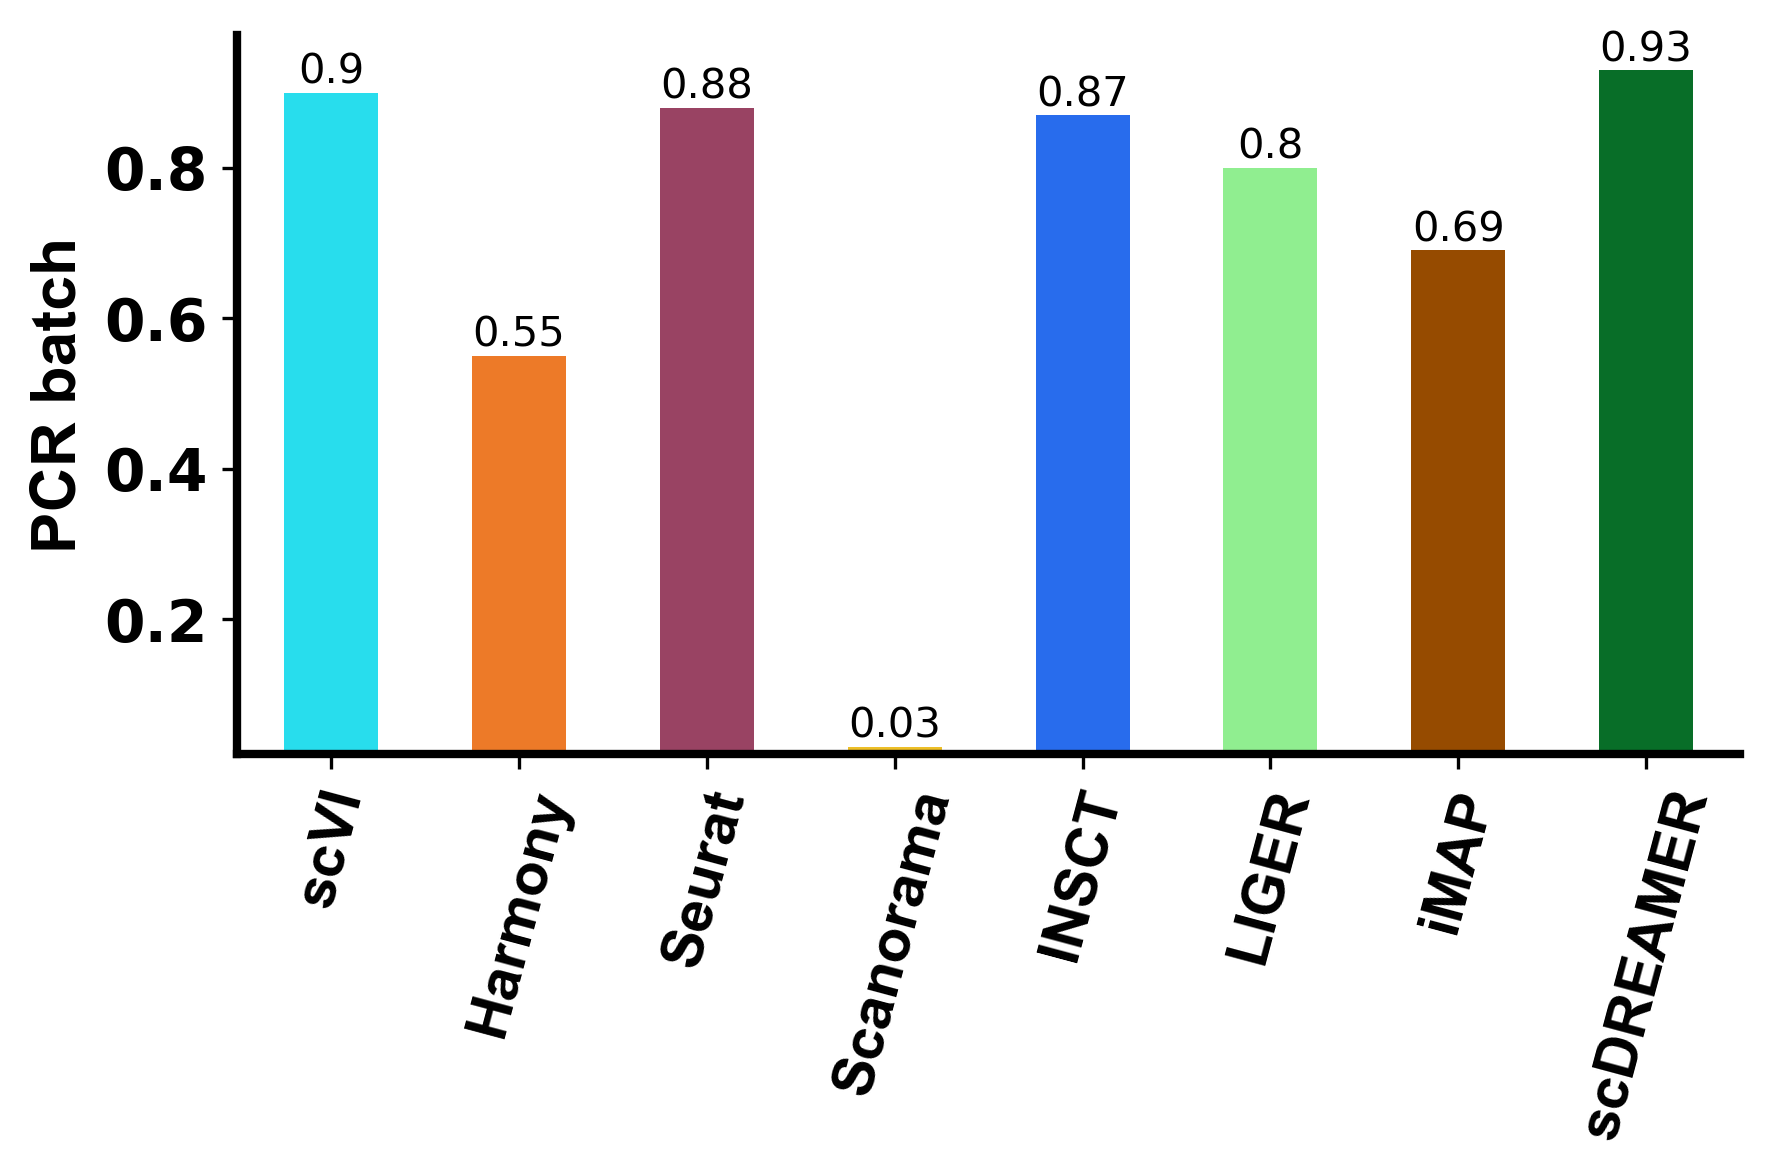

isolated f1 score Immune_Human


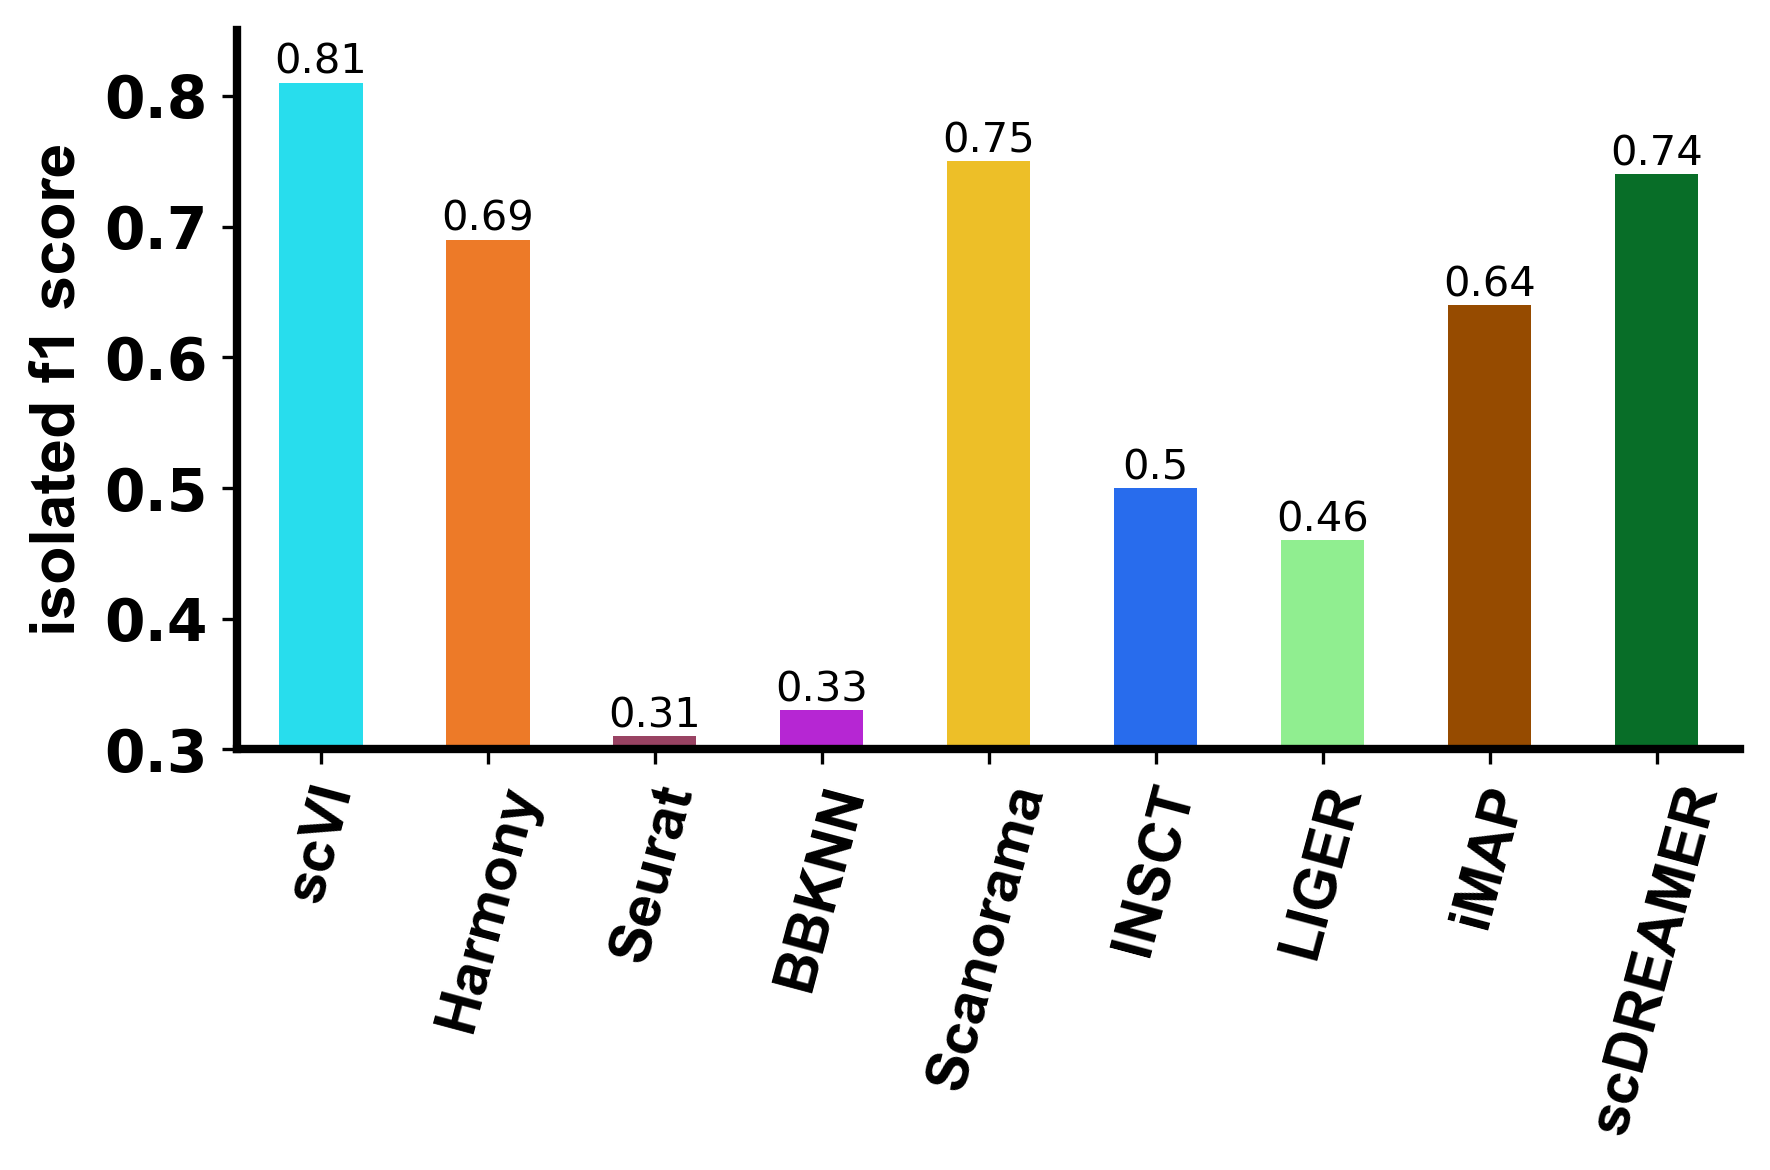

isolated silhouette coefficient Immune_Human


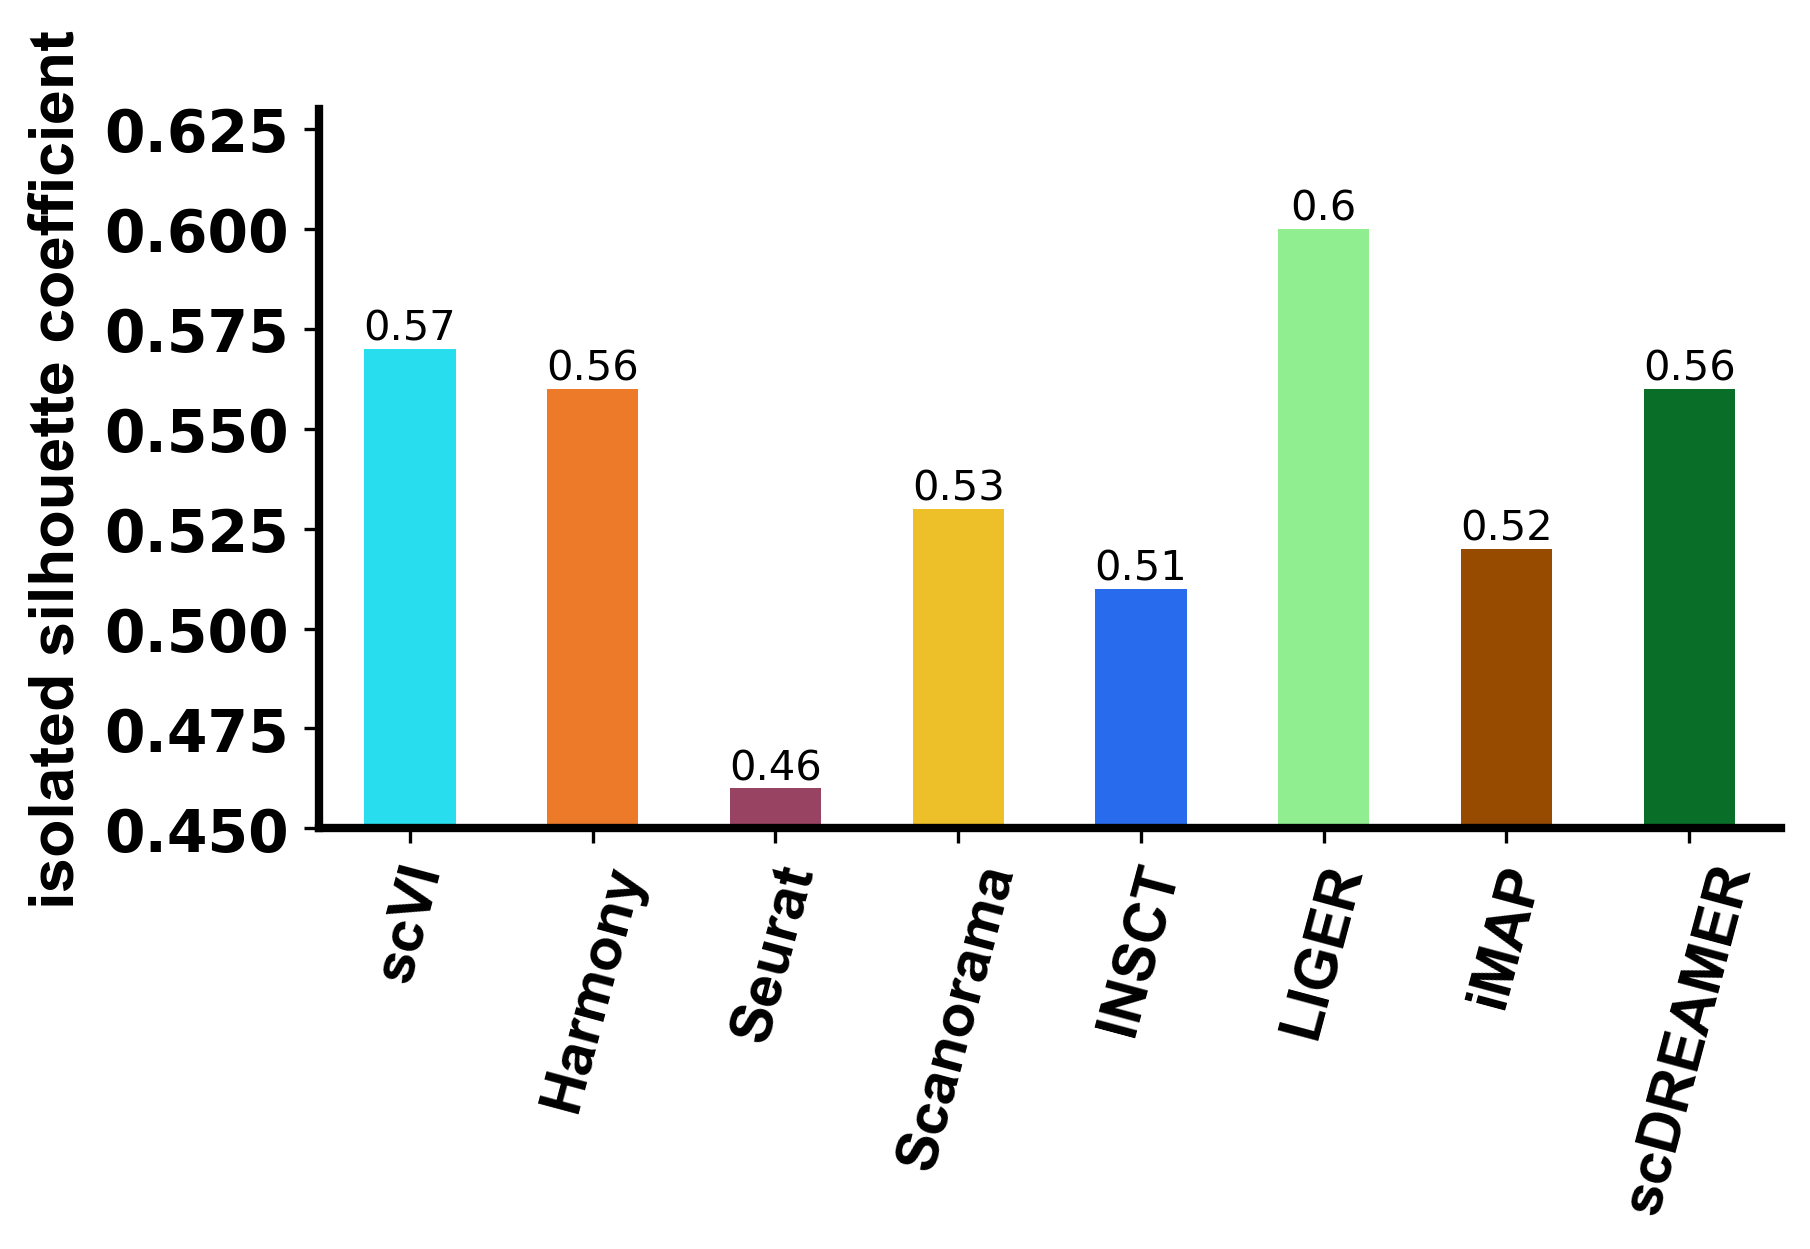

graph connectivity Immune_Human


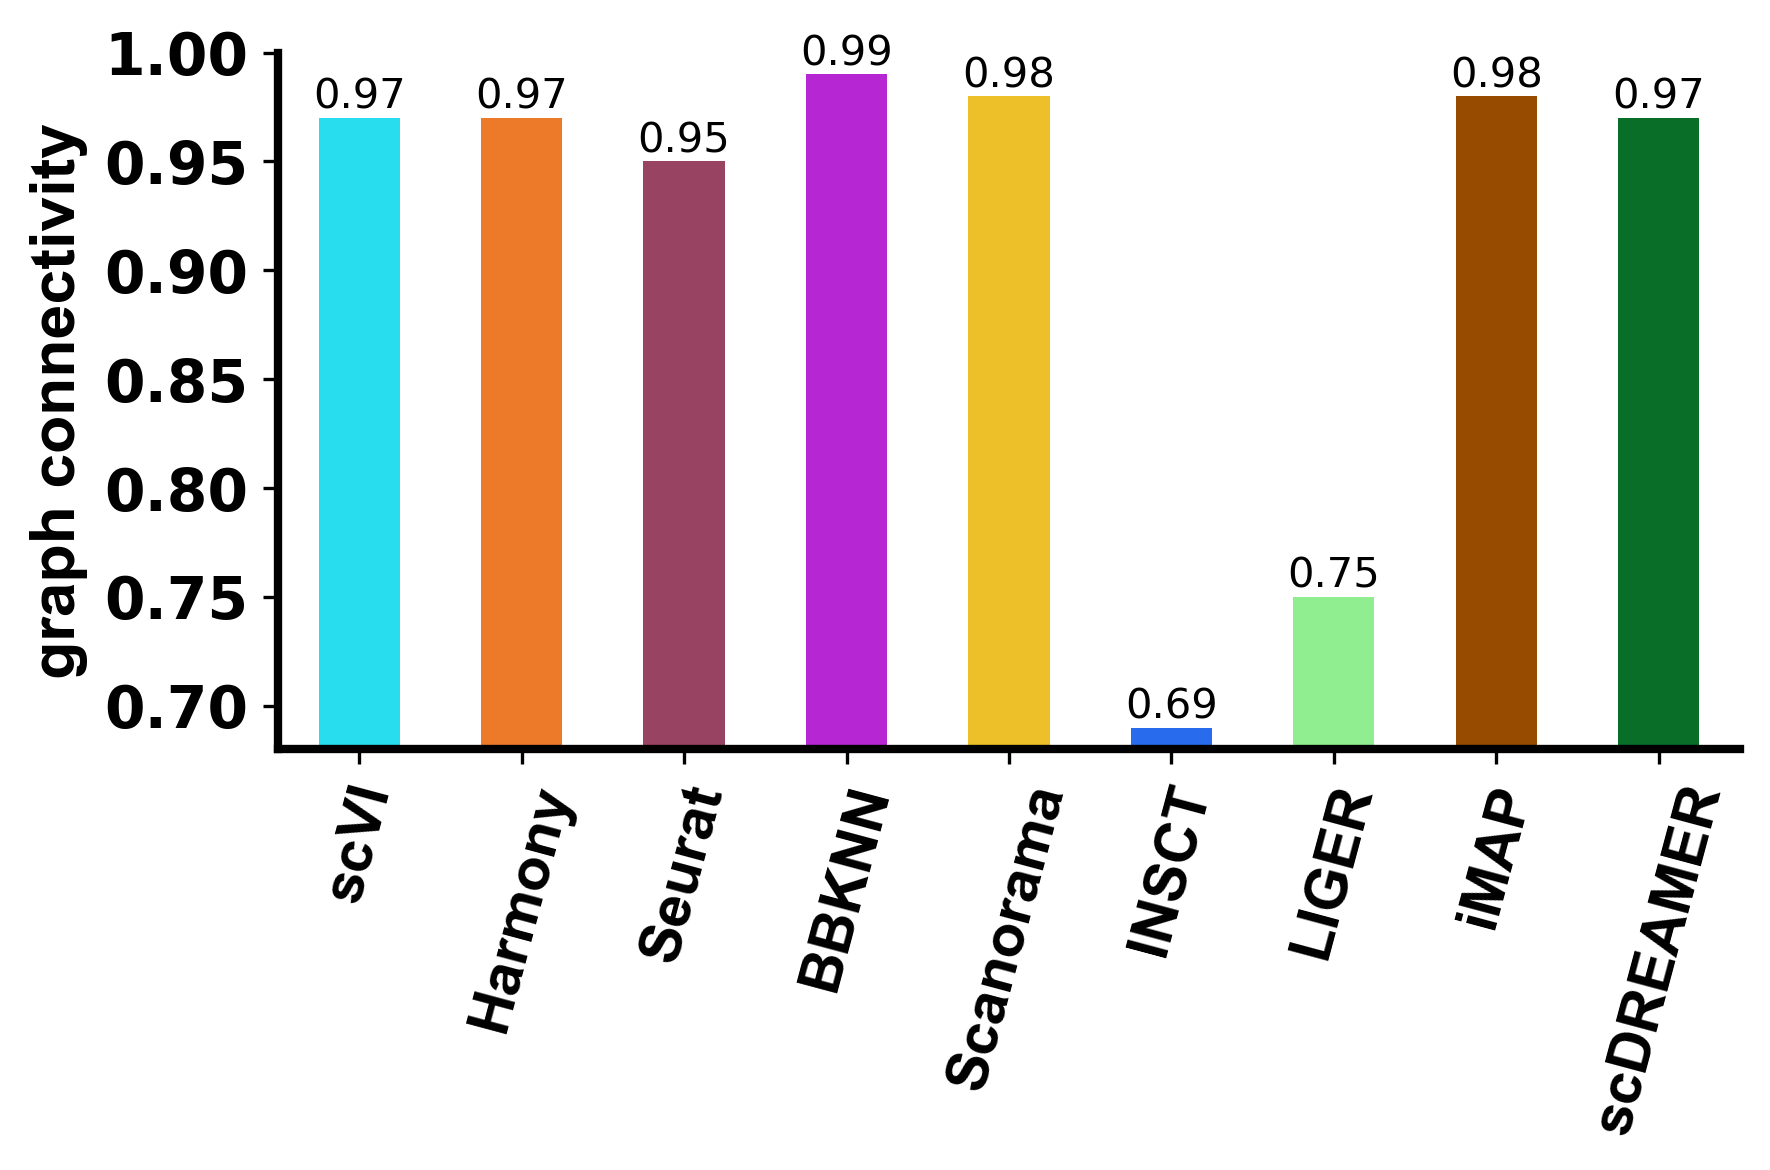

kBET Immune_Human


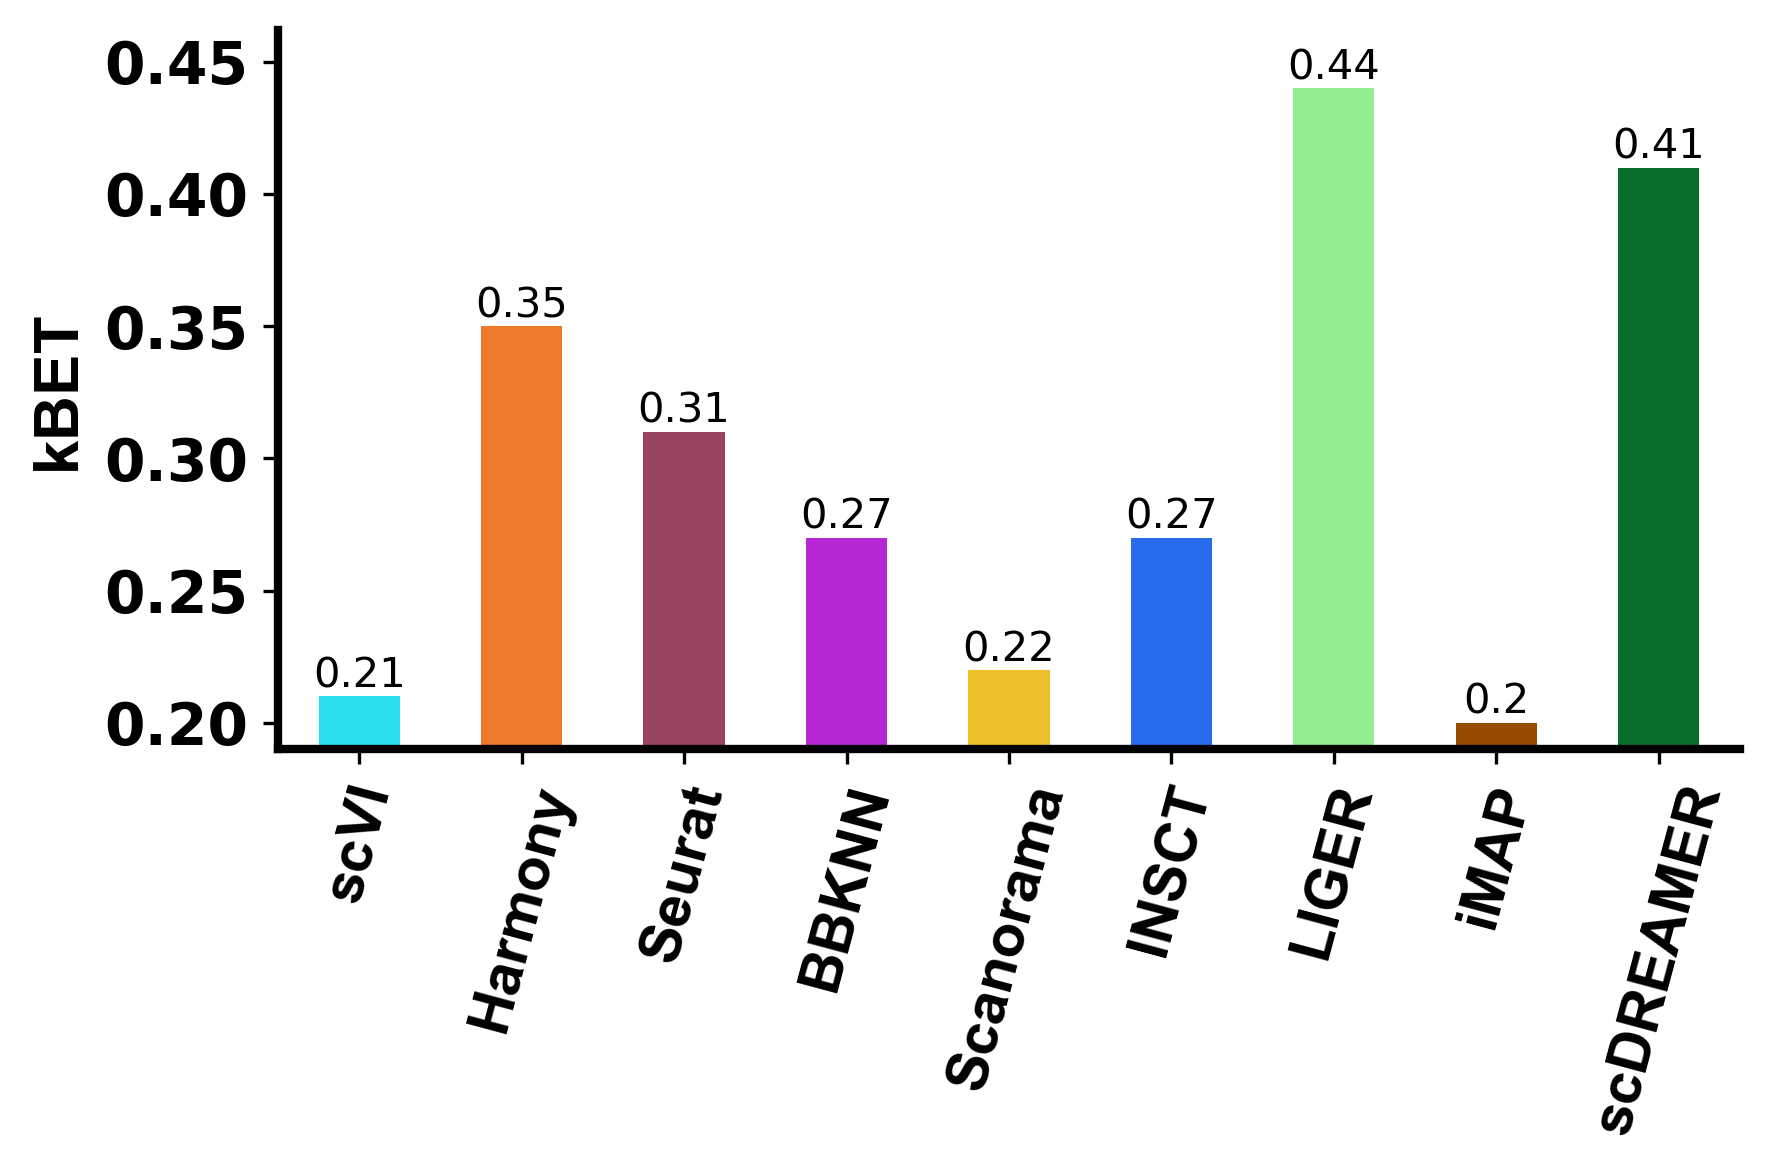

In [9]:
dataset = 'Immune_Human'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  ASW label/batch  \
Method                                                                        
scVI                    0.96               0.98       0.64             0.88   
Harmony                 0.95               0.97       0.65             0.92   
Seurat                  0.95               0.97       0.67             0.73   
BBKNN                   0.95               0.97        NaN              NaN   
Scanorama               0.79               0.55       0.55             0.95   
INSCT                   0.93               0.95       0.87             0.62   
LIGER                   0.91               0.90       0.70             0.86   
iMAP                    0.89               0.92       0.55             0.93   
scDREAMER               0.96               0.98       0.65             0.88   

           PCR batch  isolated f1 score  isolated silhouette coefficient  \
Method                                                                     
scVI            0.90               0.83                             0.56   
Harmony         0.68               0.15                             0.47   
Seurat          0.87               0.75                             0.50   
BBKNN            NaN               0.16                              NaN   
Scanorama       0.27               0.31                             0.51   
INSCT           0.61               0.27                             0.40   
LIGER           0.85               0.31                             0.46   
iMAP            0.75               0.05                             0.49   
scDREAMER       0.93               0.79                             0.52   

           graph connectivity  kBET    color  
Method                                        
scVI                     0.99  0.74  #28DDED  
Harmony                  0.98  0.86  #ED7A28  
Seurat                   0.98  0.34  #994363  
BBKNN                    1.00  0.29  #B626D3  
Scanorama                0.99  0.16  #EDBF28  
INSCT                    0.96  0.73  #286CED  
LIGER                    0.96  0.83  #90EE90  
iMAP                     0.91  0.79  #964B00  
scDREAMER                0.99  0.89  #086E28

NMI cluster/label Human_Retina


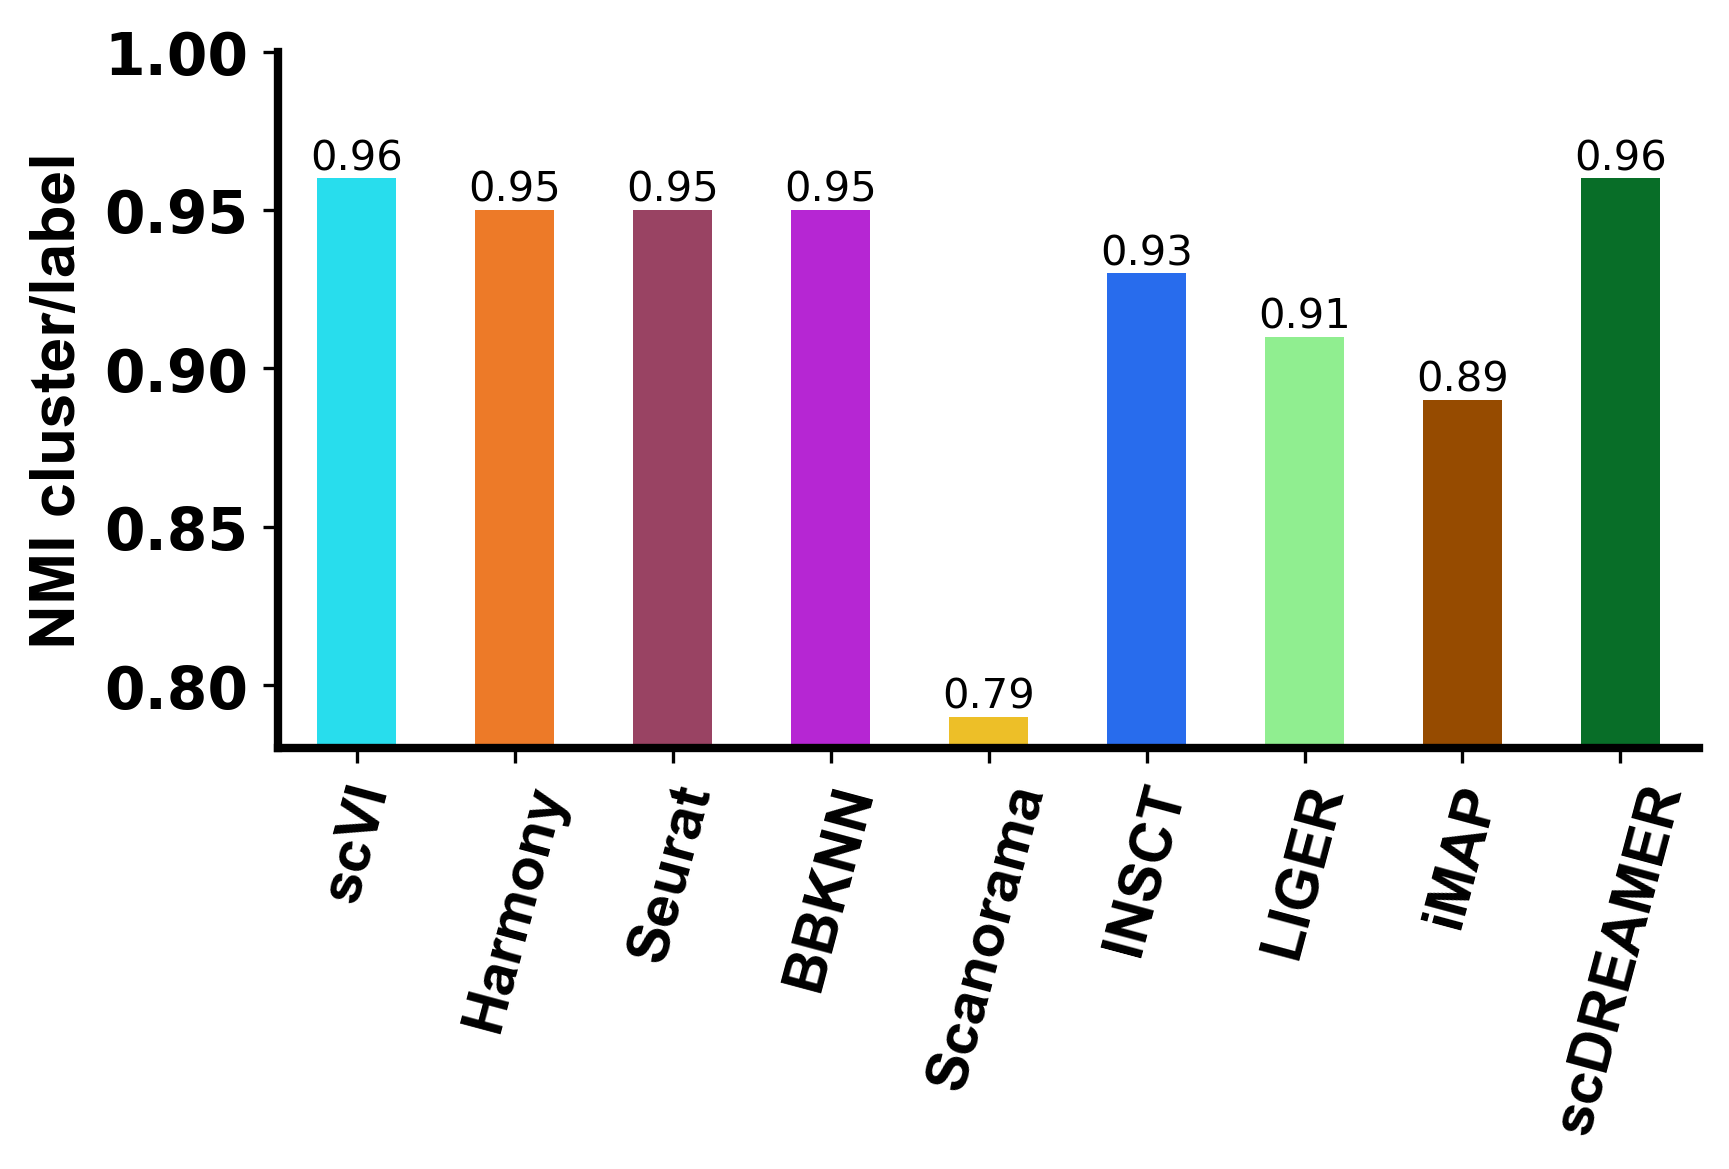

ARI cluster/label Human_Retina


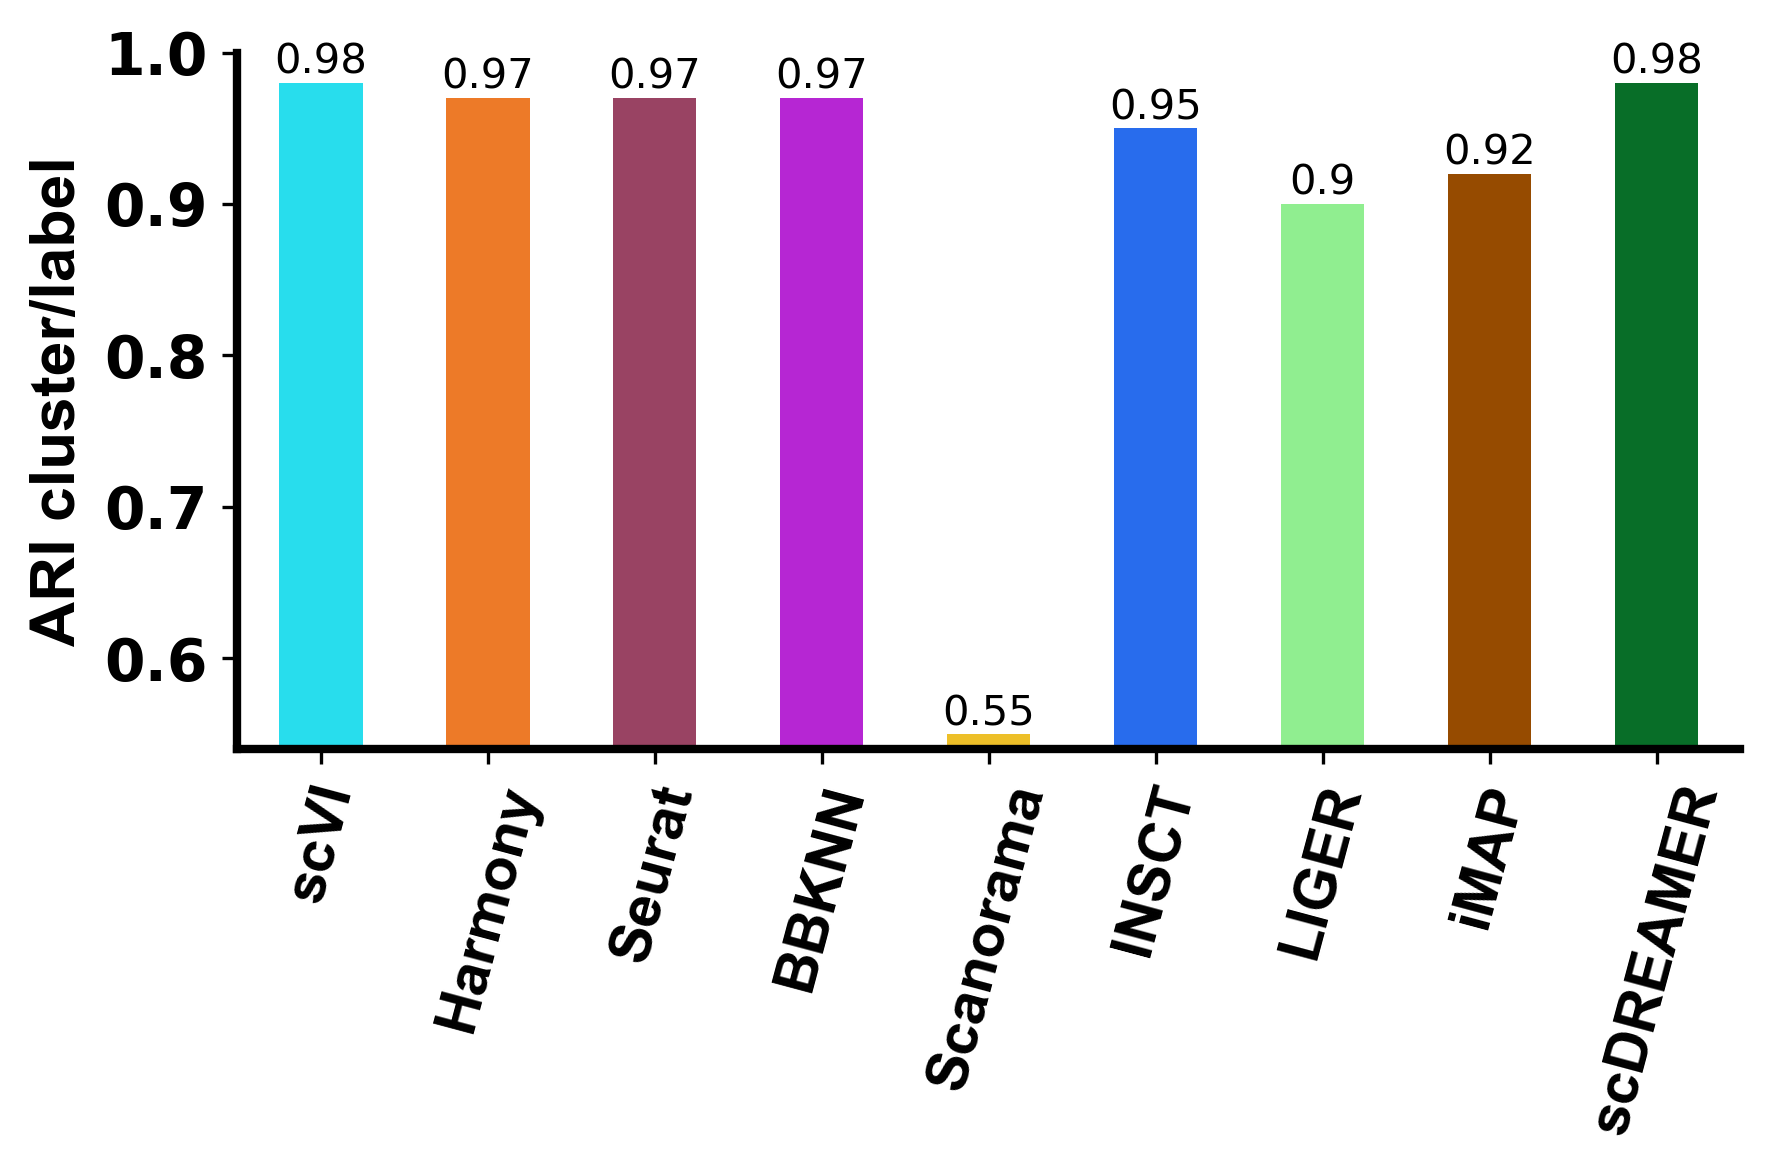

ASW label Human_Retina


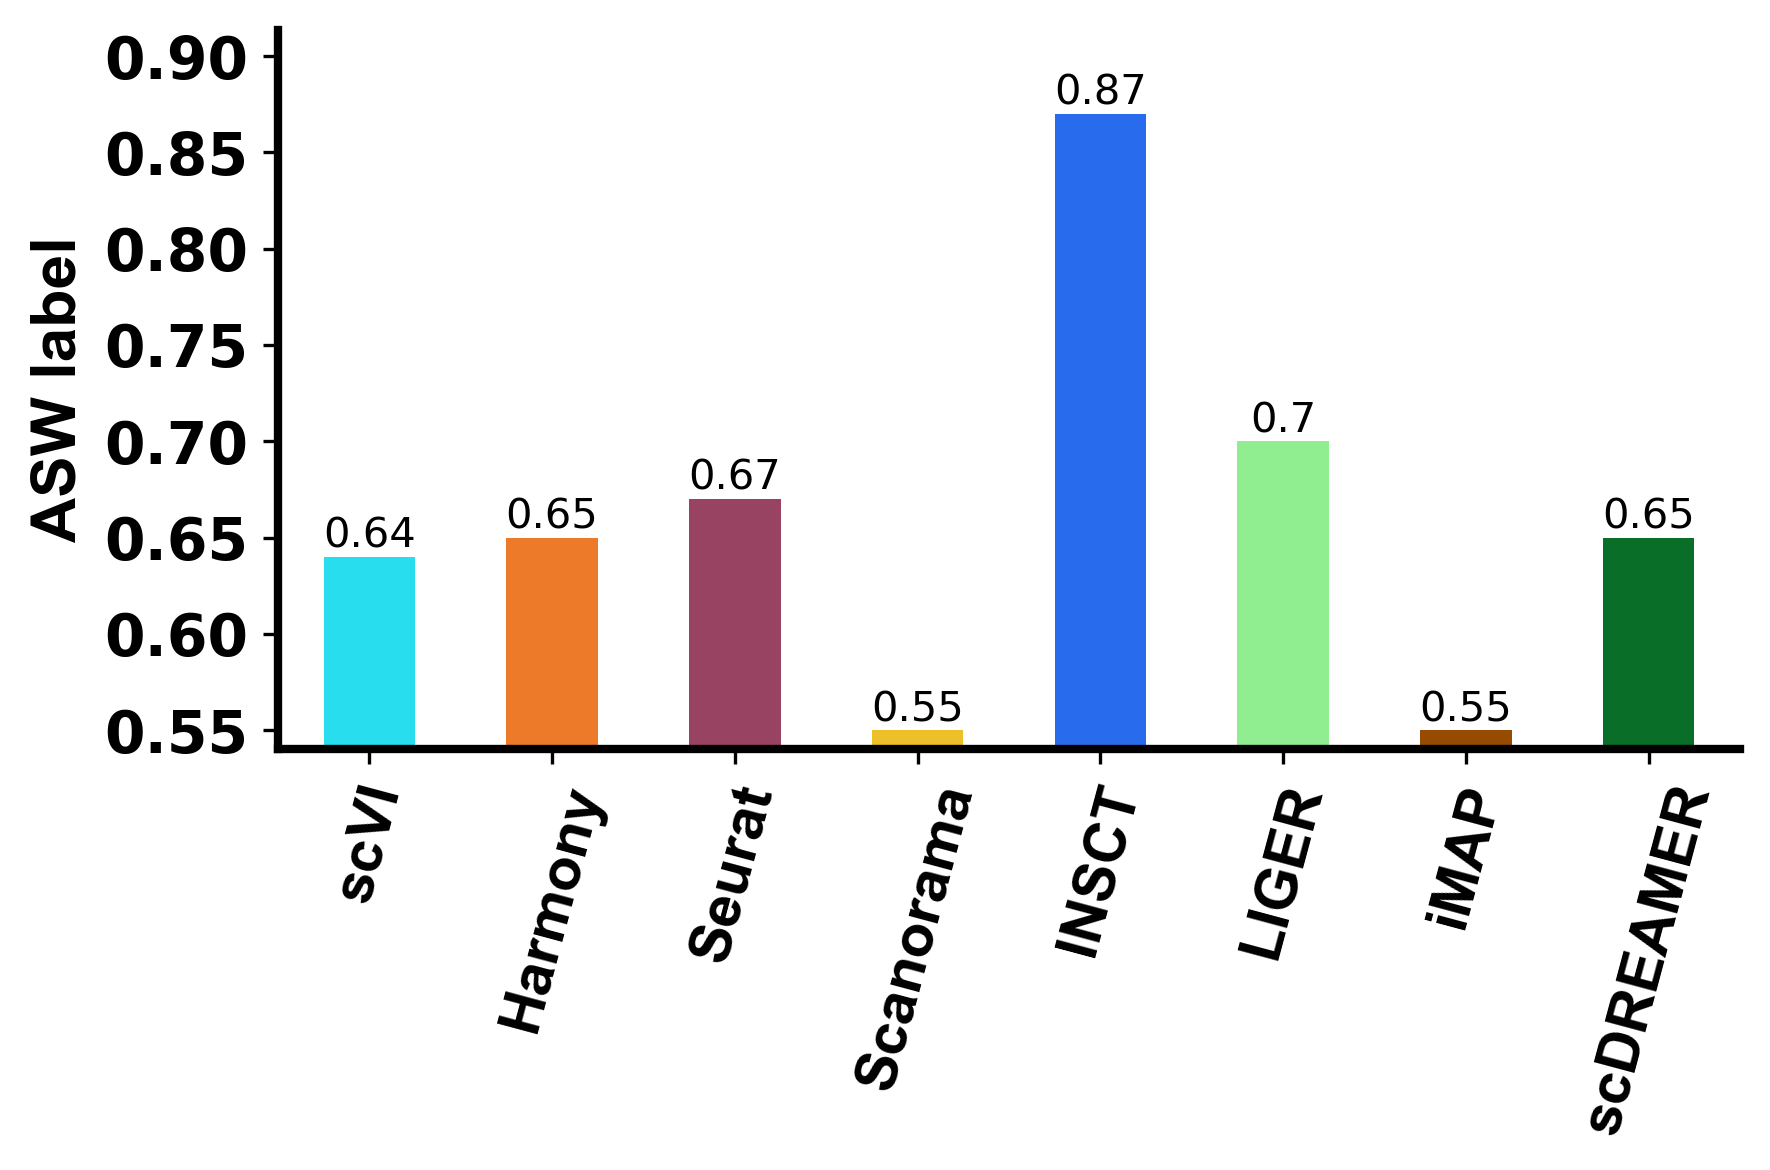

ASW label/batch Human_Retina


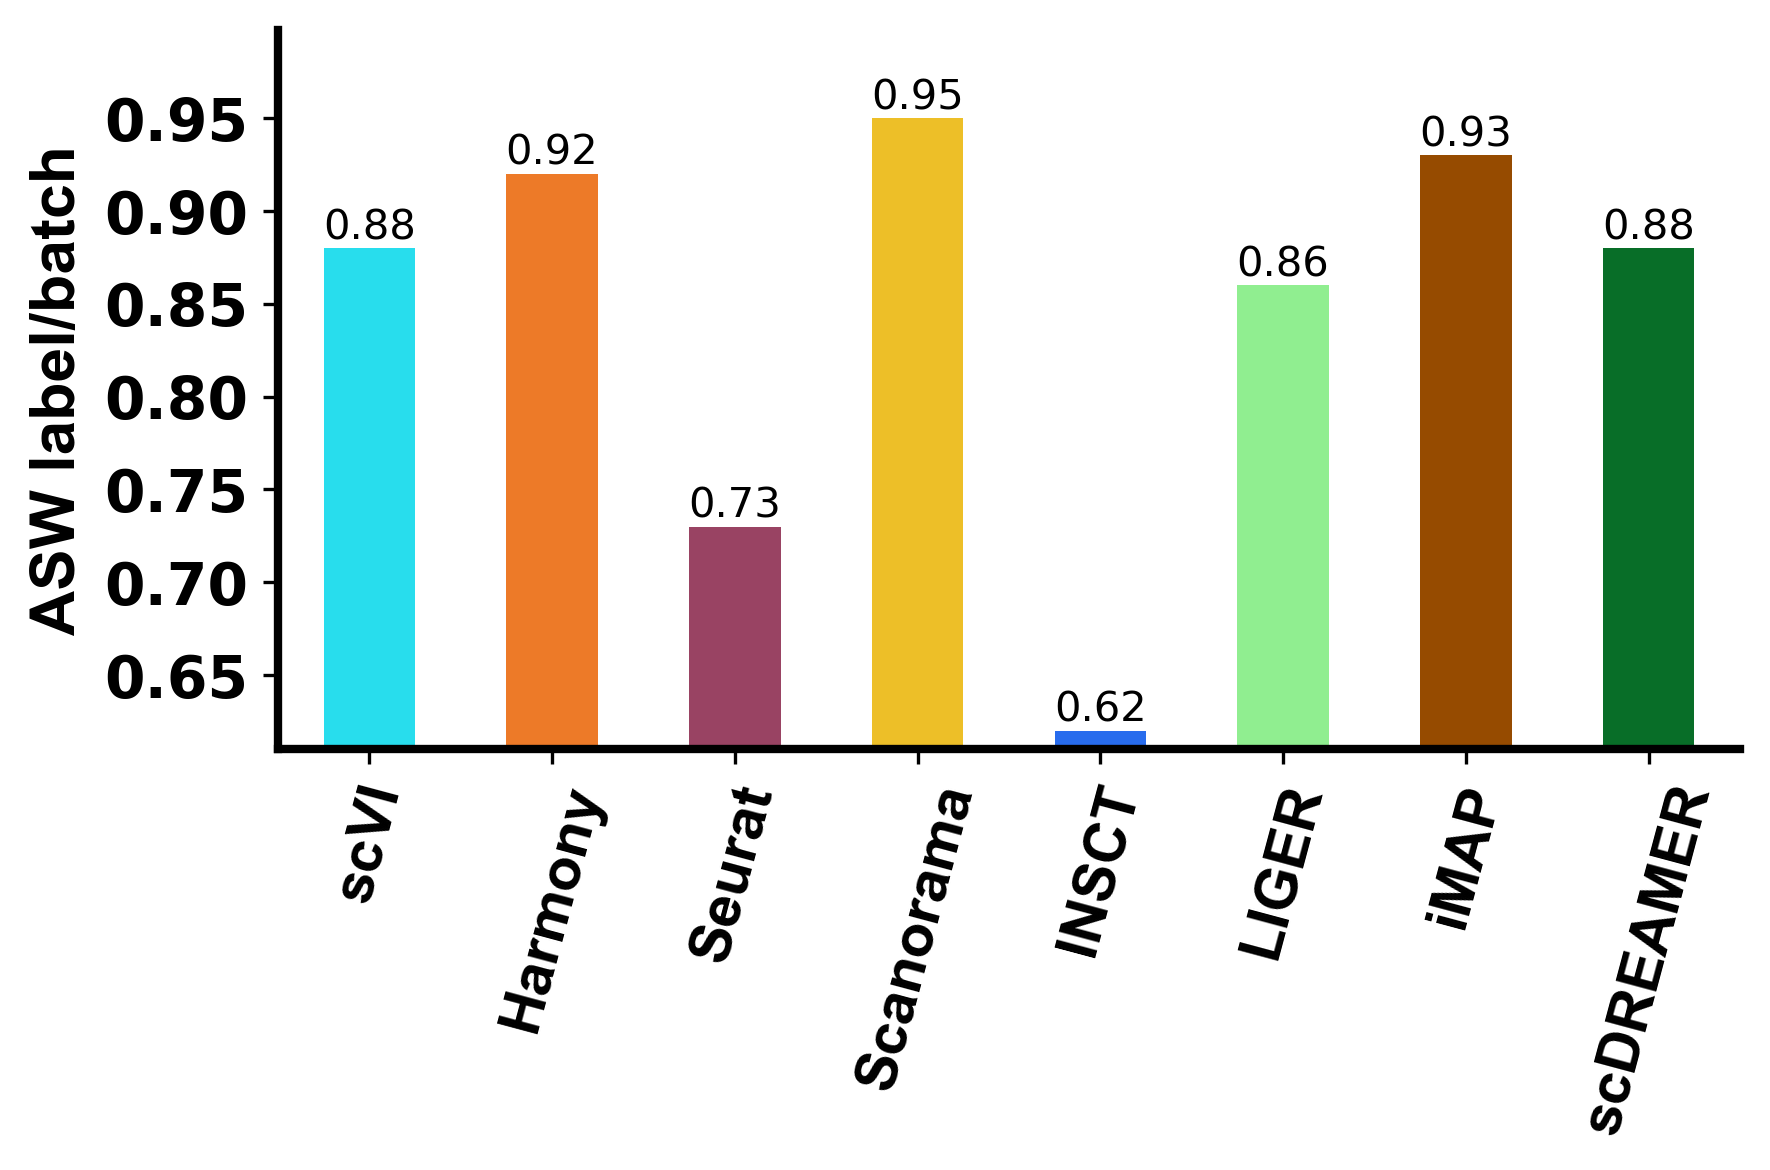

PCR batch Human_Retina


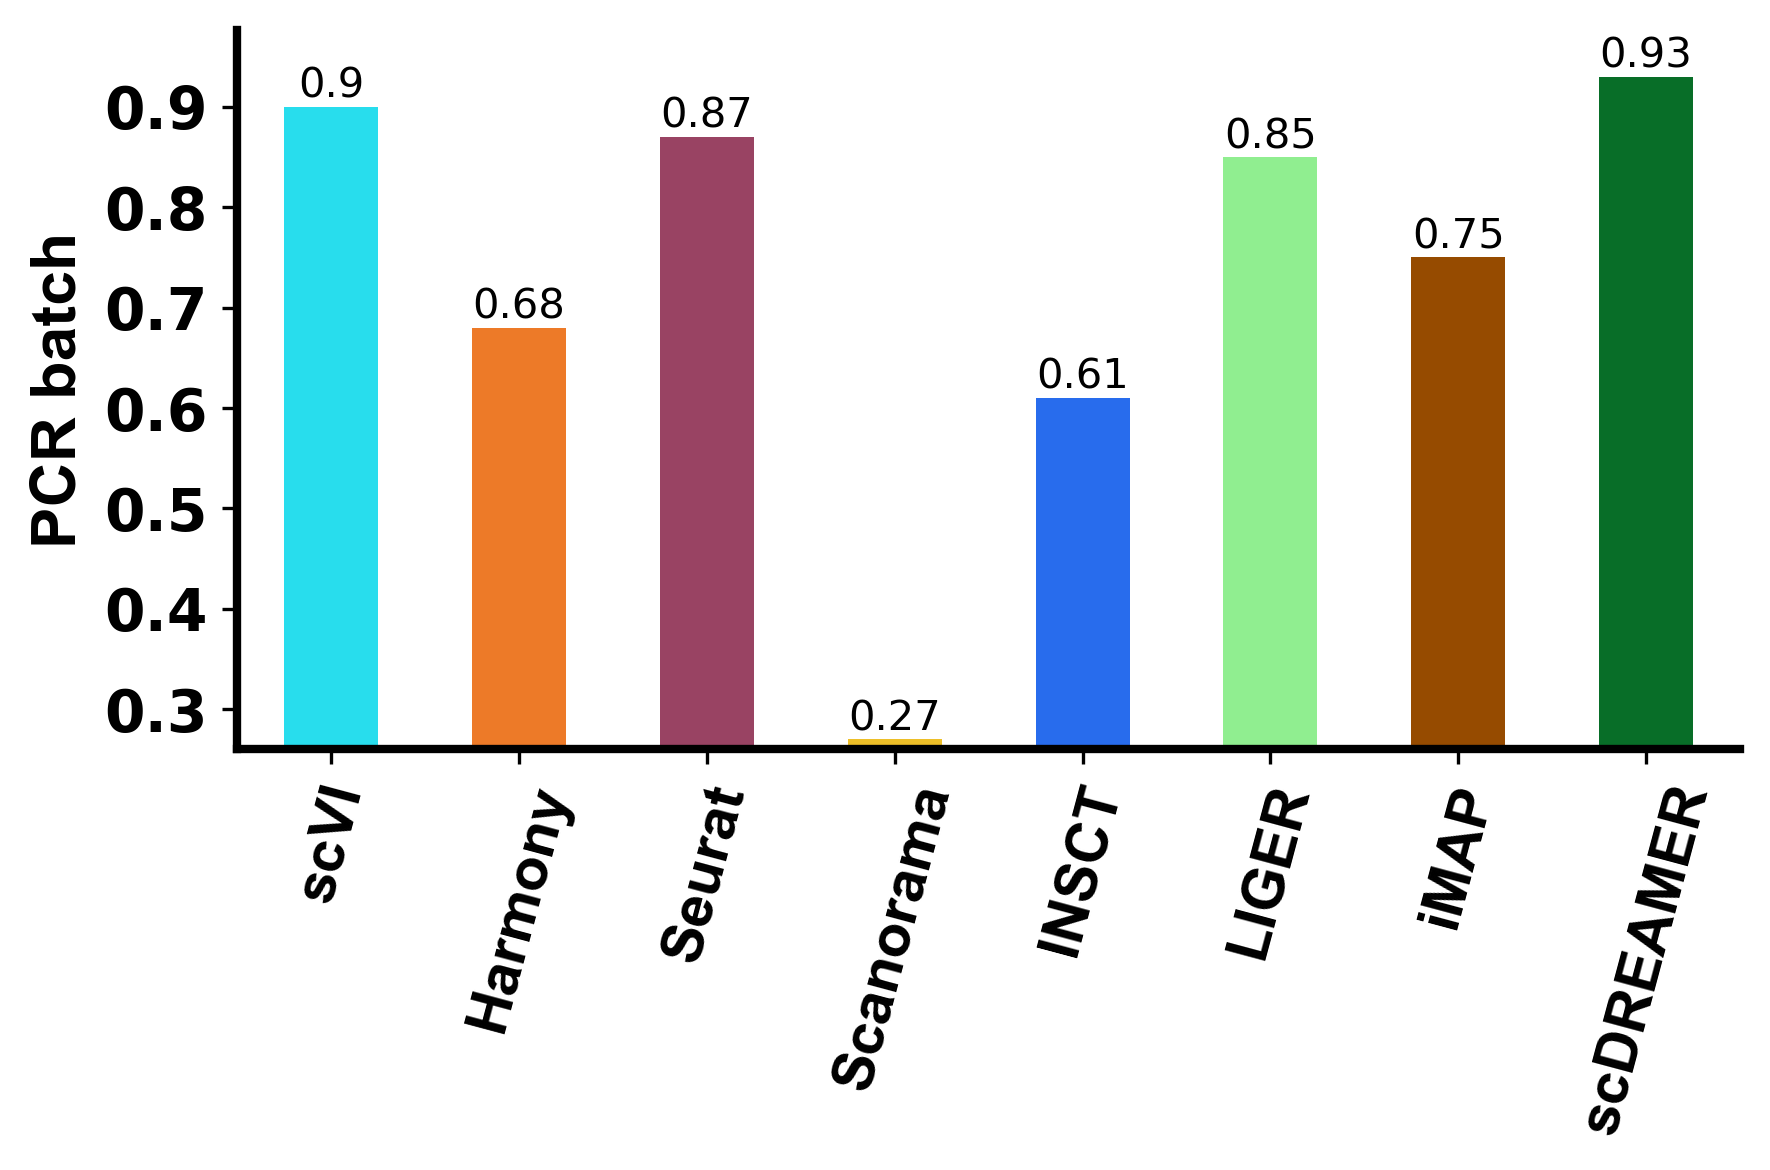

isolated f1 score Human_Retina


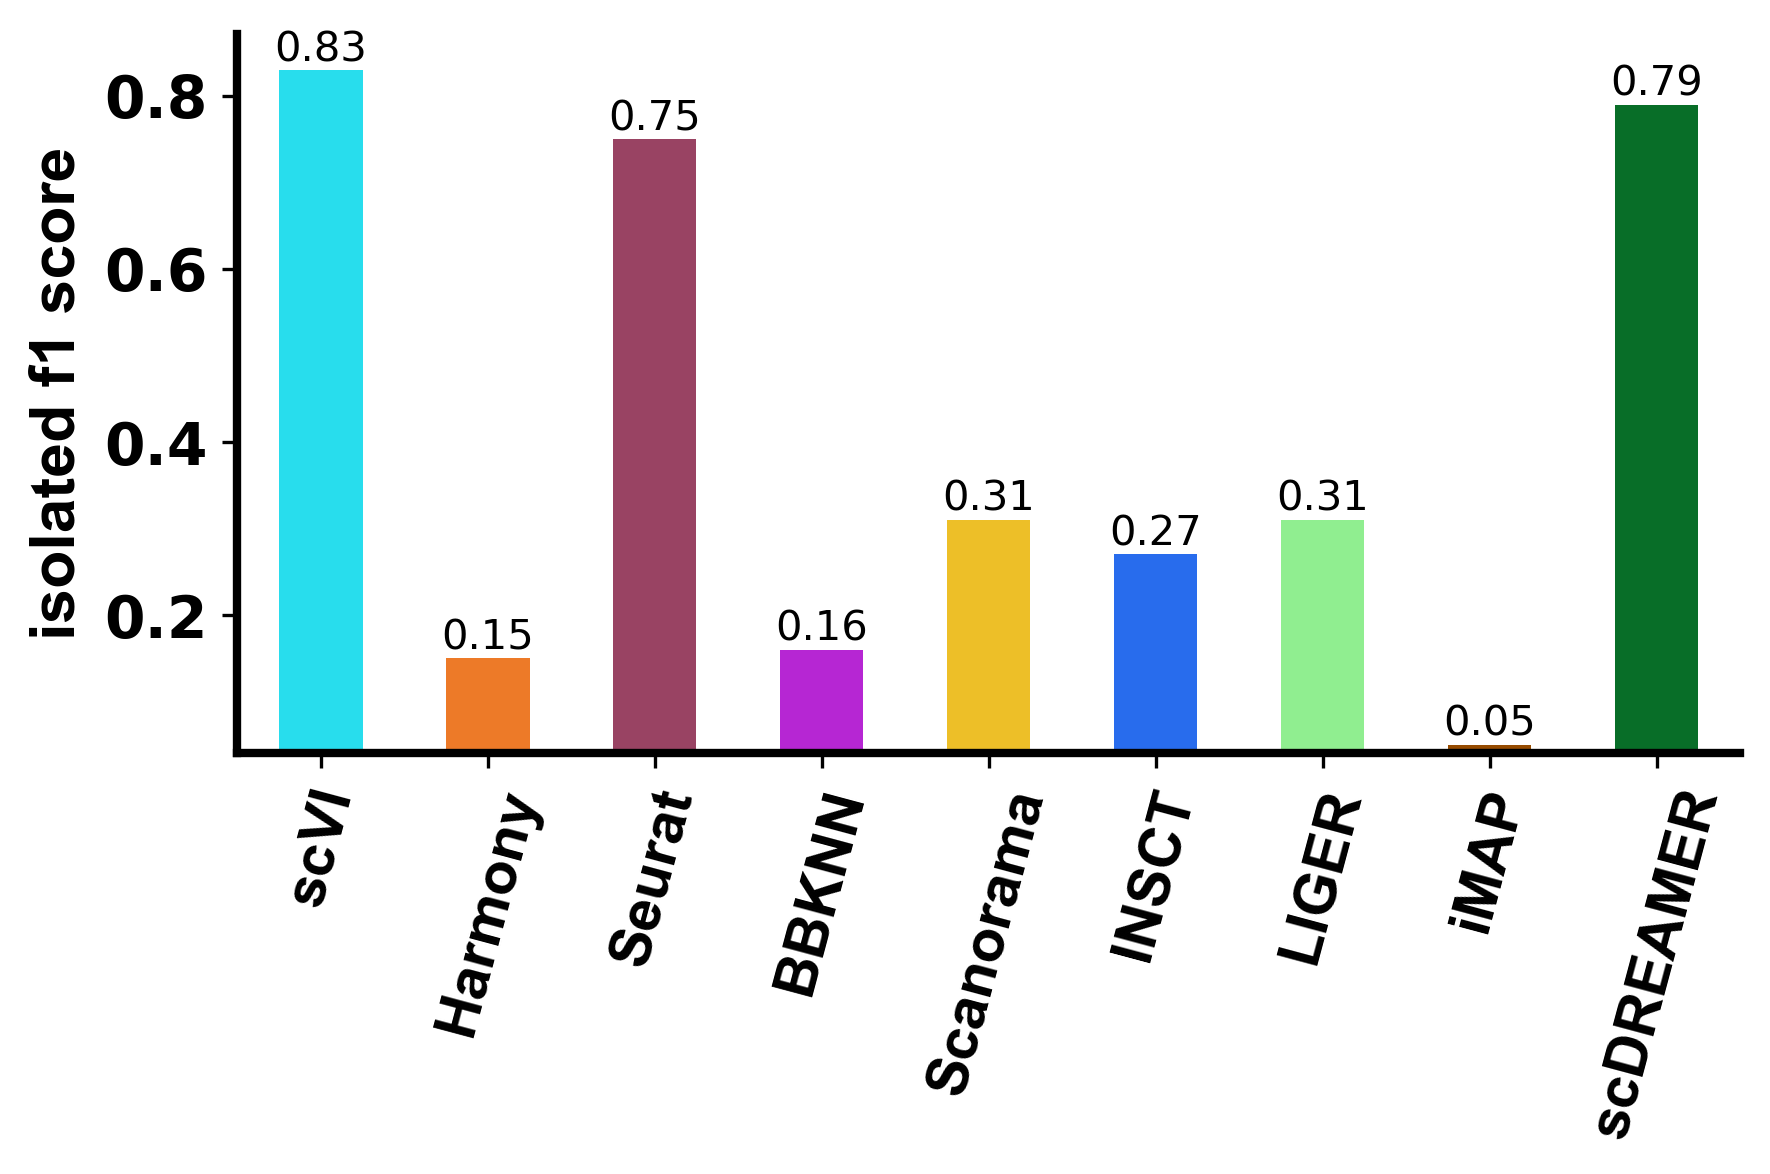

isolated silhouette coefficient Human_Retina


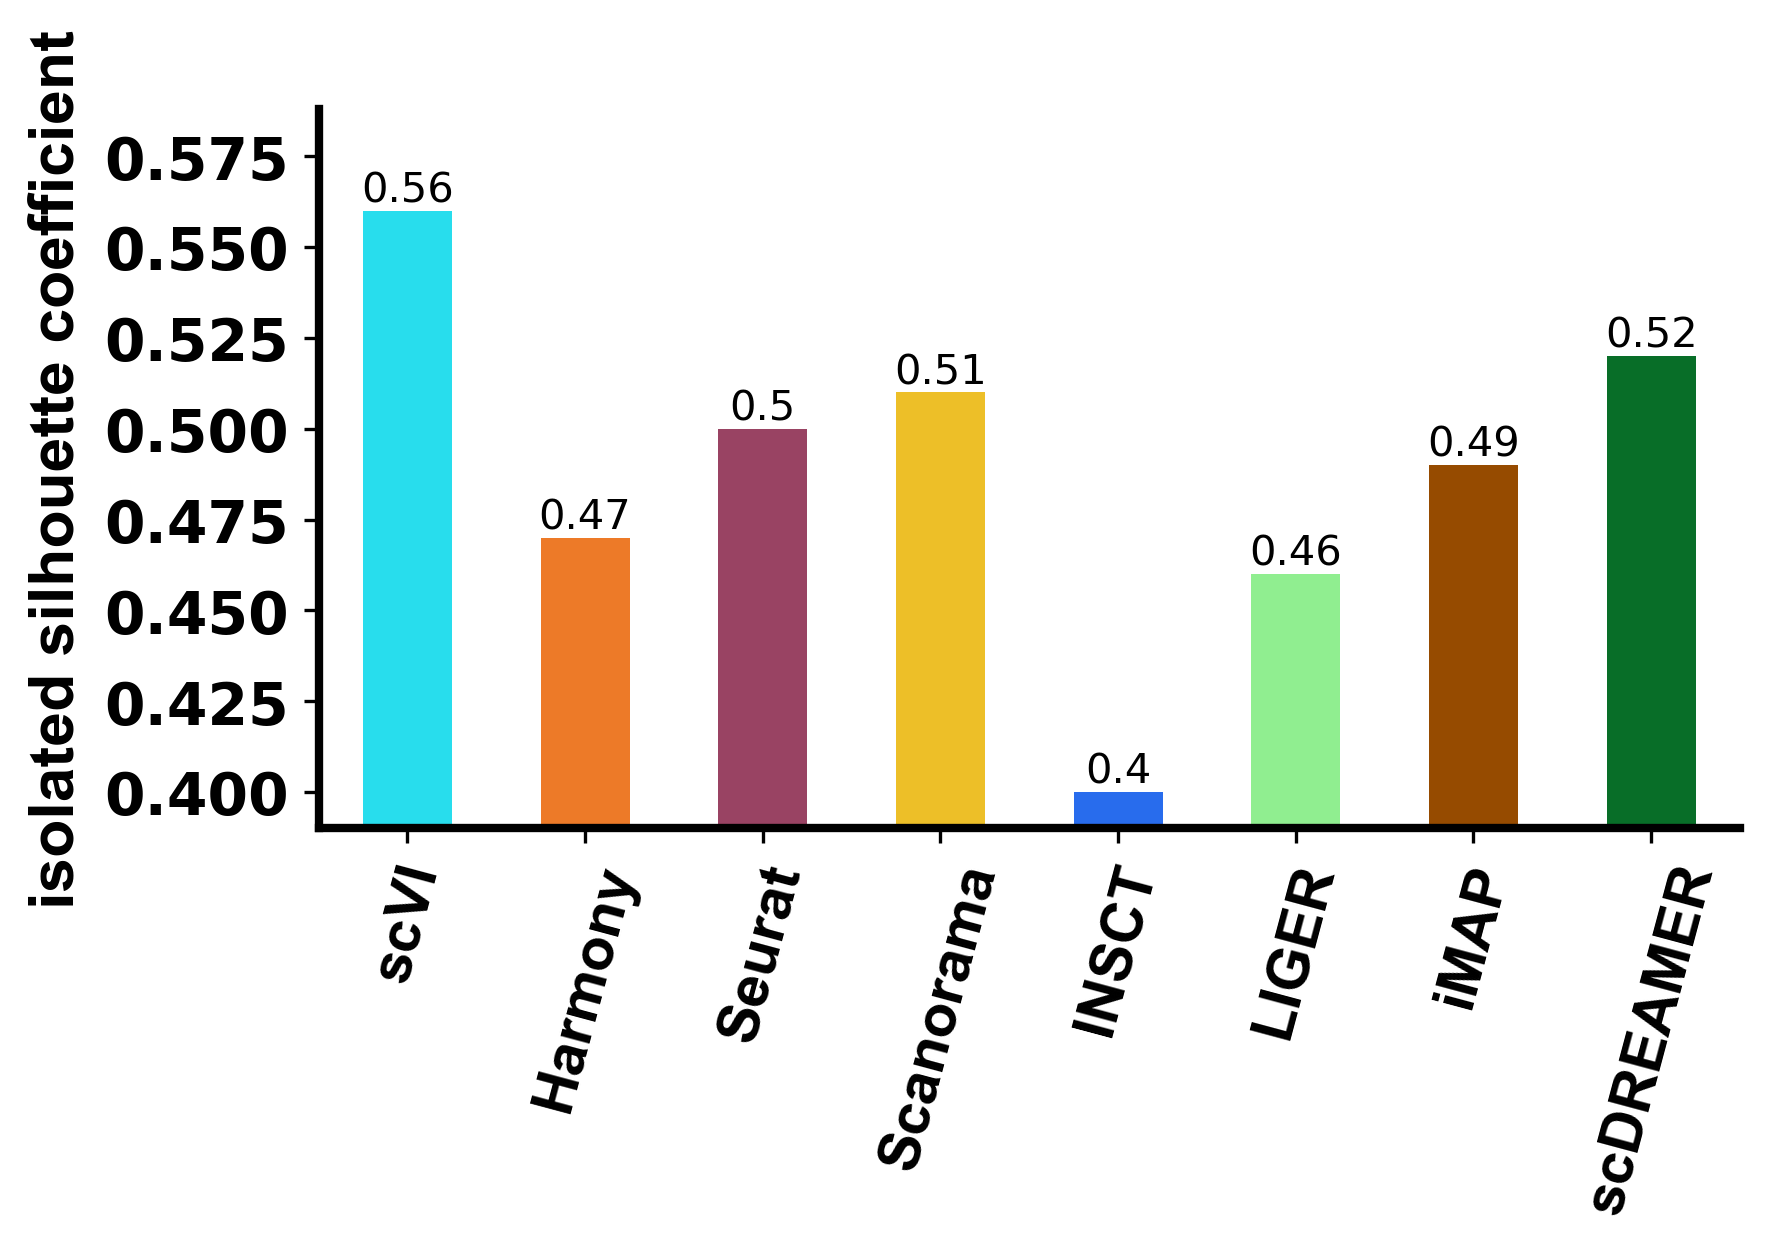

graph connectivity Human_Retina


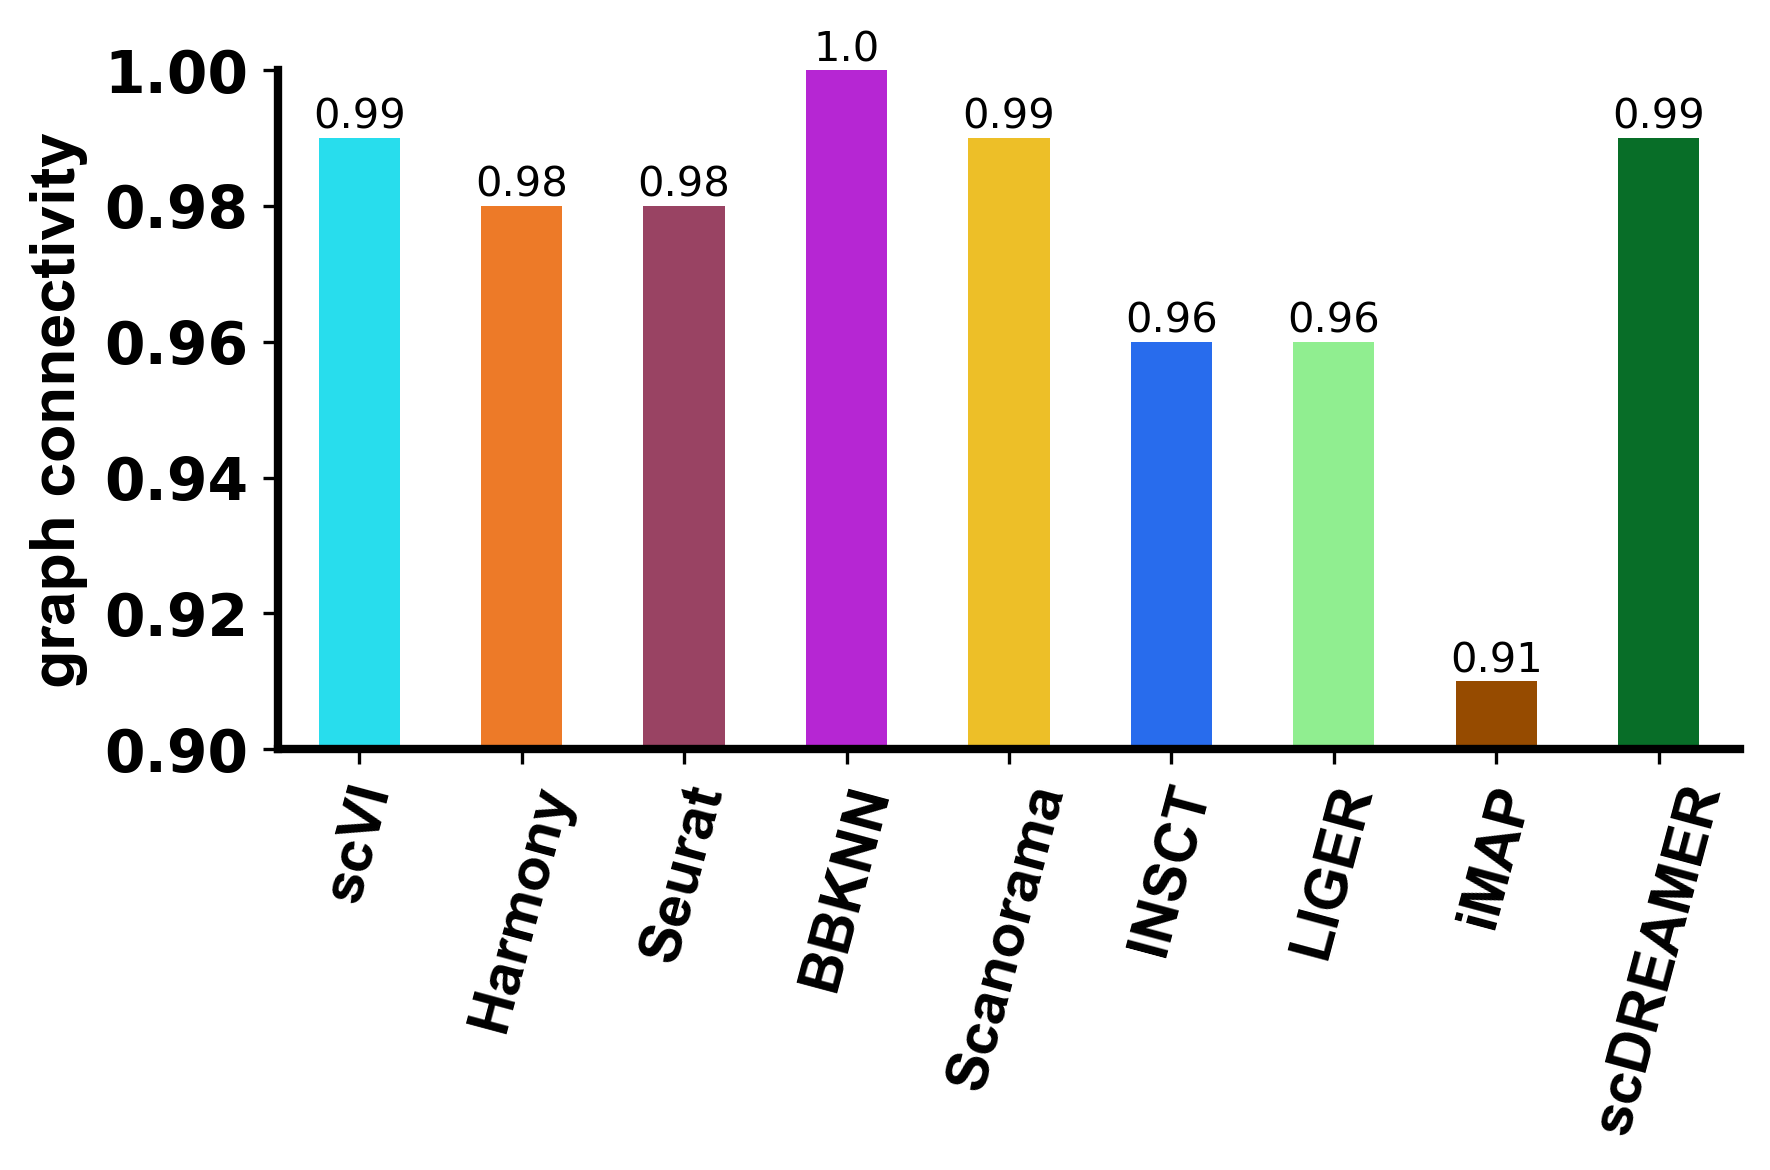

kBET Human_Retina


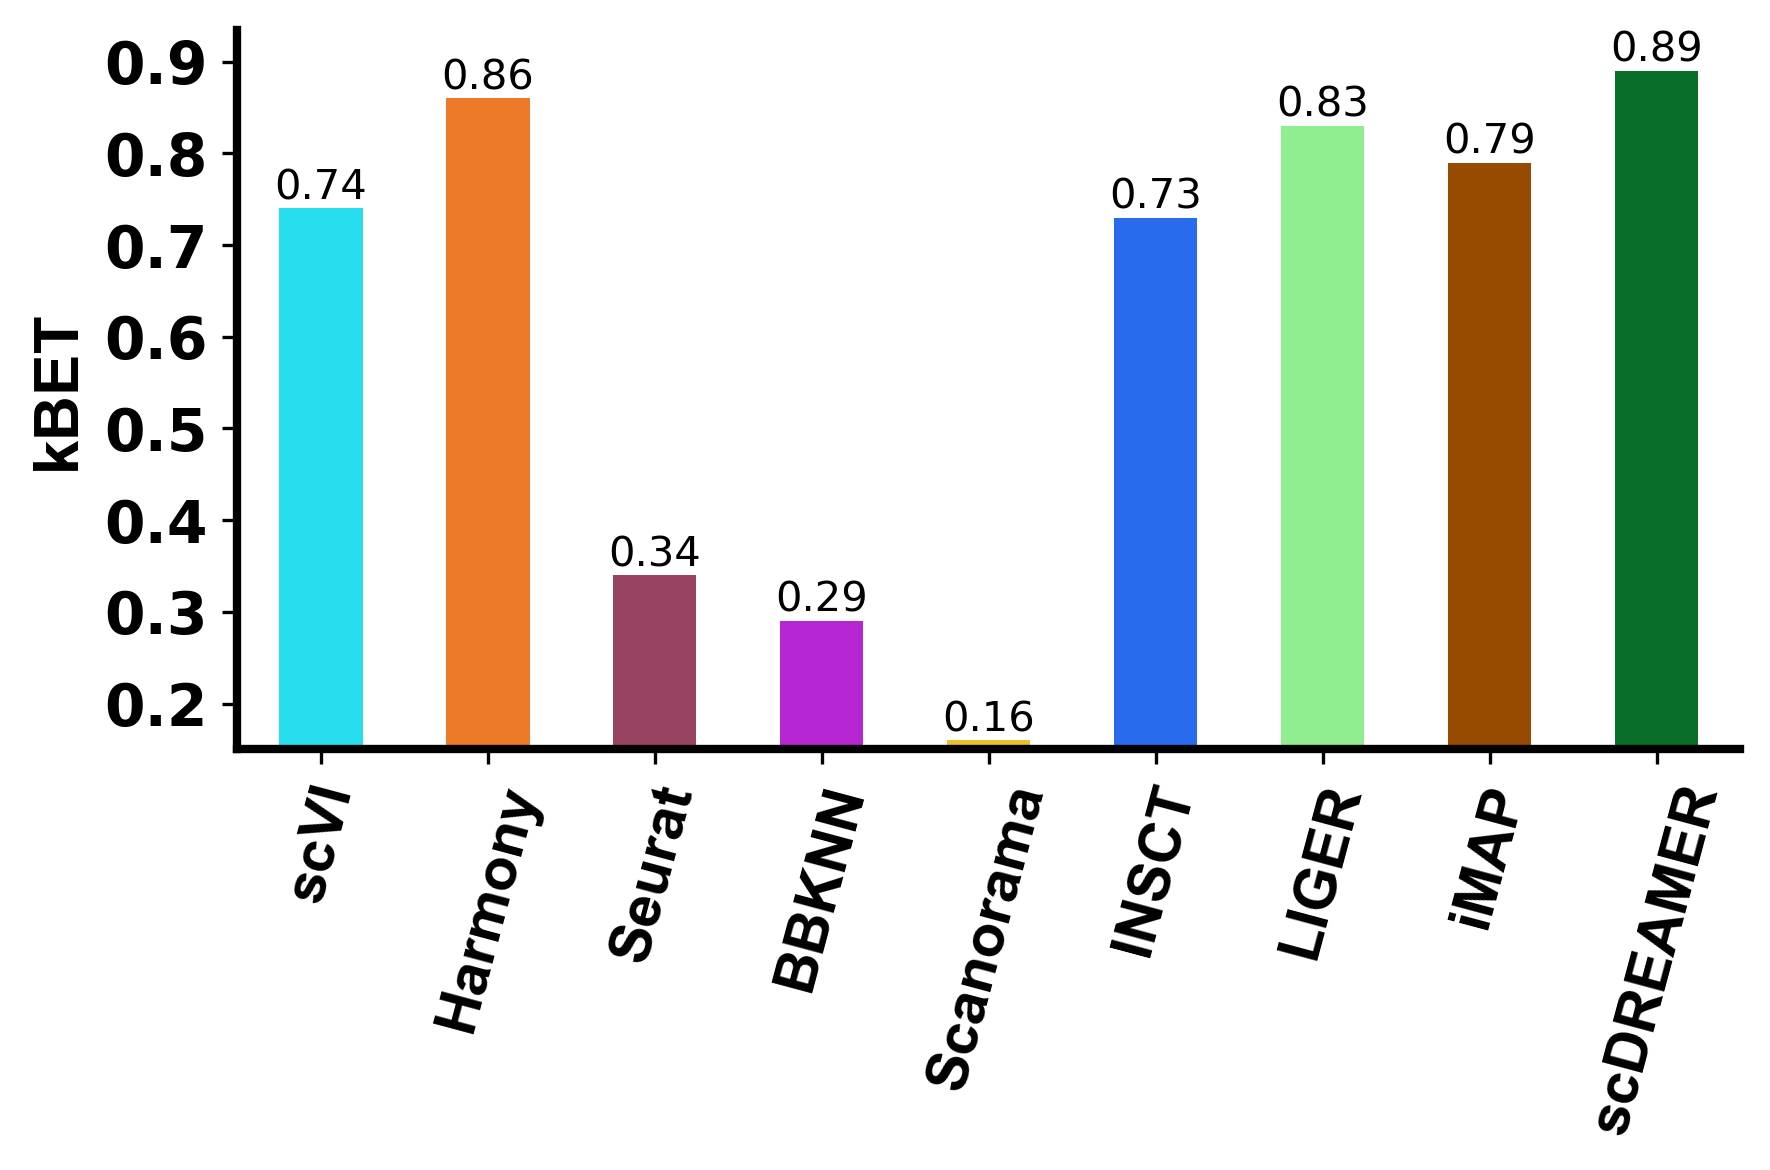

In [10]:
dataset = 'Human_Retina'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  ASW label/batch  \
Method                                                                        
scVI                    0.66               0.37       0.50             0.87   
Harmony                 0.73               0.41       0.47             0.93   
BBKNN                   0.38               0.16        NaN              NaN   
Scanorama               0.61               0.35       0.49             0.94   
INSCT                   0.73               0.41       0.37             0.77   
LIGER                   0.73               0.41       0.43             0.85   
iMAP                    0.73               0.41       0.49             0.85   
scDREAMER               0.73               0.41       0.49             0.87   

           PCR batch  graph connectivity  kBET    color  
Method                                                   
scVI            0.39                0.61  0.16  #28DDED  
Harmony         0.94                0.75  0.22  #ED7A28  
BBKNN            NaN                0.26   NaN  #B626D3  
Scanorama       0.00                0.69  0.15  #EDBF28  
INSCT           0.09                0.75  0.00  #286CED  
LIGER           0.94                0.75  0.30  #90EE90  
iMAP            0.92                0.75  0.06  #964B00  
scDREAMER       0.91                0.75  0.17  #086E28

NMI cluster/label Human_Mouse


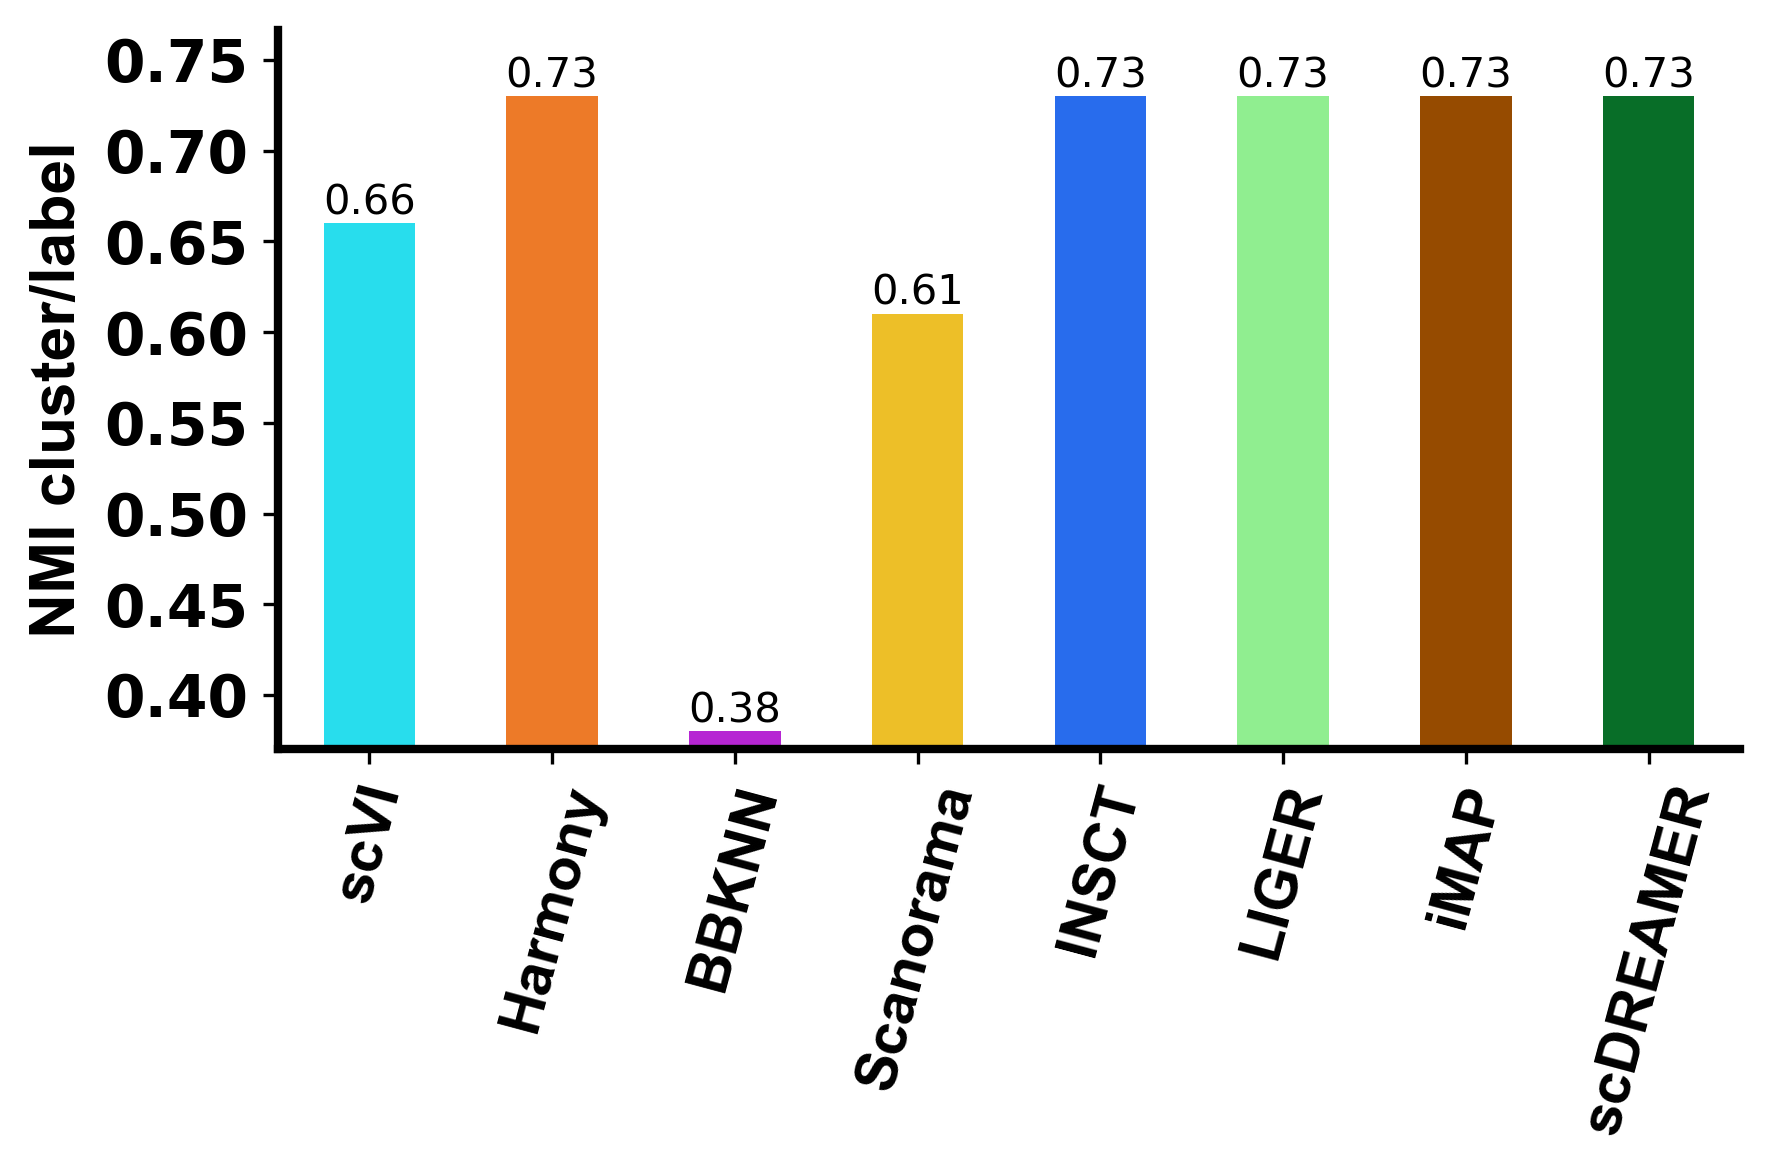

ARI cluster/label Human_Mouse


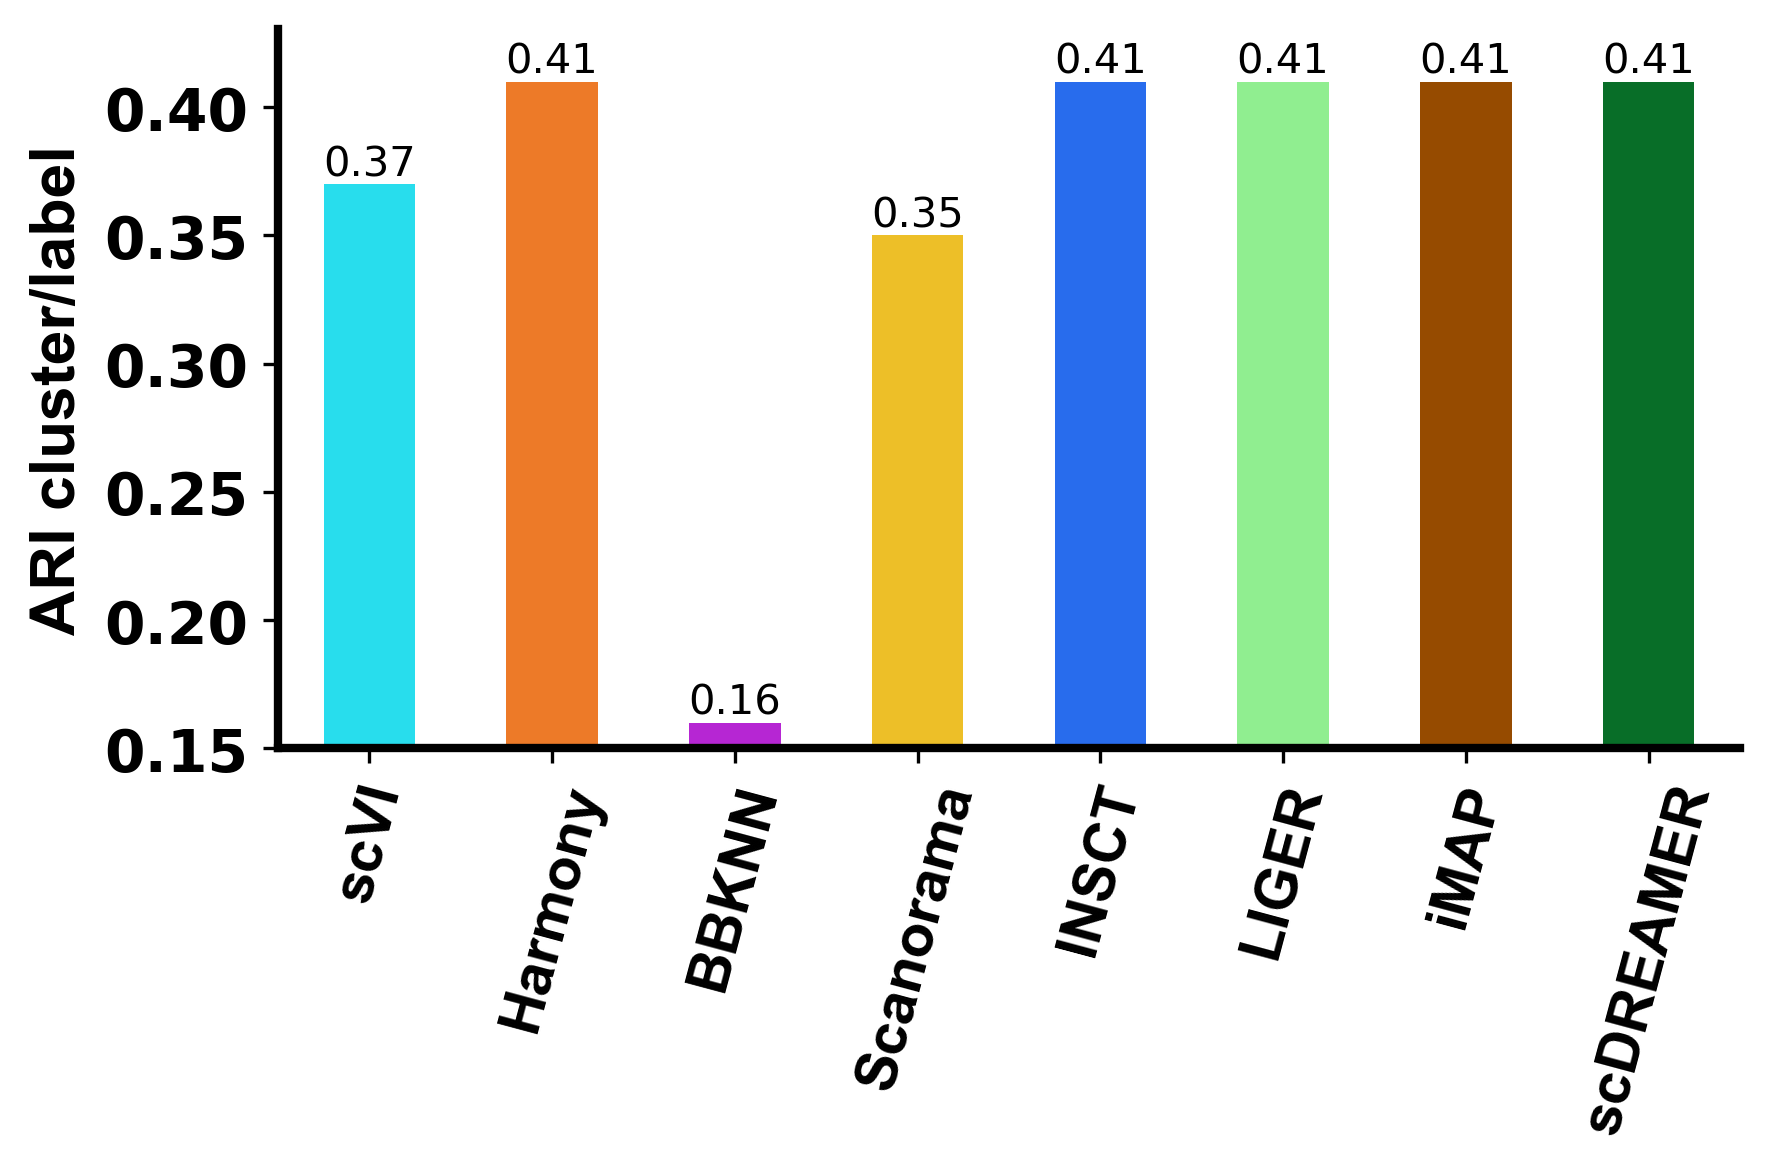

ASW label Human_Mouse


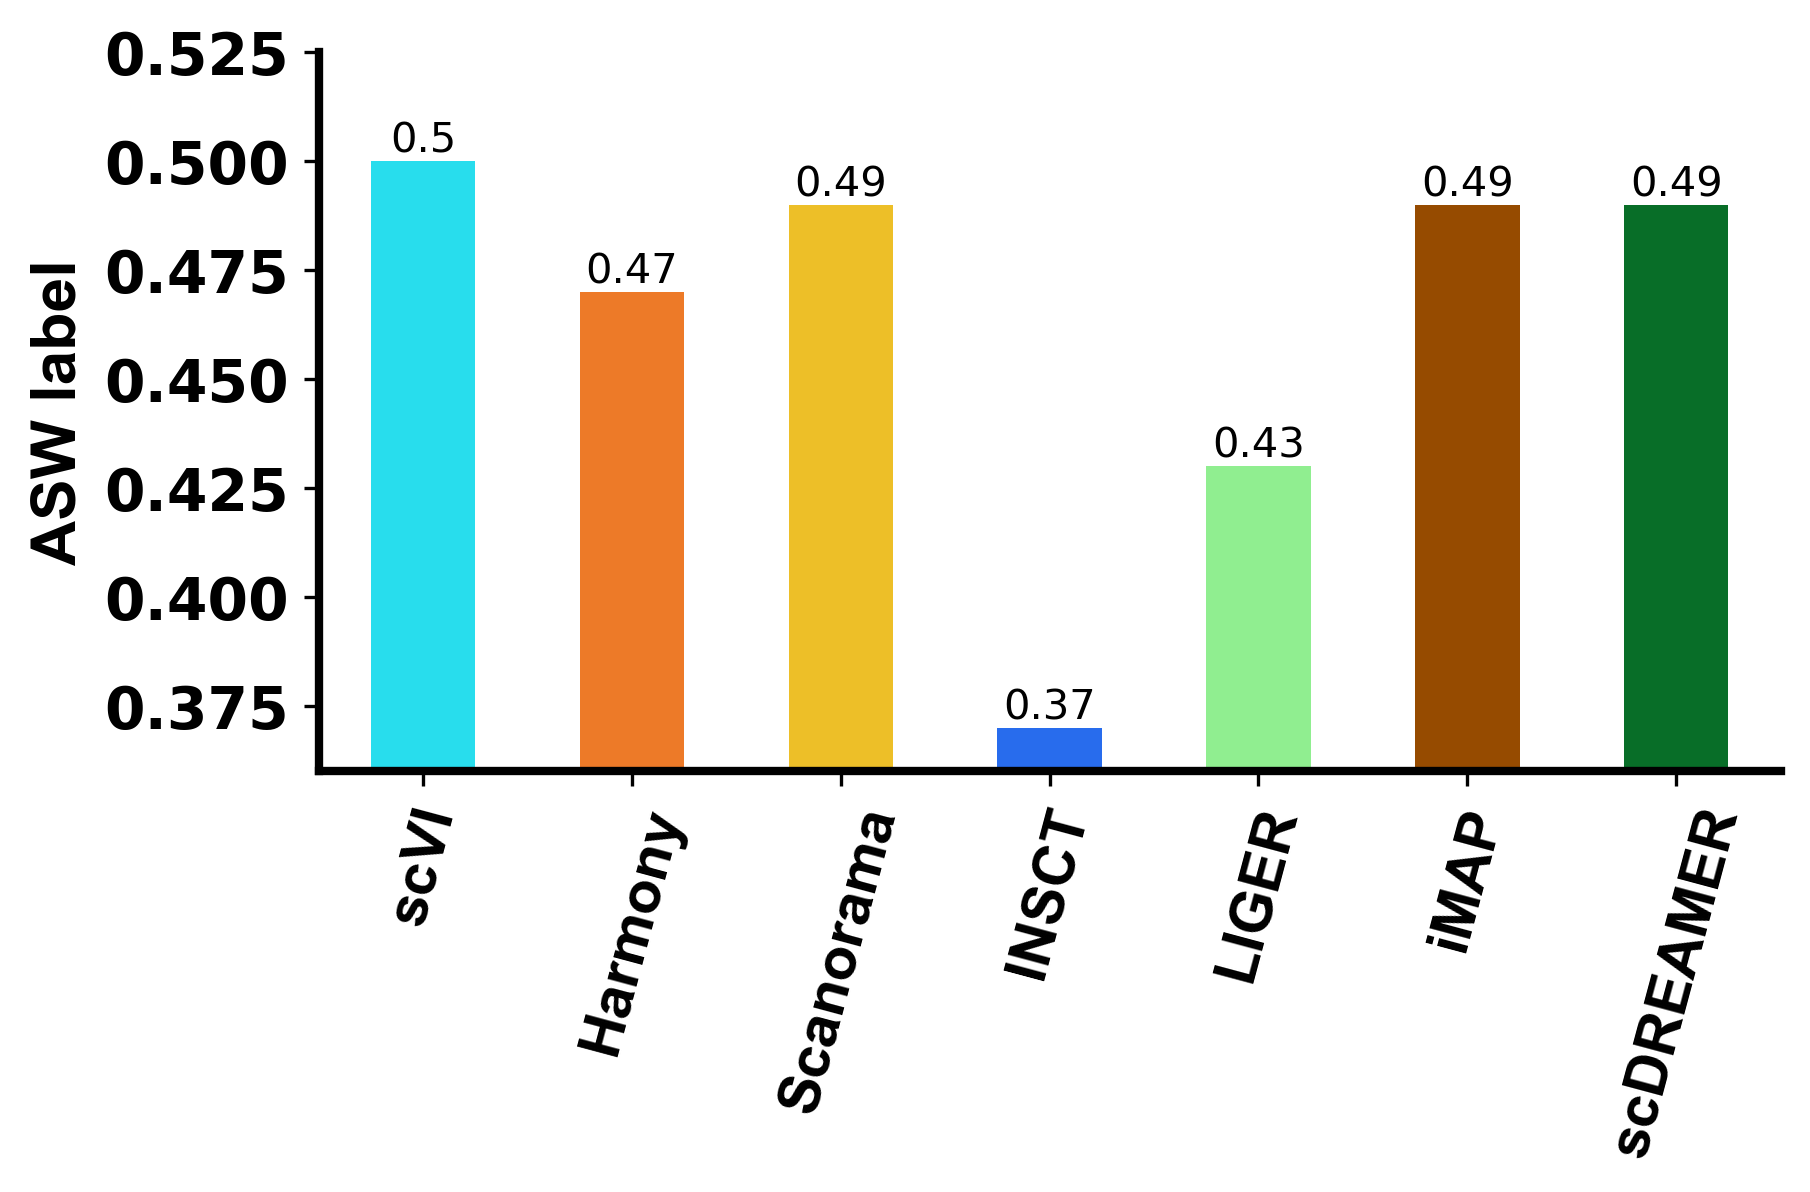

ASW label/batch Human_Mouse


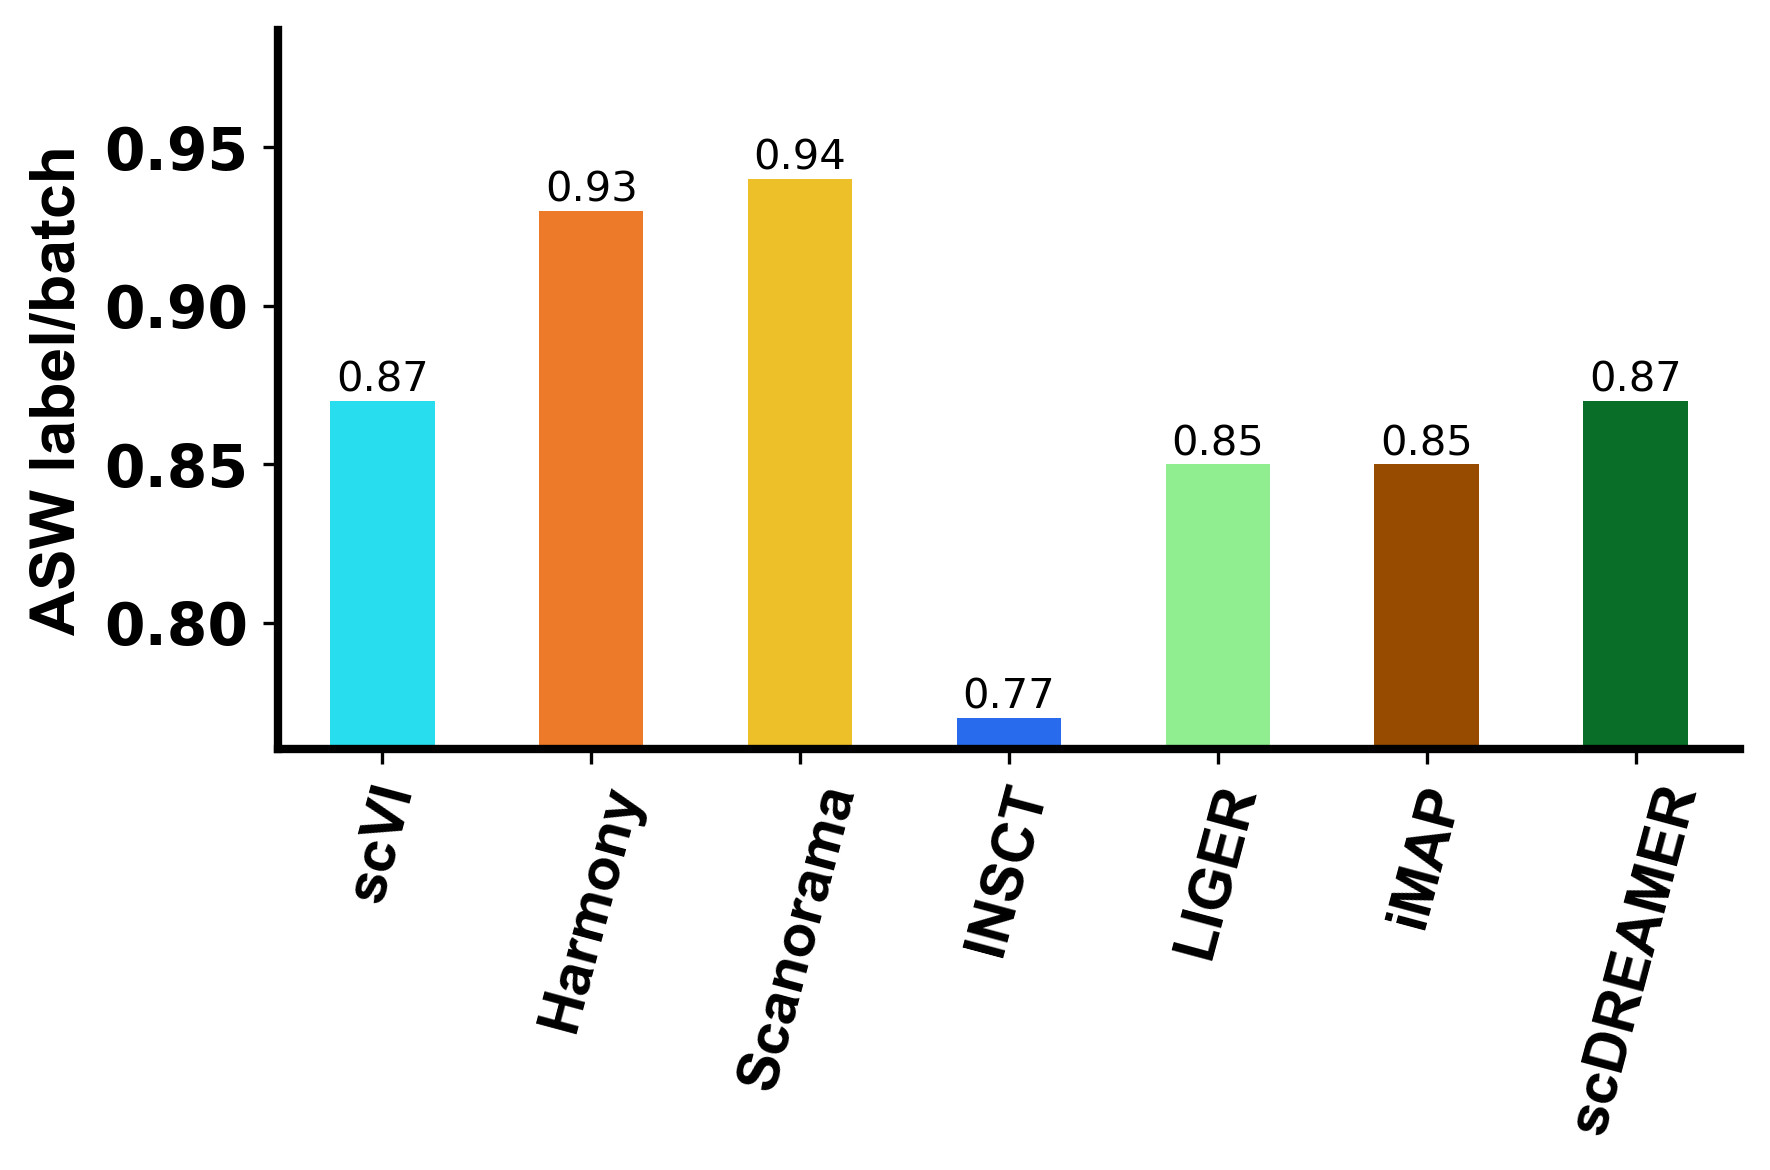

PCR batch Human_Mouse


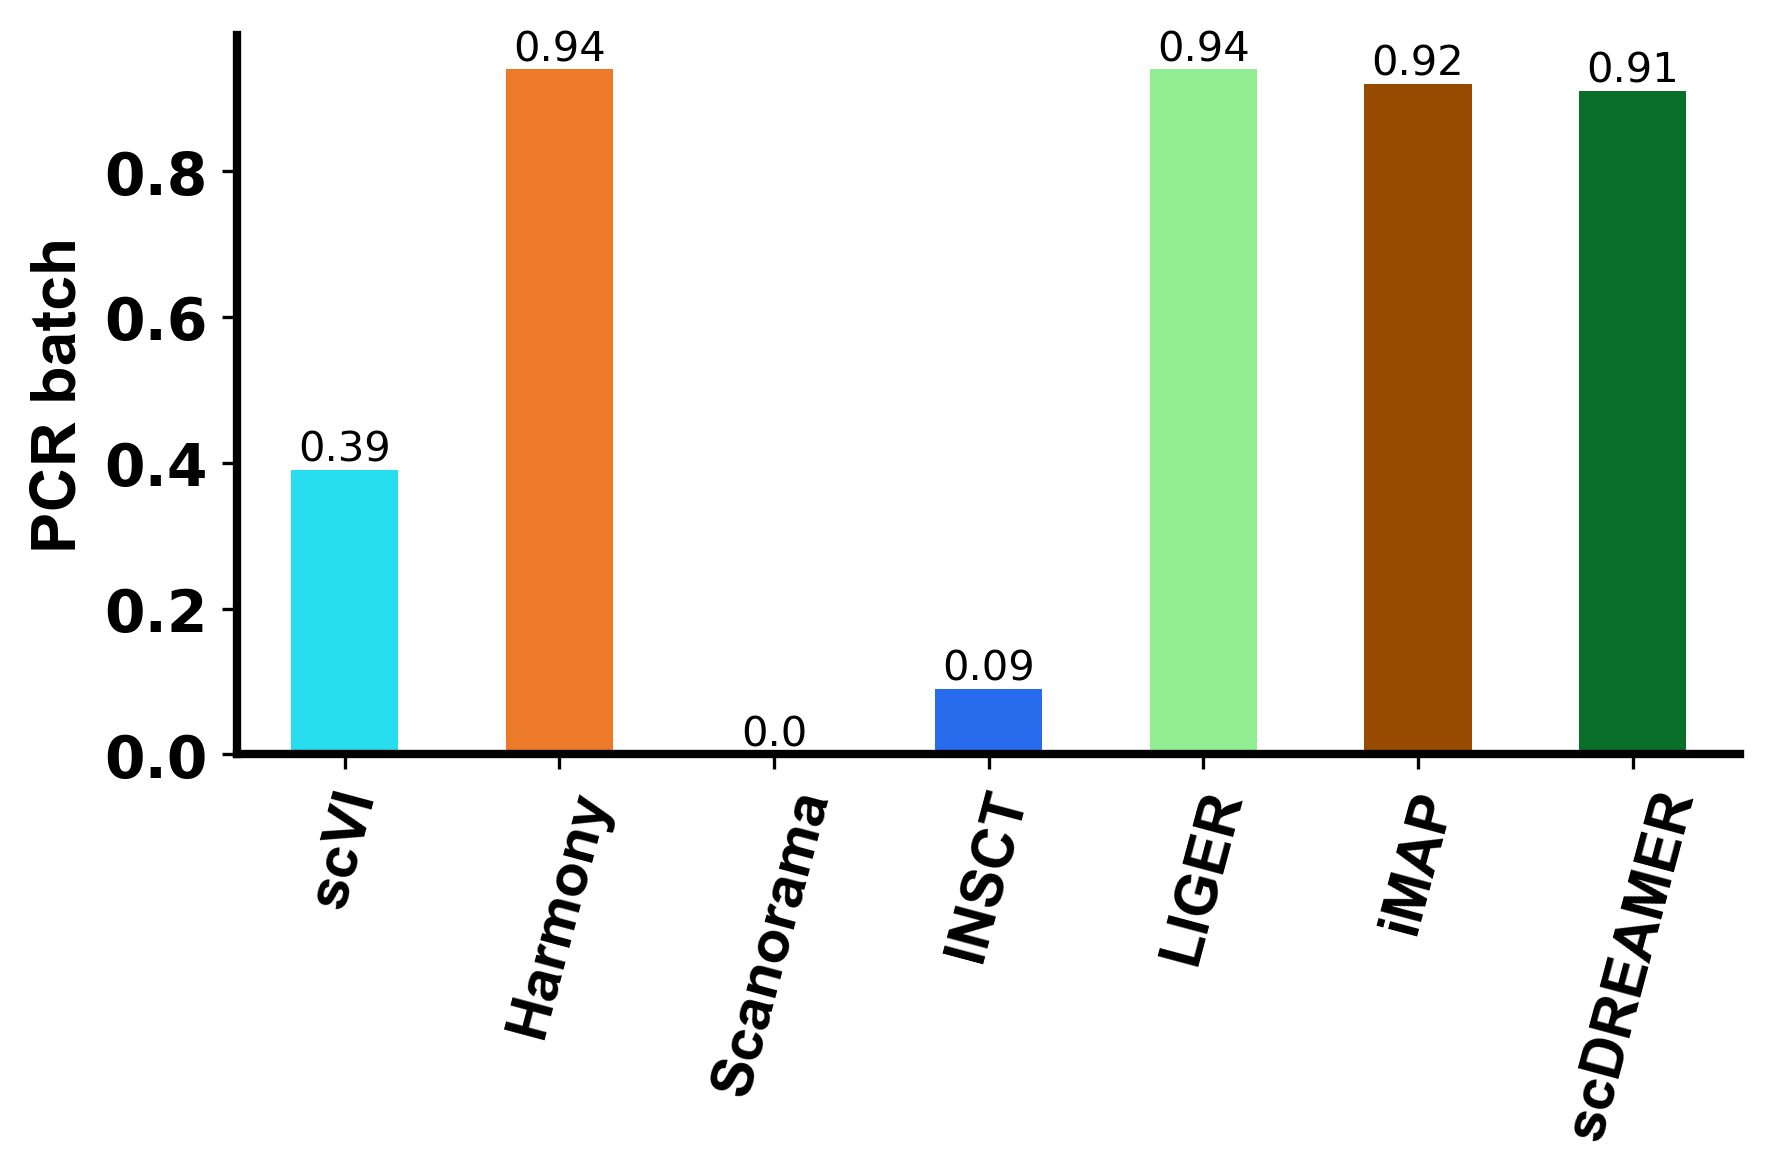

graph connectivity Human_Mouse


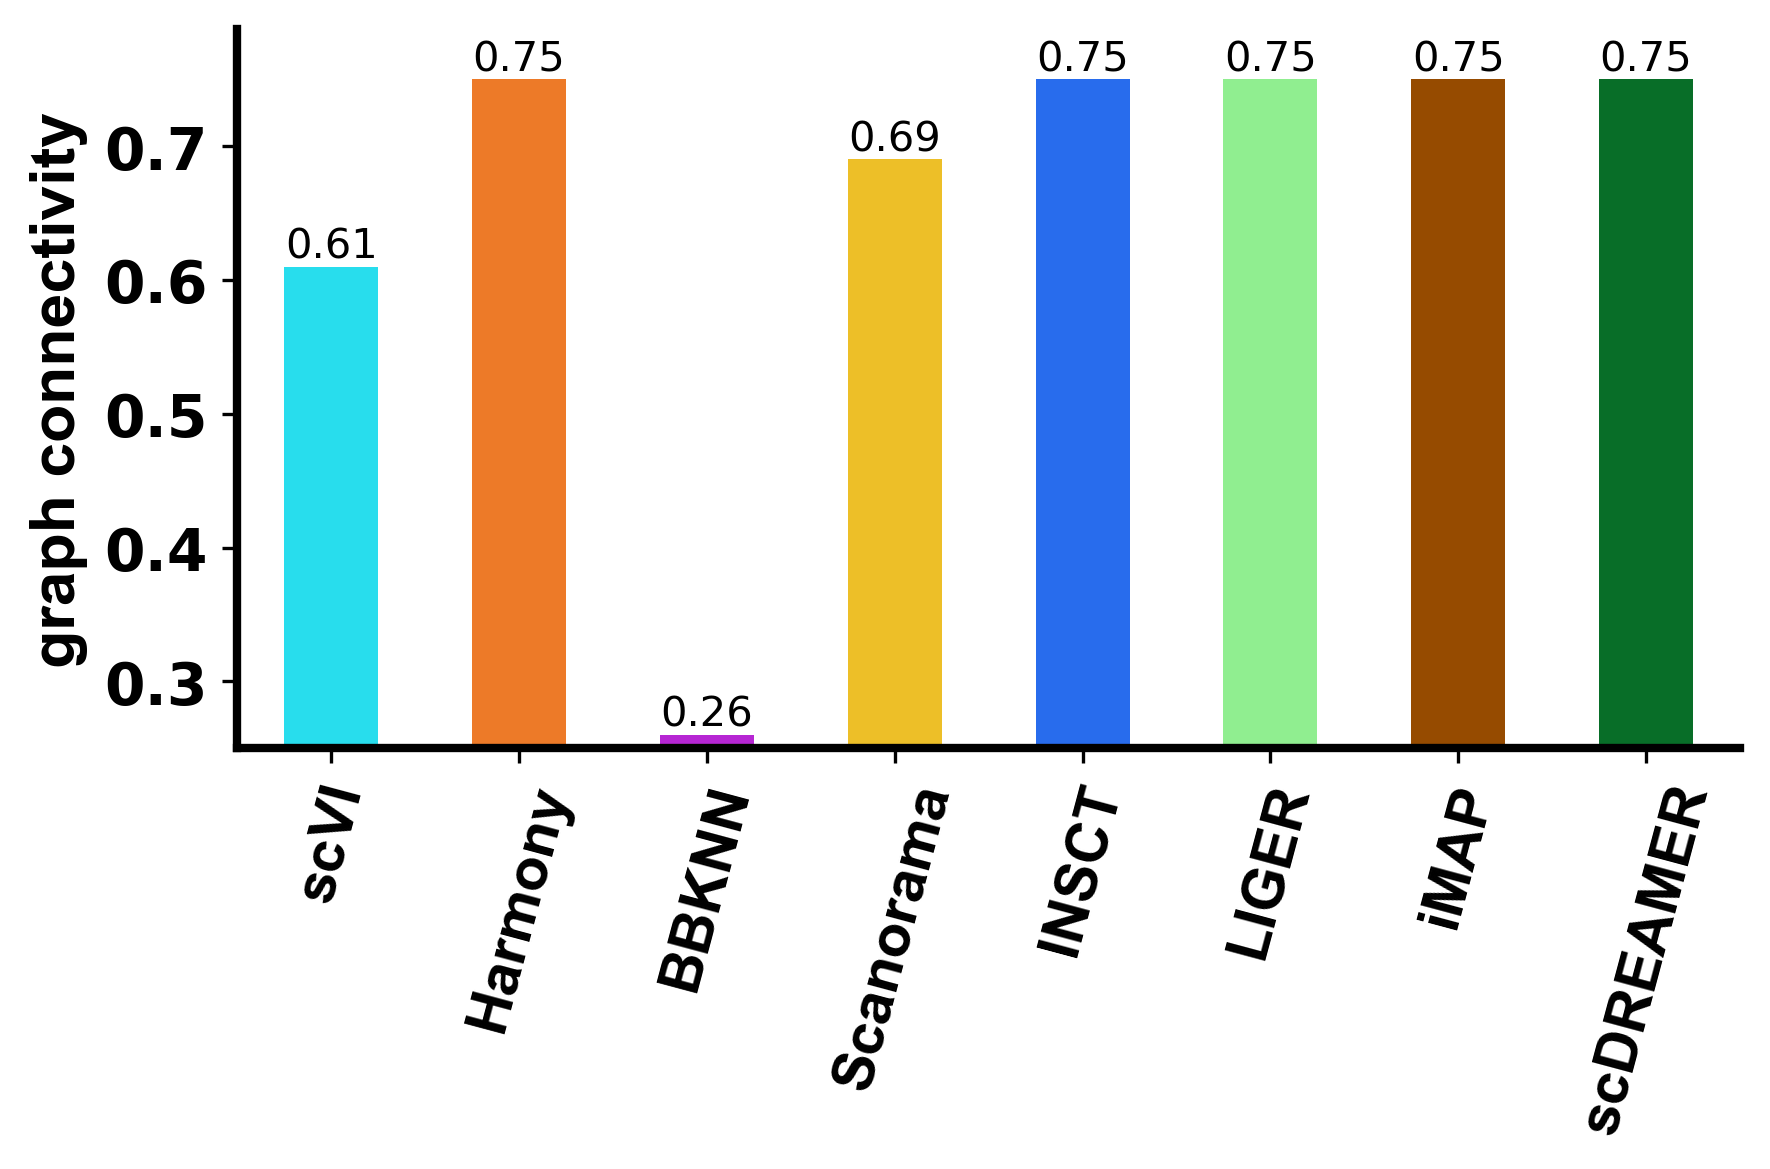

kBET Human_Mouse


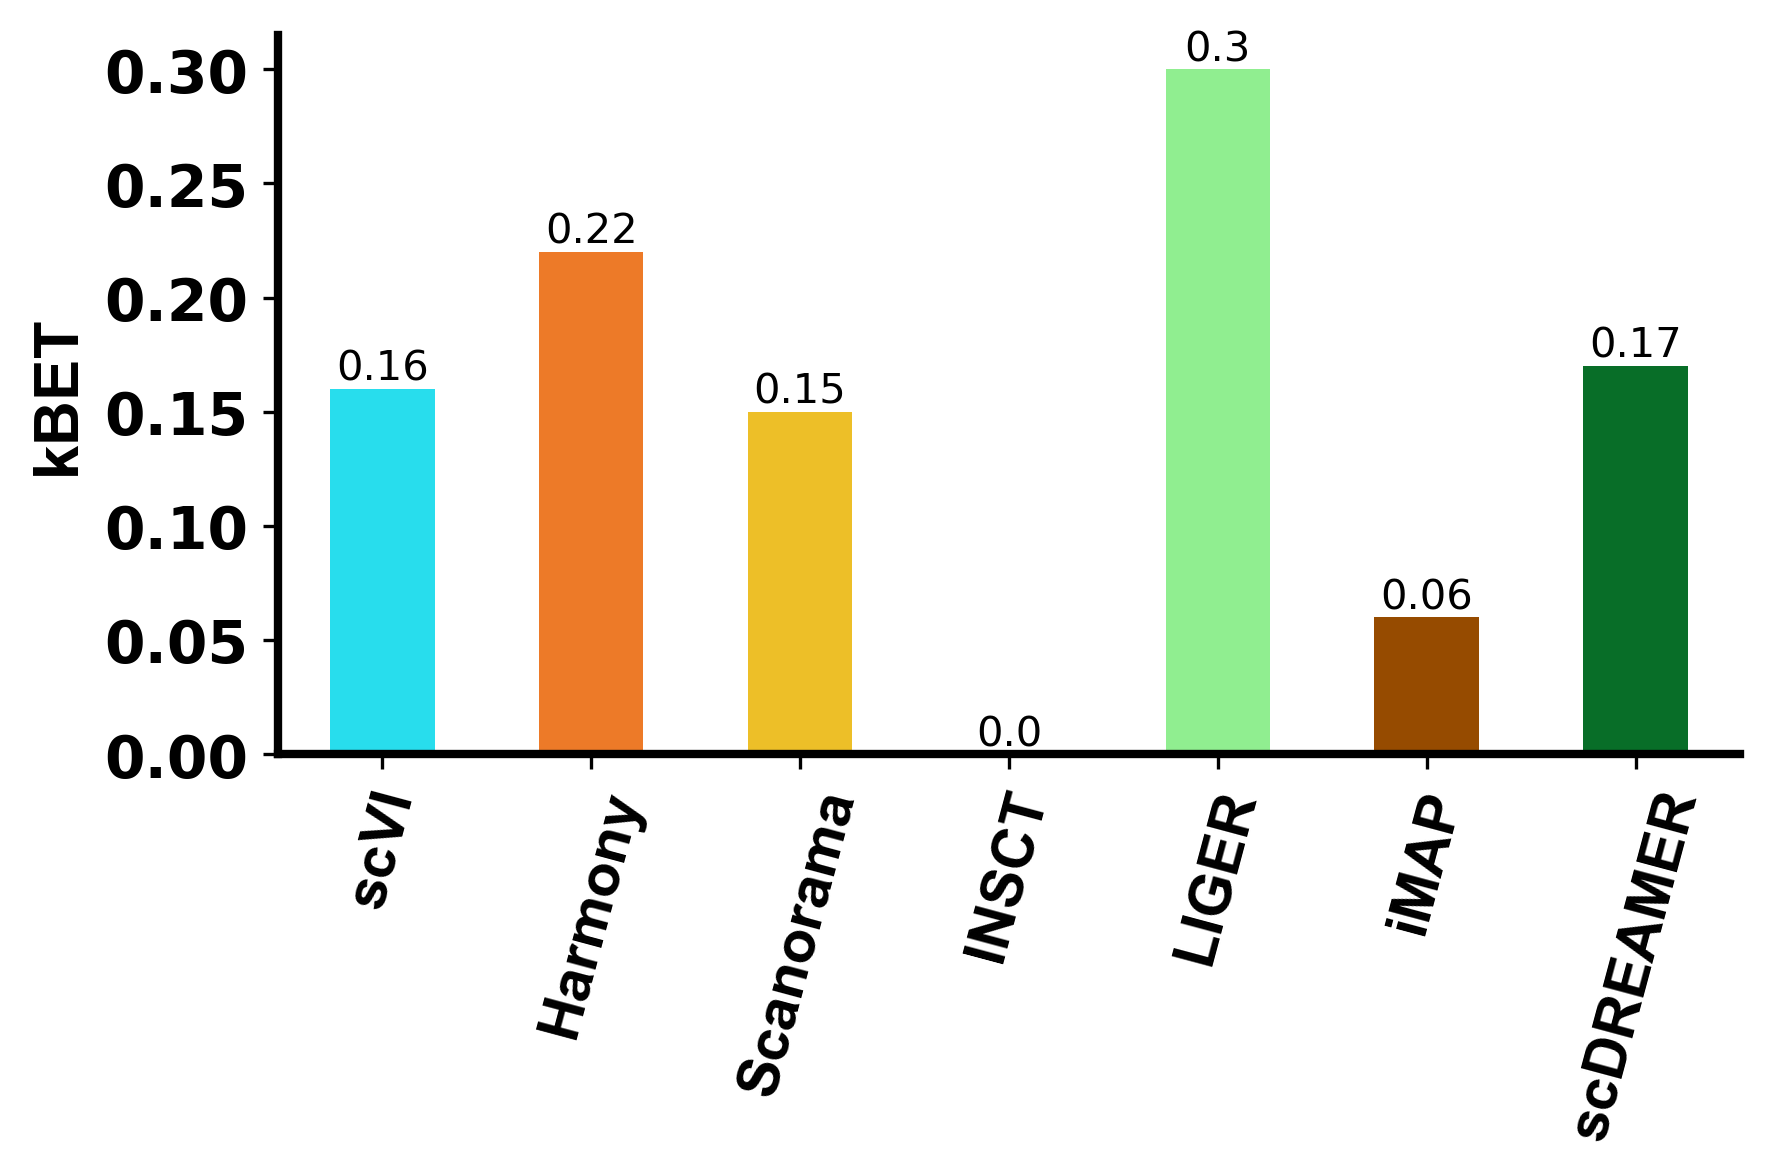

In [11]:
dataset = 'Human_Mouse'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
methods_to_plot_hm = methods_to_plot.copy()
cloumns_to_plot_hm = cloumns_to_plot.copy()

methods_to_plot_hm.remove('Seurat')
cloumns_to_plot_hm.remove('isolated f1 score')
cloumns_to_plot_hm.remove("isolated silhouette coefficient")
df_dataset = df_dataset.loc[methods_to_plot_hm,cloumns_to_plot_hm]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

In [12]:
# scVI - cyan
# Harmony - orange
# Seurat - magenta
# BBKNN - purple
# Scanorama - yellow
# INSCT - blue
# iMAP - brown
# Liger - light green
# fastMNN - light pink
# scANVI - removed from main figure
# scDREAMER - Green
# scDREAMER++ - Red